# 1. Data Understanding & Exploration

In [1]:
# import essential libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
import missingno as msno
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/healthcare-dataset/healthcare_dataset.csv


In [3]:
# load dataset & rename it to 'df': data frame
df = '/kaggle/input/healthcare-dataset/healthcare_dataset.csv'
df = pd.read_csv(df)

In [4]:
# inspecting number of rows & columns
df.shape

(10000, 15)

In [5]:
# inspect first few rows of the dataframe
df.sample(5).T

2531                        140   \
Name                Elizabeth Patrick                  Tim Mercer   
Age                                25                          71   
Gender                           Male                      Female   
Blood Type                         O+                         AB+   
Medical Condition              Asthma                   Arthritis   
Date of Admission          2021-04-26                  2021-05-09   
Doctor                     Tina Brown             Gabrielle Pitts   
Hospital               Meyer-Martinez  Salazar, Williams and Byrd   
Insurance Provider              Aetna                    Medicare   
Billing Amount           16773.726335                43535.609044   
Room Number                       495                         145   
Admission Type               Elective                   Emergency   
Discharge Date             2021-05-09                  2021-05-24   
Medication                    Lipitor                     Aspirin   
Test Results                 Abnormal                      Normal   

                                8024                      2646  \
Name                    Joseph Lopez            Melissa Lozano   
Age                               52                        23   
Gender                        Female                      Male   
Blood Type                        O-                        O+   
Medical Condition             Cancer                   Obesity   
Date of Admission         2023-05-23                2023-09-09   
Doctor               Gary Cunningham         Christopher Davis   
Hospital            Barnes-Cervantes  Brown, Duncan and Hughes   
Insurance Provider             Cigna                     Cigna   
Billing Amount          37857.194611              38452.721637   
Room Number                      410                       220   
Admission Type              Elective                    Urgent   
Discharge Date            2023-05-24                2023-09-24   
Medication                   Lipitor                 Ibuprofen   
Test Results            Inconclusive                    Normal   

                                         9240  
Name                             Marcus Smith  
Age                                        56  
Gender                                   Male  
Blood Type                                AB+  
Medical Condition                   Arthritis  
Date of Admission                  2019-08-29  
Doctor                          Danielle King  
Hospital            Shaffer, White and Finley  
Insurance Provider                      Cigna  
Billing Amount                   19038.582053  
Room Number                               186  
Admission Type                      Emergency  
Discharge Date                     2019-09-23  
Medication                        Paracetamol  
Test Results                         Abnormal

In [6]:
# inspect data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [7]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')

Number of unique values in Name: 9378
Number of unique values in Age: 68
Number of unique values in Gender: 2
Number of unique values in Blood Type: 8
Number of unique values in Medical Condition: 6
Number of unique values in Date of Admission: 1815
Number of unique values in Doctor: 9416
Number of unique values in Hospital: 8639
Number of unique values in Insurance Provider: 5
Number of unique values in Billing Amount: 10000
Number of unique values in Room Number: 400
Number of unique values in Admission Type: 3
Number of unique values in Discharge Date: 1834
Number of unique values in Medication: 5
Number of unique values in Test Results: 3


In [8]:
# Renaming features for easy readability
new_names = {'Name': 'name', 'Age': 'age', 'Gender': 'gender',
             'Blood Type': 'blood_type', 'Medical Condition': 'medical_condition',
             'Date of Admission': 'date_of_admission',
             'Doctor': 'doctor', 'Hospital': 'hospital', 
            'Insurance Provider': 'insurance', 'Billing Amount': 'bill',
             'Room Number': 'room', 'Admission Type': 'admission_type',
             'Discharge Date': 'discharge_date', 'Medication': 'medication',
             'Test Results': 'test_results'}
df.rename(columns=new_names, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               10000 non-null  object 
 1   age                10000 non-null  int64  
 2   gender             10000 non-null  object 
 3   blood_type         10000 non-null  object 
 4   medical_condition  10000 non-null  object 
 5   date_of_admission  10000 non-null  object 
 6   doctor             10000 non-null  object 
 7   hospital           10000 non-null  object 
 8   insurance          10000 non-null  object 
 9   bill               10000 non-null  float64
 10  room               10000 non-null  int64  
 11  admission_type     10000 non-null  object 
 12  discharge_date     10000 non-null  object 
 13  medication         10000 non-null  object 
 14  test_results       10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+ MB


### Numerical Analysis of Distribution

In [9]:
# identify quantitative features
quantitative = df.select_dtypes(include=['int', 'float']).columns
quantitative

Index(['age', 'bill', 'room'], dtype='object')

In [10]:
# summary statistics of quantitative features
df[quantitative].describe().T

count          mean           std          min           25%  \
age   10000.0     51.452200     19.588974    18.000000     35.000000   
bill  10000.0  25516.806778  14067.292709  1000.180837  13506.523967   
room  10000.0    300.082000    115.806027   101.000000    199.000000   

               50%           75%           max  
age      52.000000     68.000000     85.000000  
bill  25258.112566  37733.913727  49995.902283  
room    299.000000    400.000000    500.000000

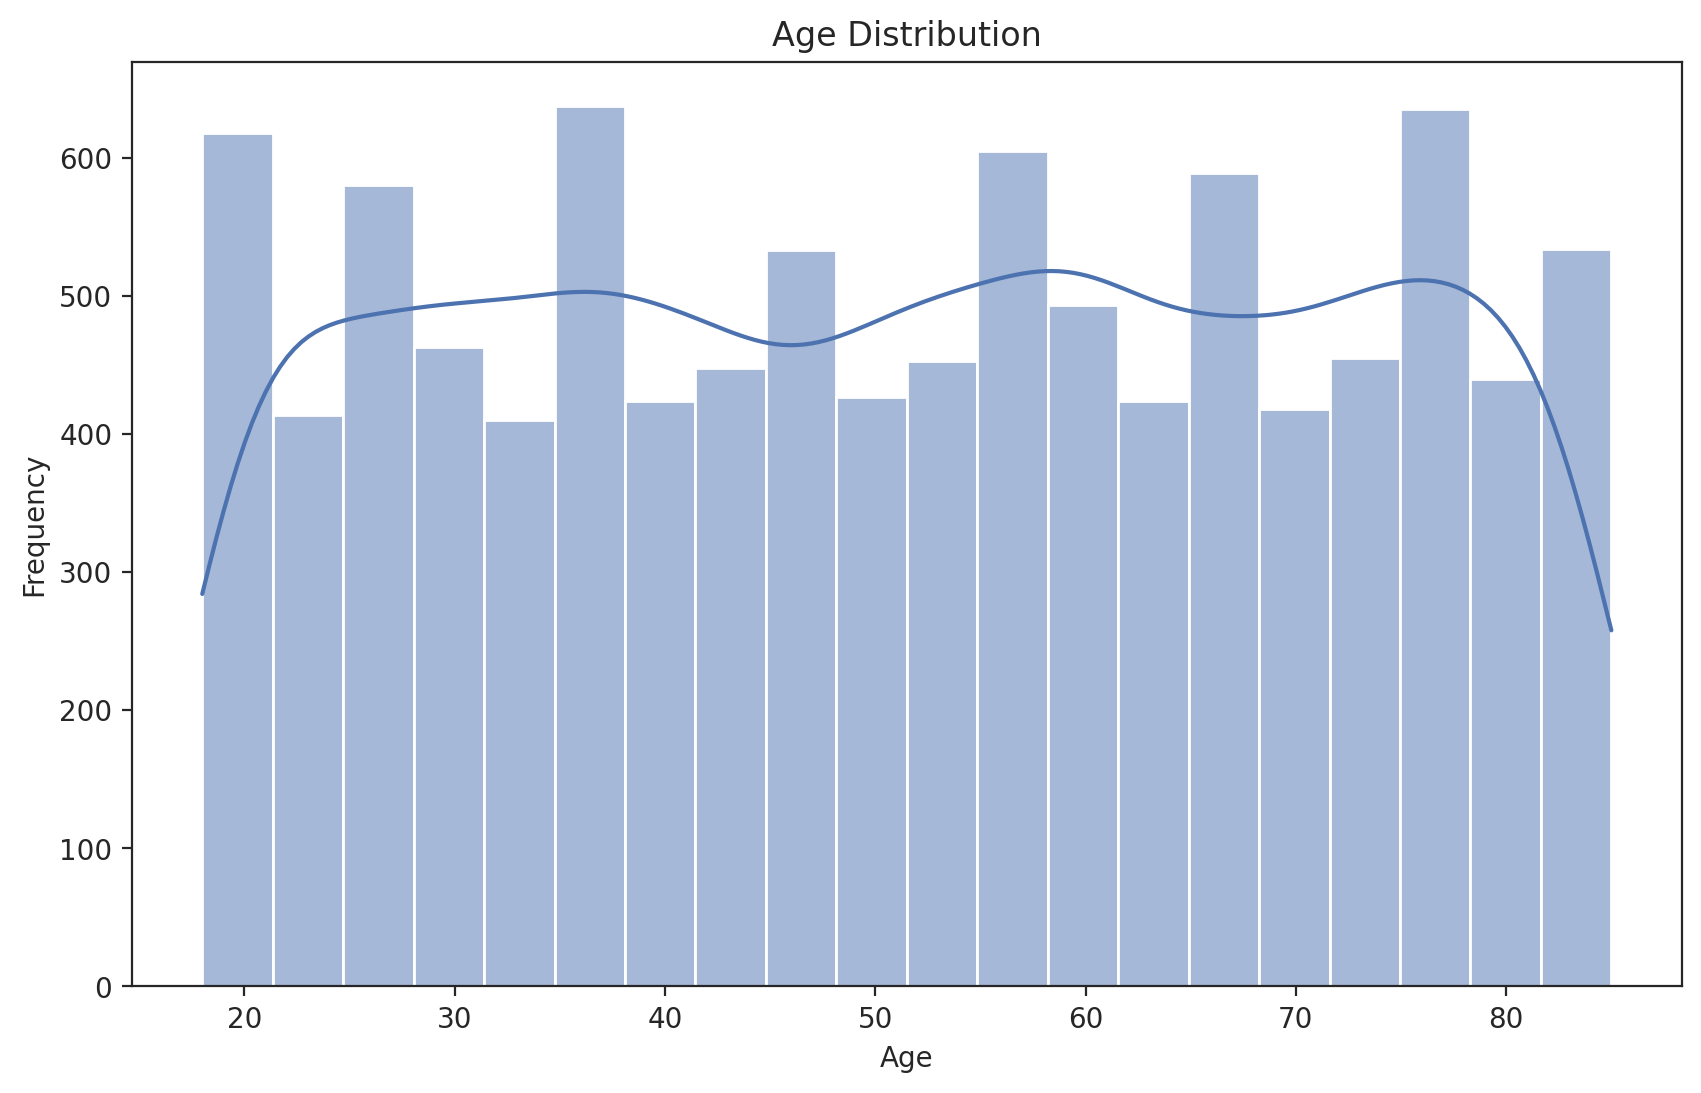

In [11]:
# visualize age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='age', bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

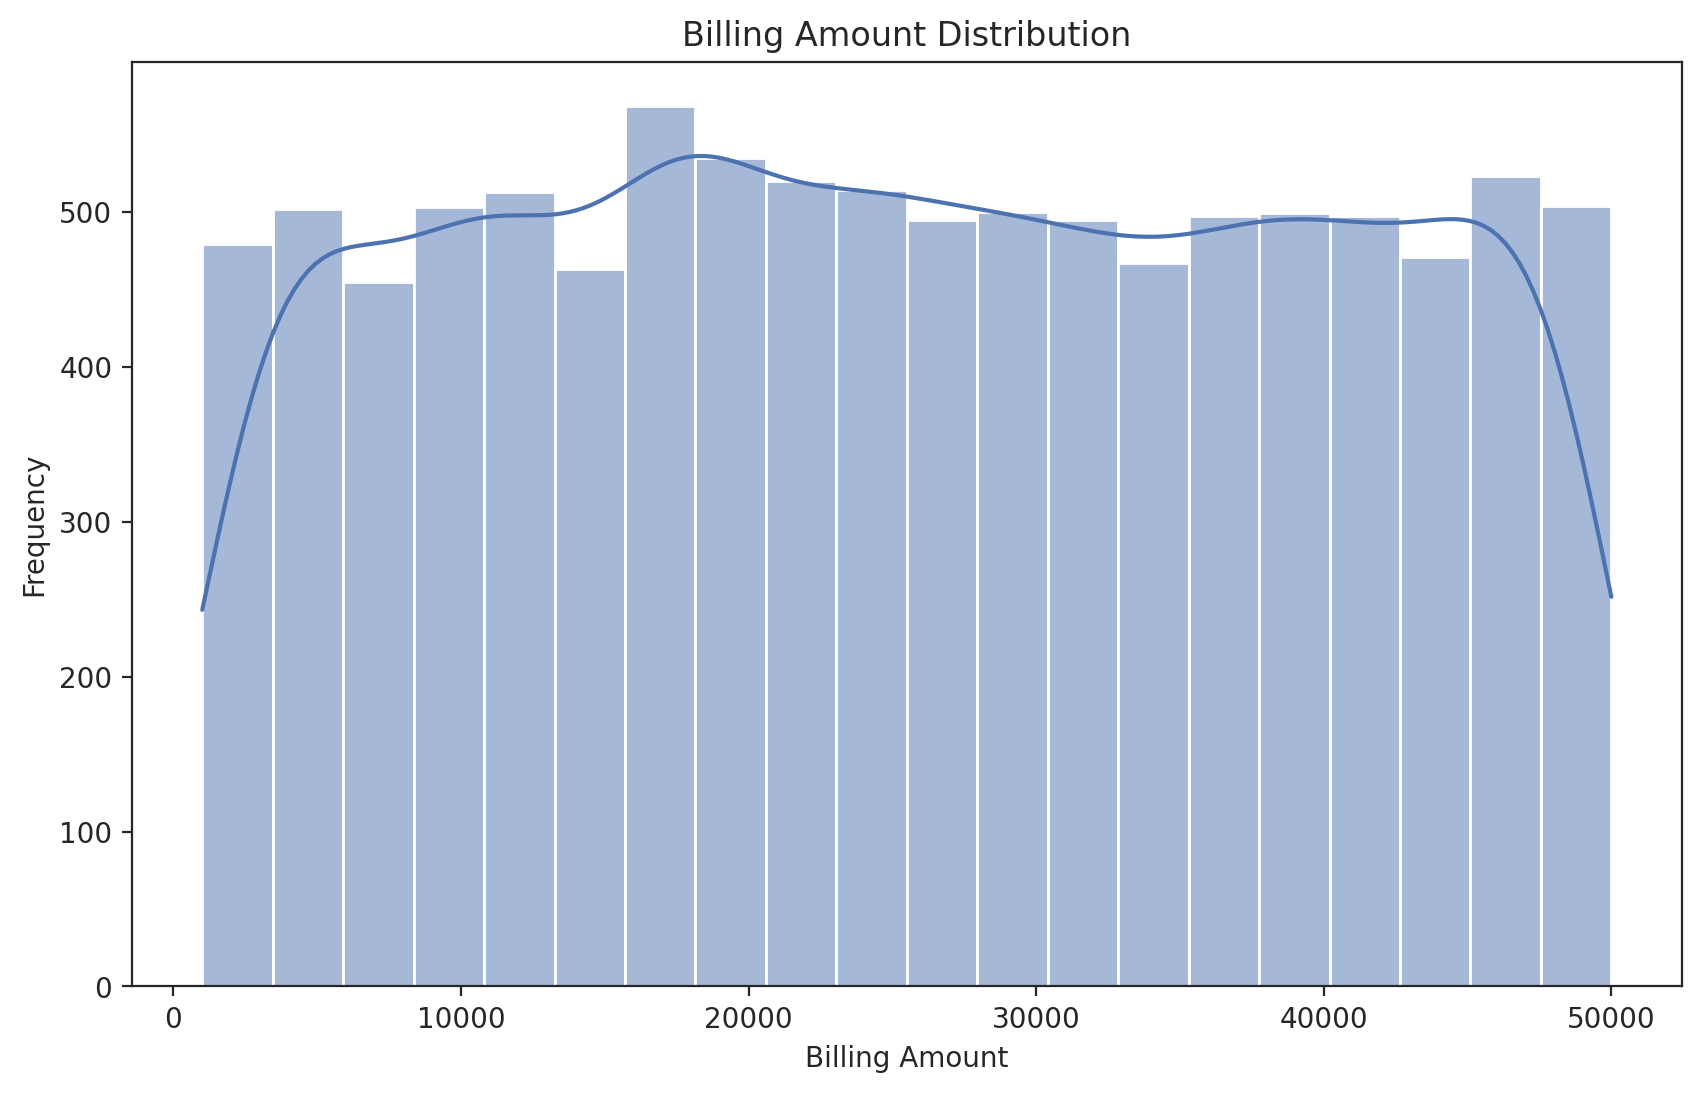

In [12]:
# visualize bill distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='bill', bins=20, kde=True)
plt.title('Billing Amount Distribution')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()

### Categorical Analysis of Distribution

In [13]:
# identify categorical columns
categorical = df.select_dtypes(include=['object']).columns
categorical

Index(['name', 'gender', 'blood_type', 'medical_condition',
       'date_of_admission', 'doctor', 'hospital', 'insurance',
       'admission_type', 'discharge_date', 'medication', 'test_results'],
      dtype='object')

In [14]:
categorical = df[categorical].drop(['name', 'doctor', 'date_of_admission', 'discharge_date', 'hospital'], axis =1)

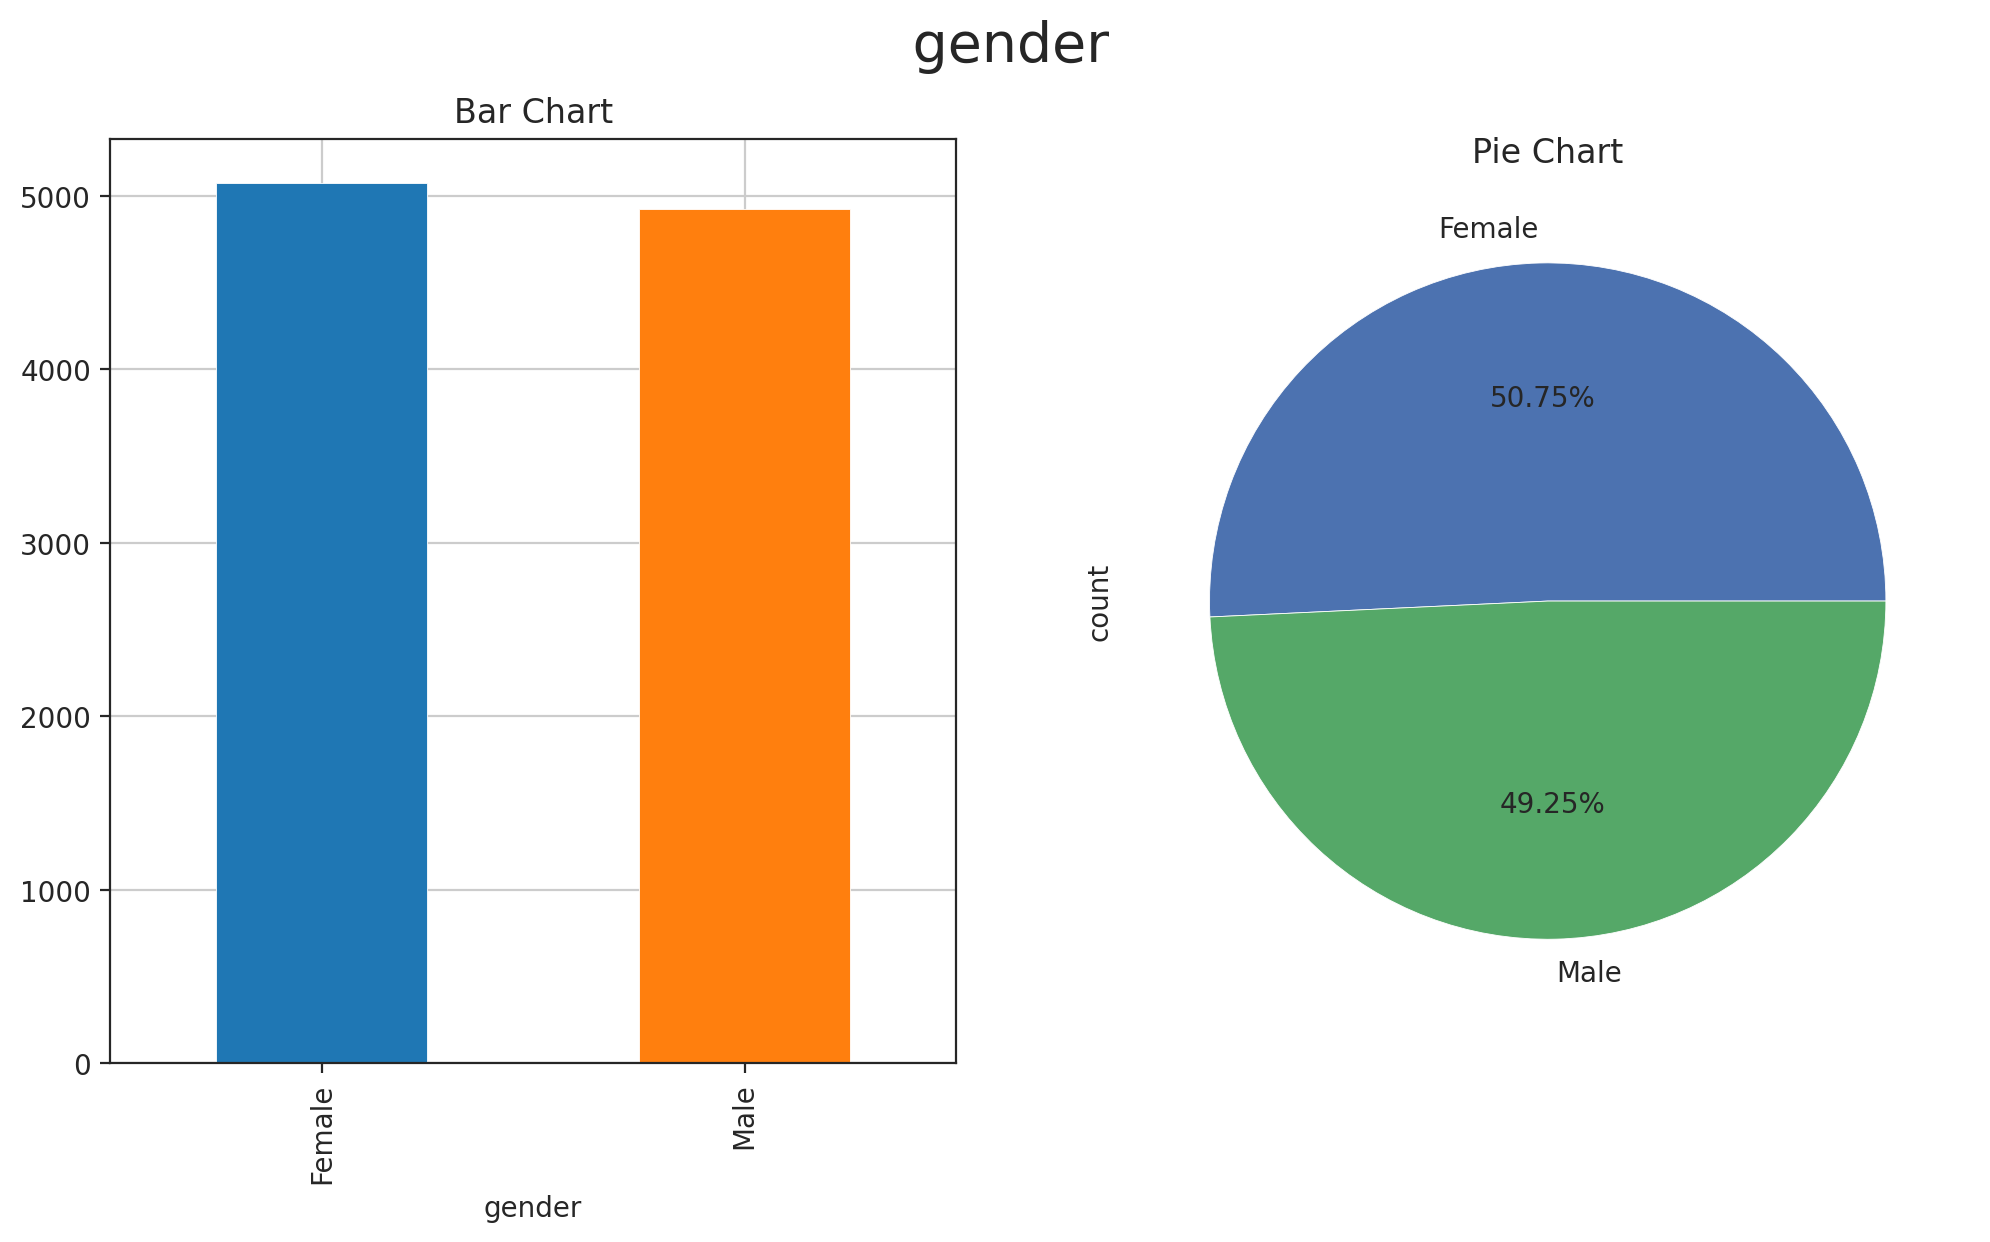

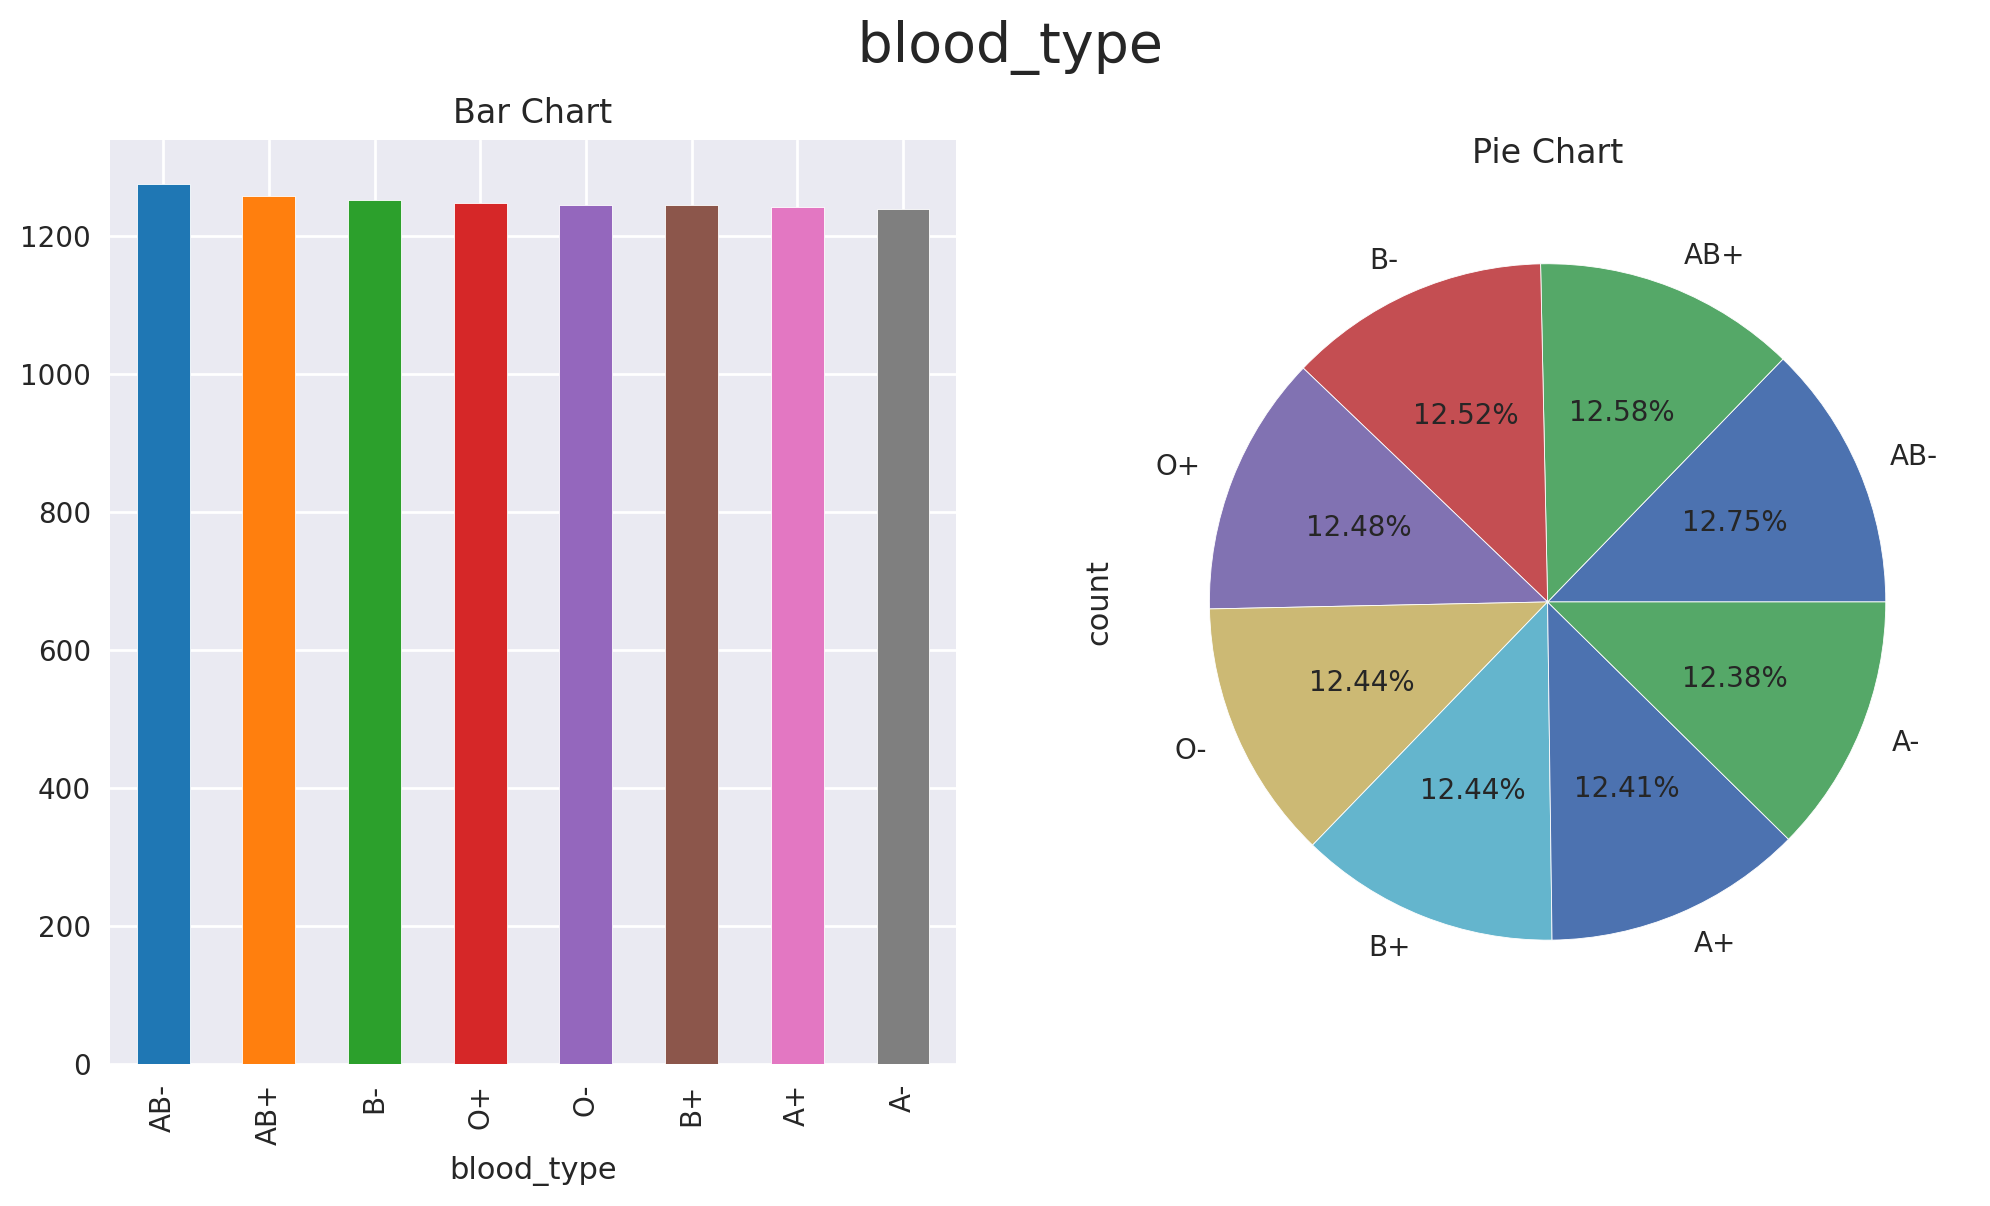

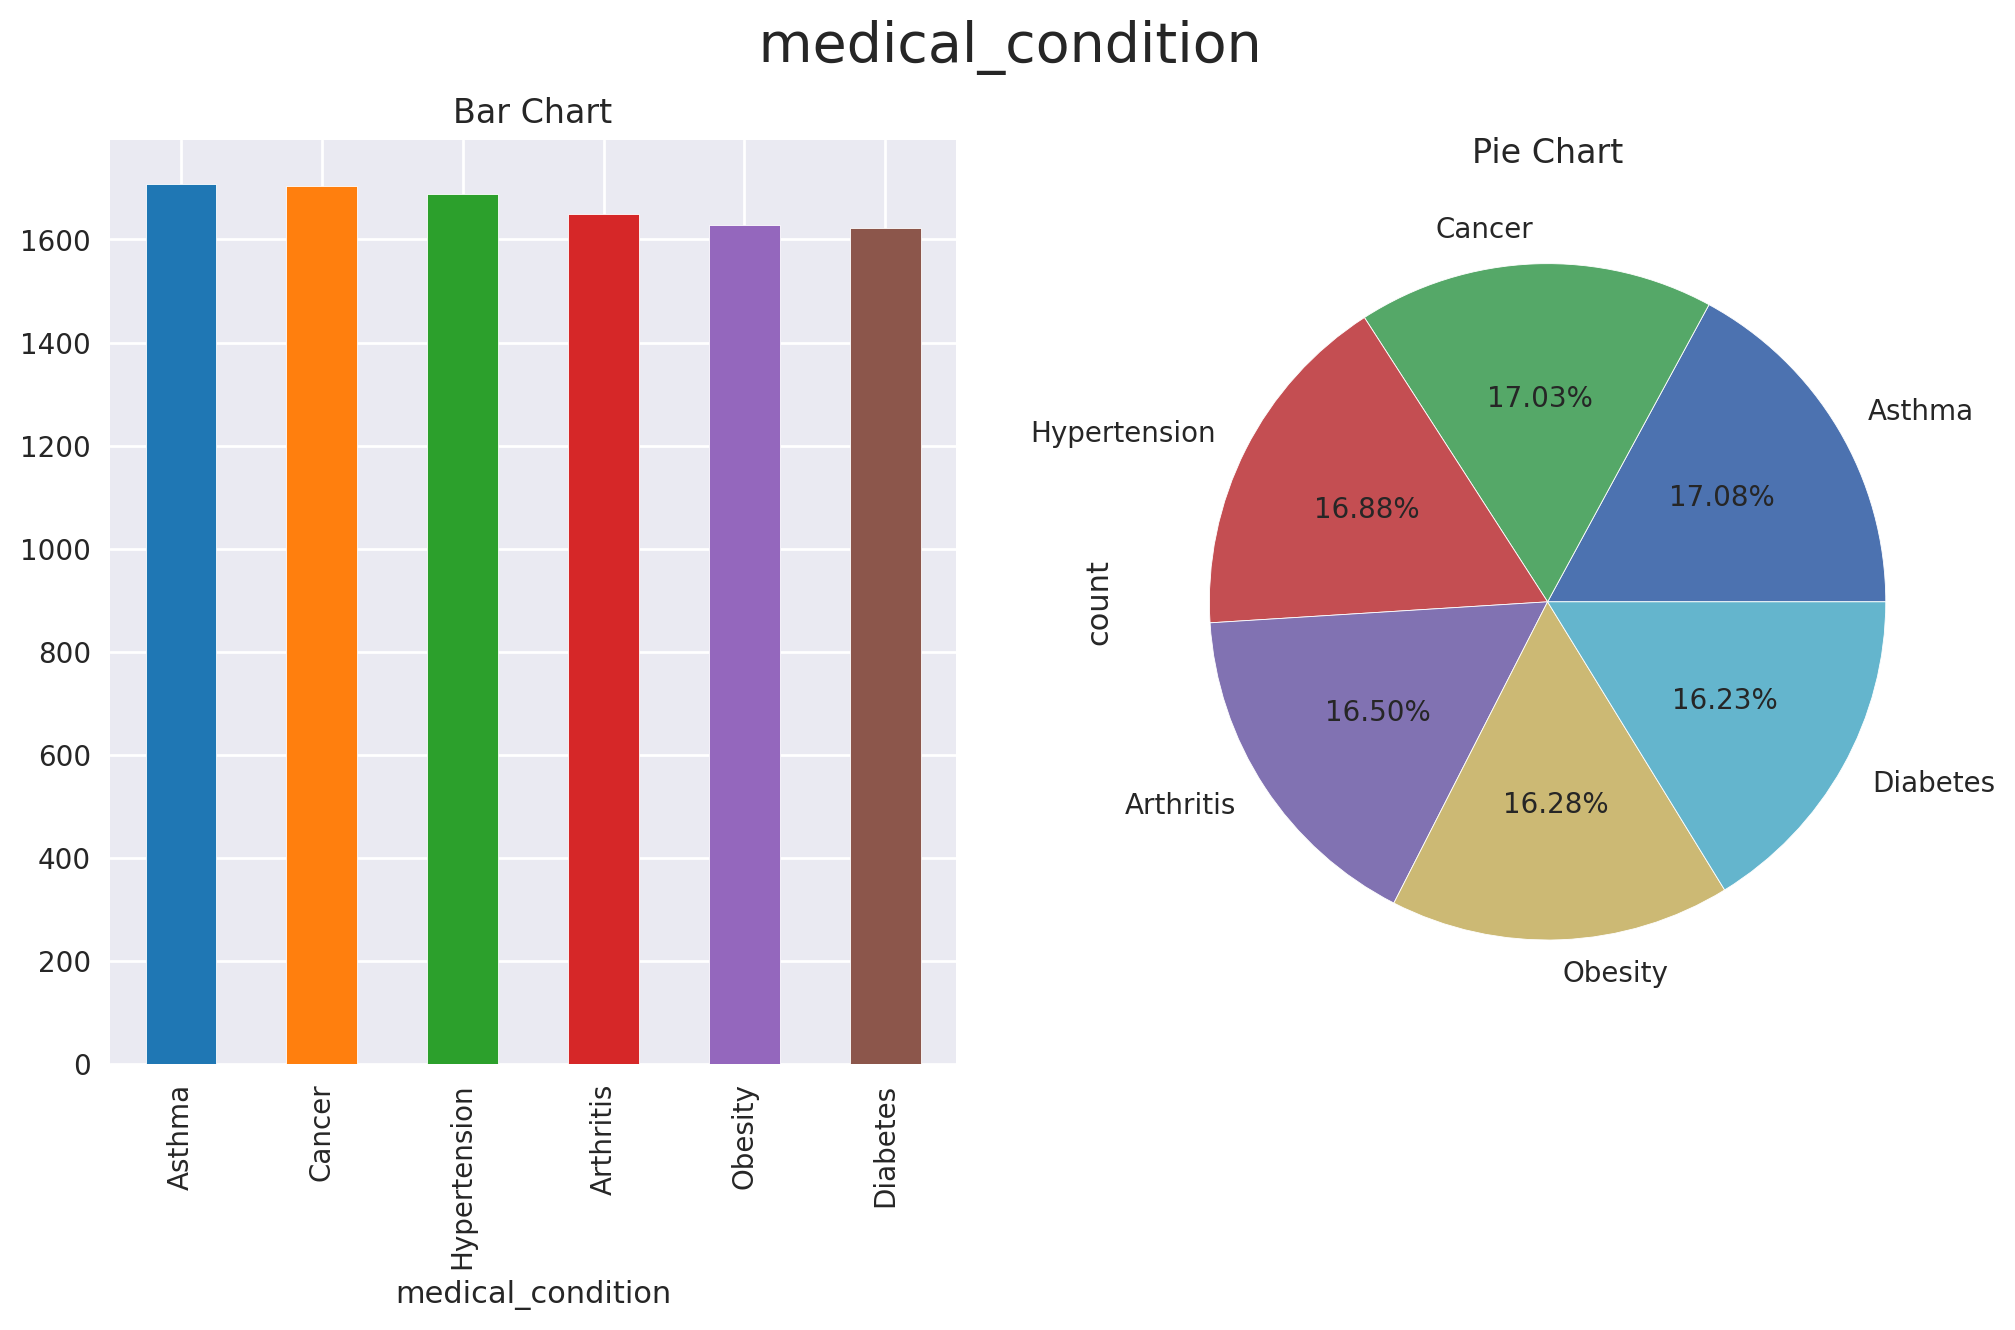

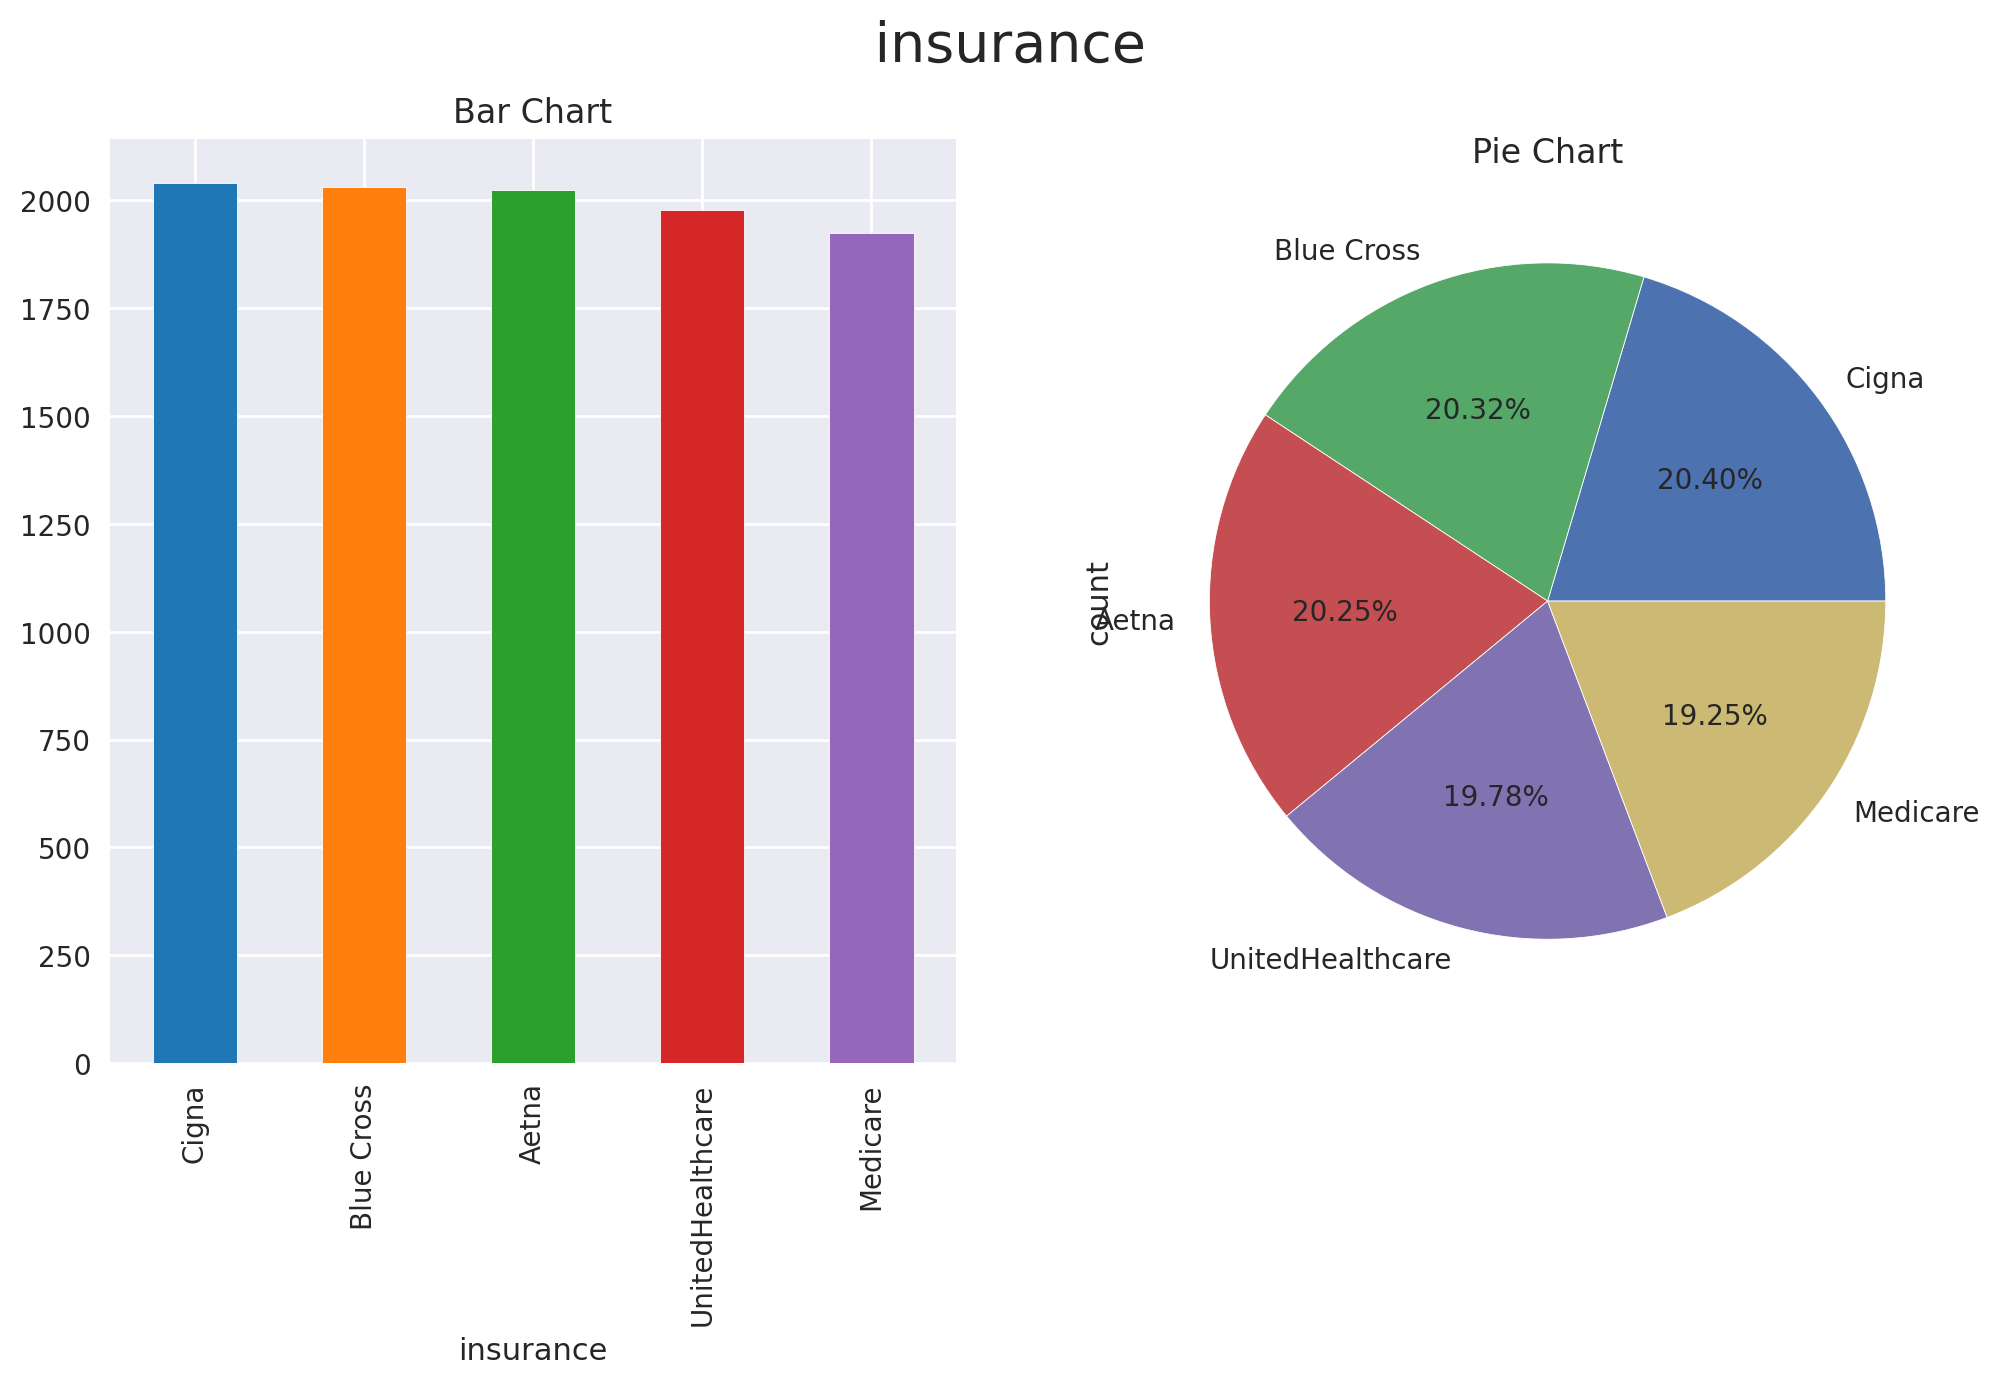

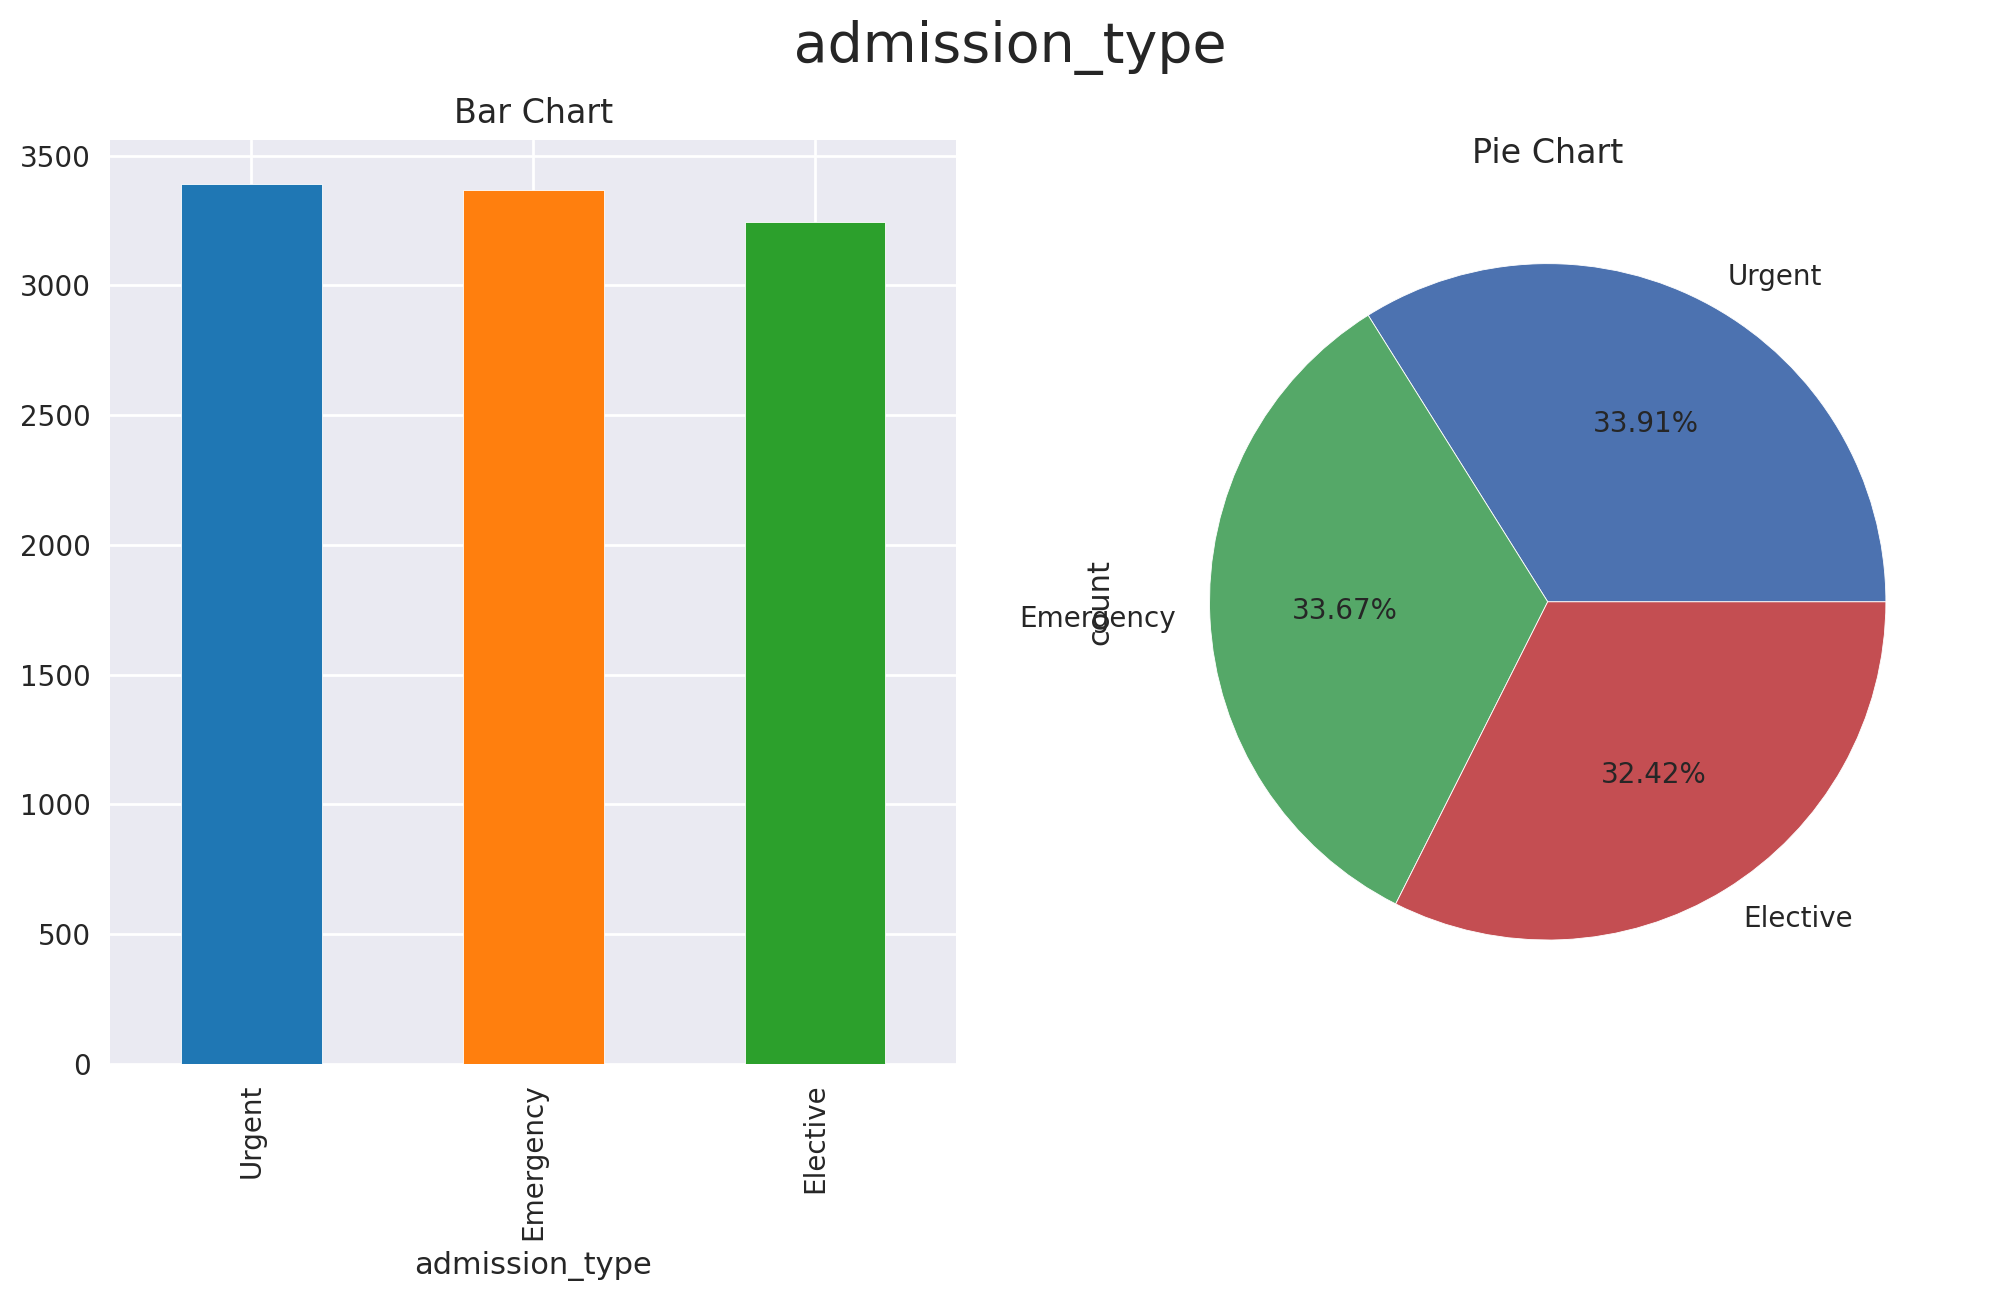

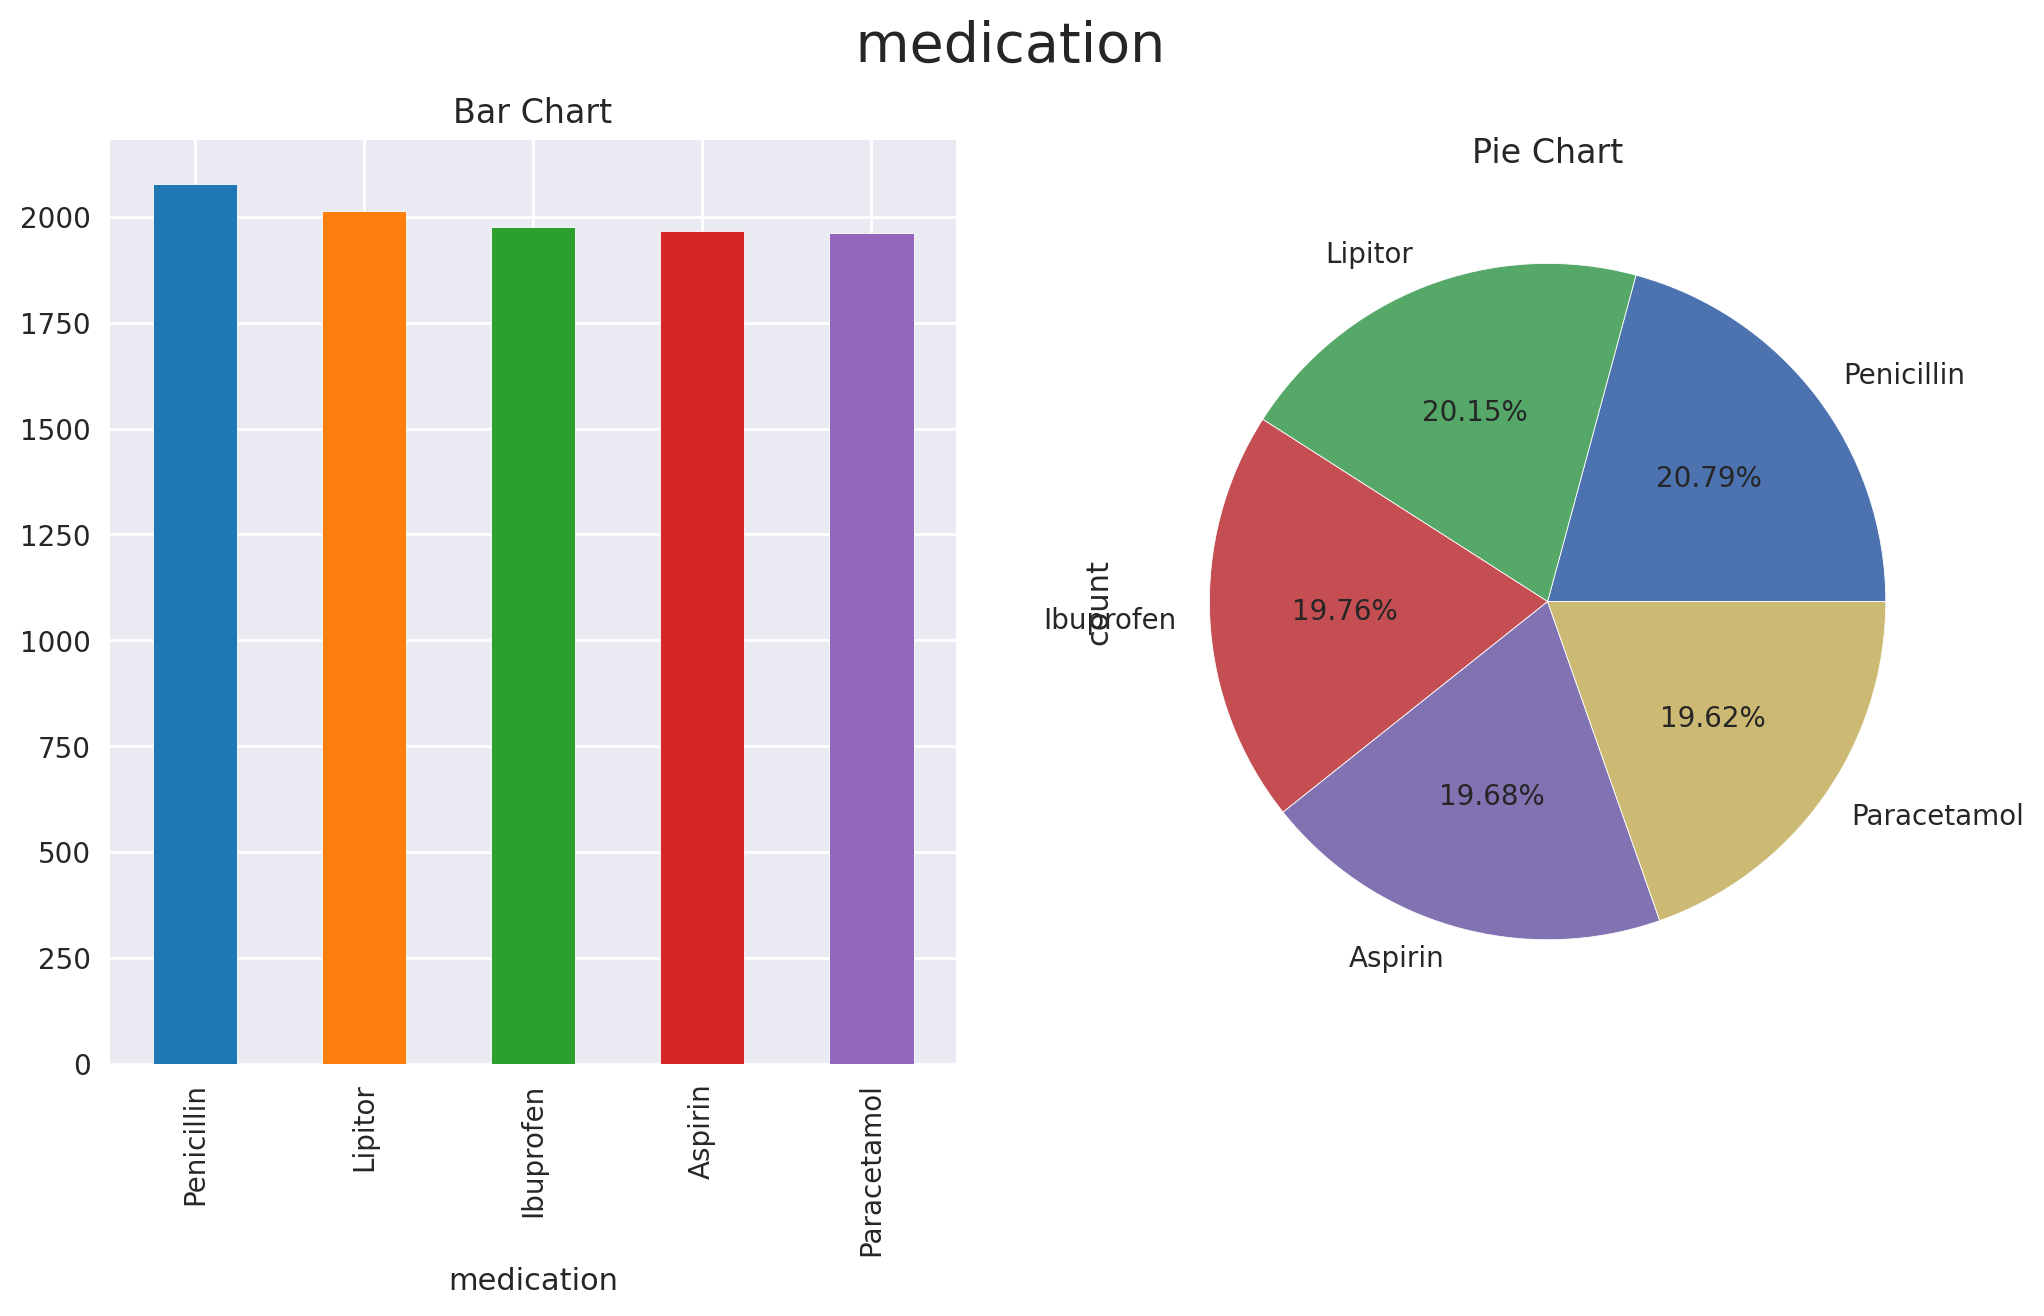

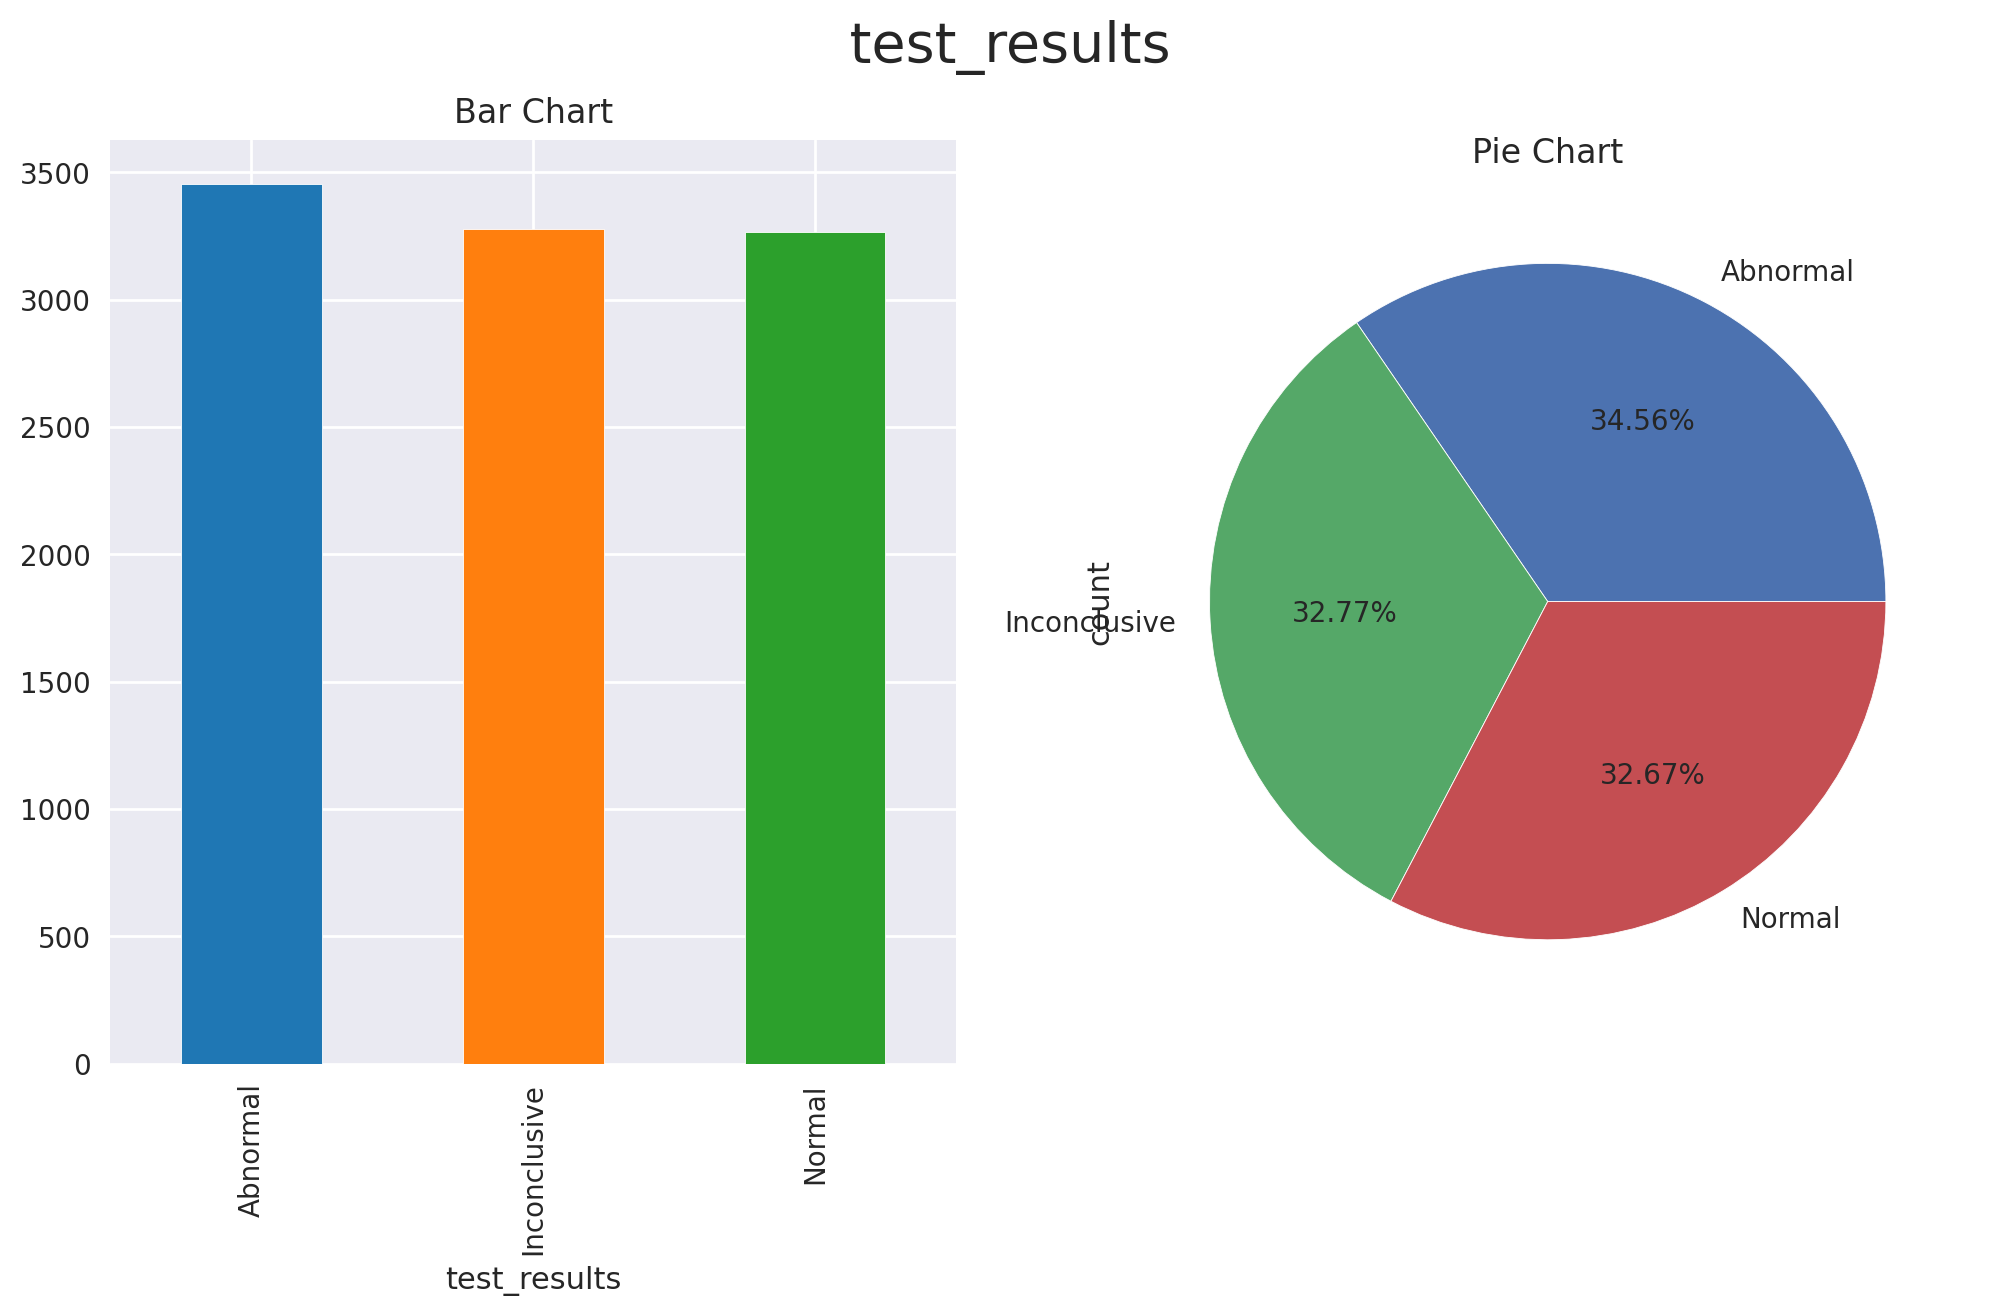

In [15]:
# distribution of categorical features

def plot_categorical_distribution(df, column):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6)) 
    fig.suptitle(f' {column} ', fontsize=20) 
    plt.style.use('seaborn')
    
    ax[0].set_title('Bar Chart')
    df[column].value_counts().plot(kind='bar', color=sns.color_palette("tab10"), ax=ax[0])
    
    ax[1].set_title('Pie Chart')
    df[column].value_counts().plot(kind='pie', autopct="%.2f%%", ax=ax[1])
    
    plt.show()
    
for cat in categorical:
    if cat == 'gender':
        plot_categorical_distribution(df, cat)
    else:
        plot_categorical_distribution(df, cat)


# 2. Data Pre-processing

### Data Cleaning

In [16]:
# checking for null values
df.isna().sum()

name                 0
age                  0
gender               0
blood_type           0
medical_condition    0
date_of_admission    0
doctor               0
hospital             0
insurance            0
bill                 0
room                 0
admission_type       0
discharge_date       0
medication           0
test_results         0
dtype: int64

<Axes: >

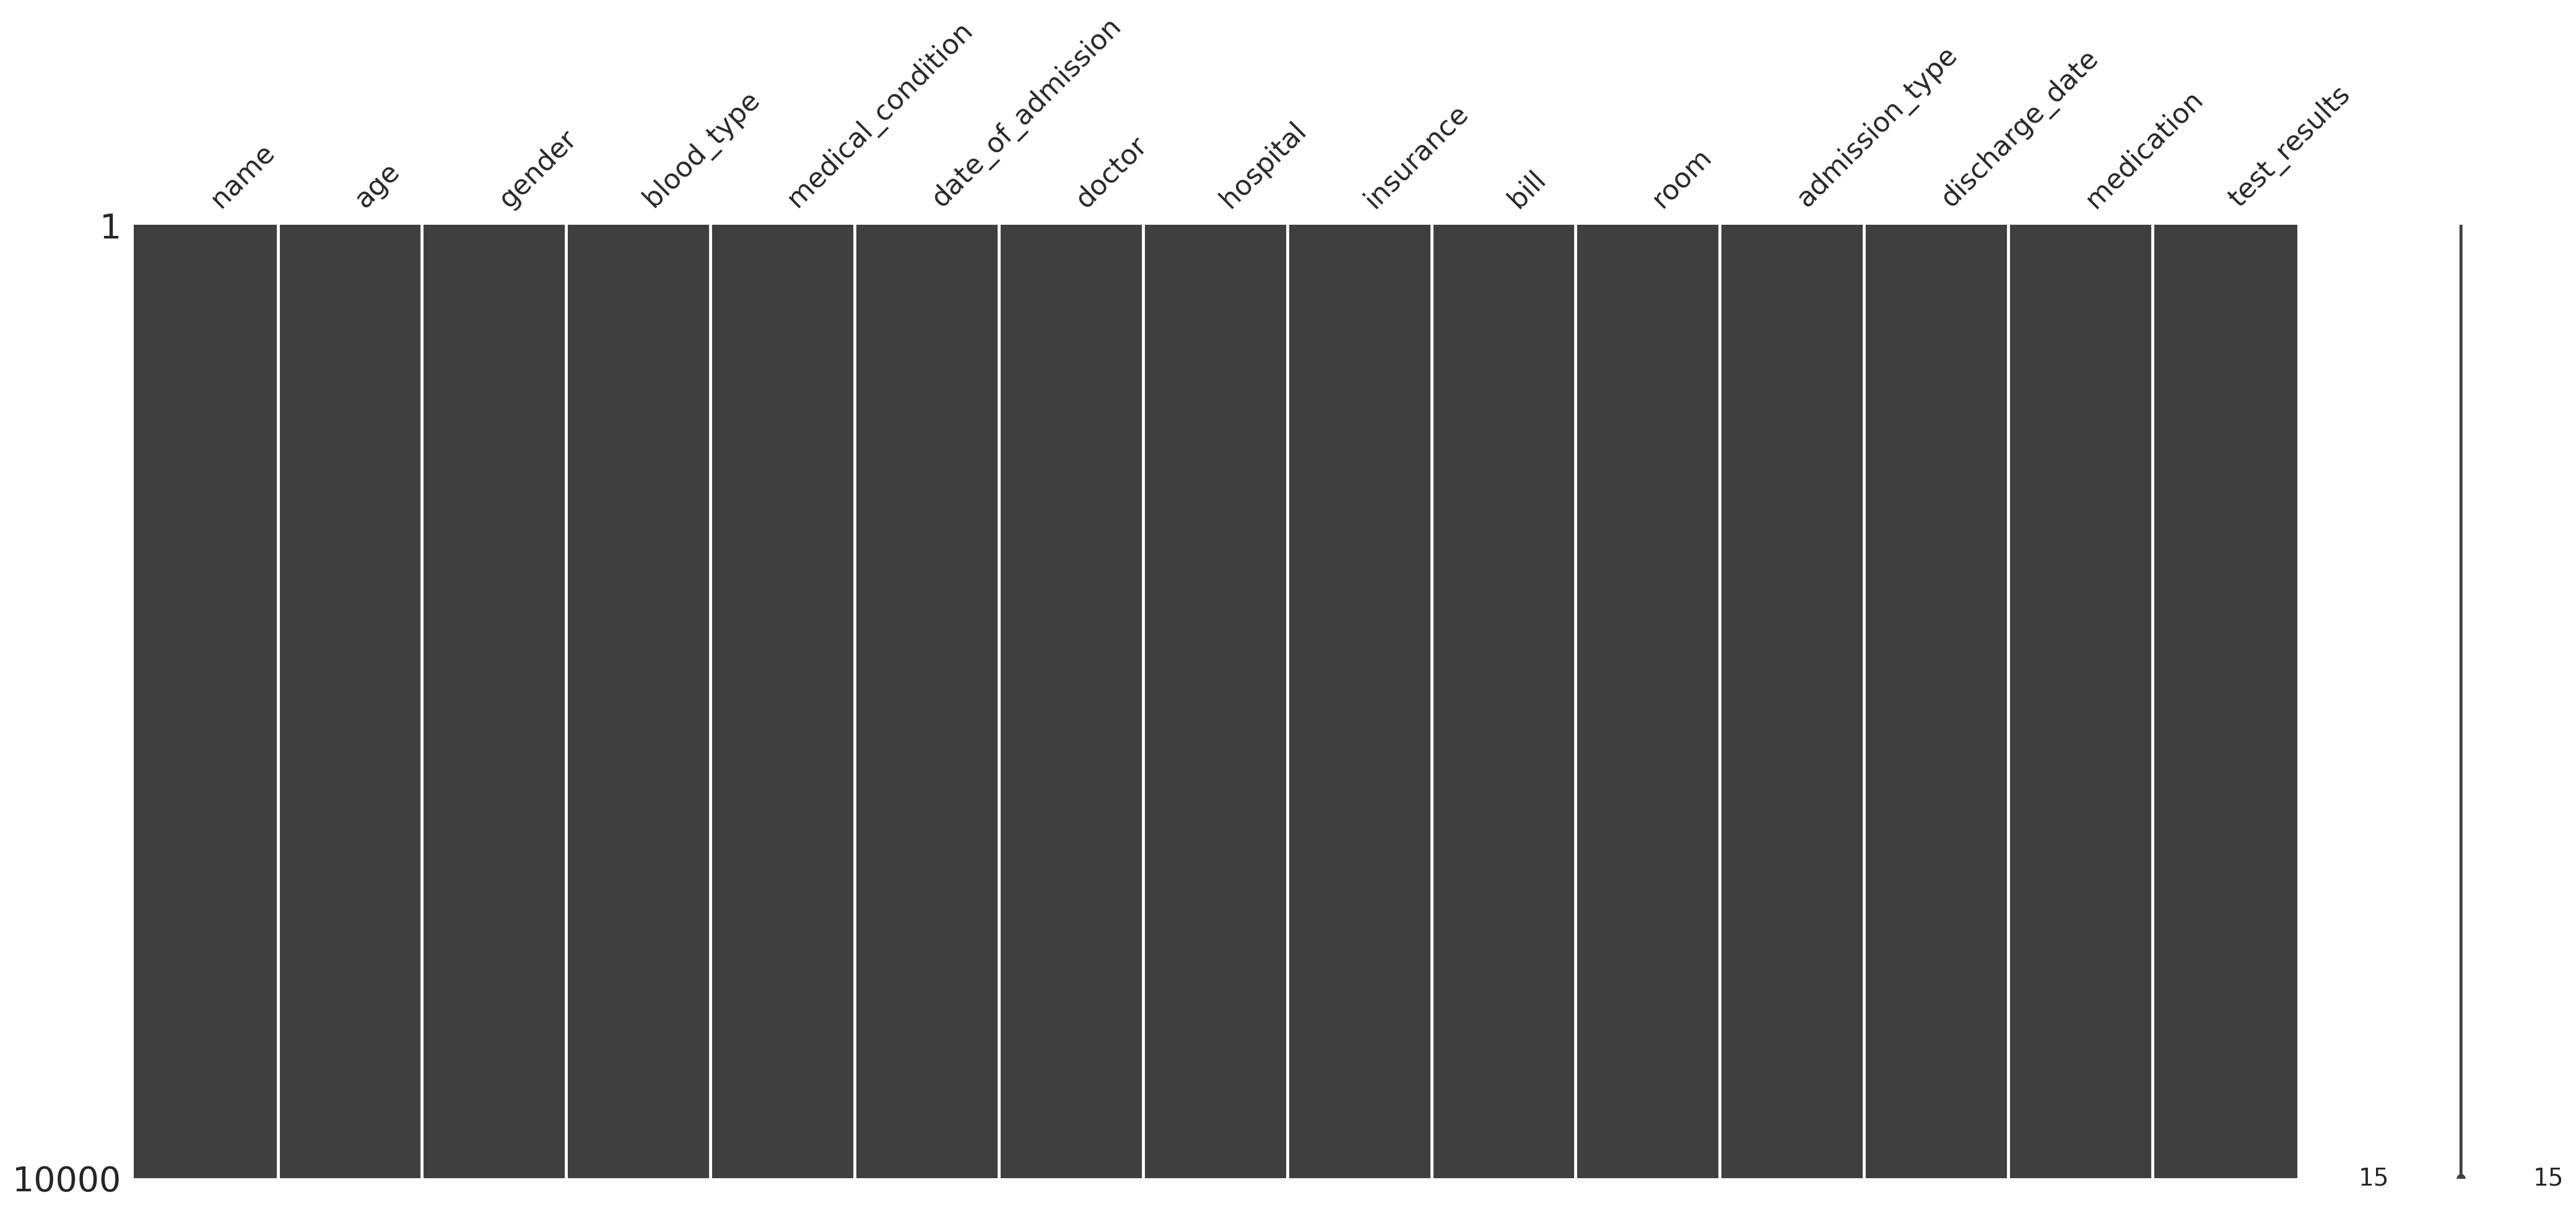

In [17]:
# visualize misssing values
msno.matrix(df)

In [18]:
# removing irrelevant features (name, room & doctor)
df = df.drop(['name','room', 'doctor'], axis=1)

### Feature Engineering

In [19]:
# create new feature; age_group
def age_group(age):
    if 18 < age <= 35:
        return 'Young'
    elif 36 < age <= 50:
        return 'Middle-aged'
    elif 51 < age <= 85:  # Corrected the upper limit for the "Old" category
        return 'Old'

# Create a new column 'age_group' based on the age using the defined function
df['age_group'] = df['age'].apply(age_group)

# Display the DataFrame with the new 'age_group' column
df[['age_group']].sample(5)

age_group
1462          Old
2690          Old
2726  Middle-aged
5397  Middle-aged
6595          Old

(-1.0999993437004059,
 1.0999999687476385,
 -1.0999995028778065,
 1.0999997432944728)

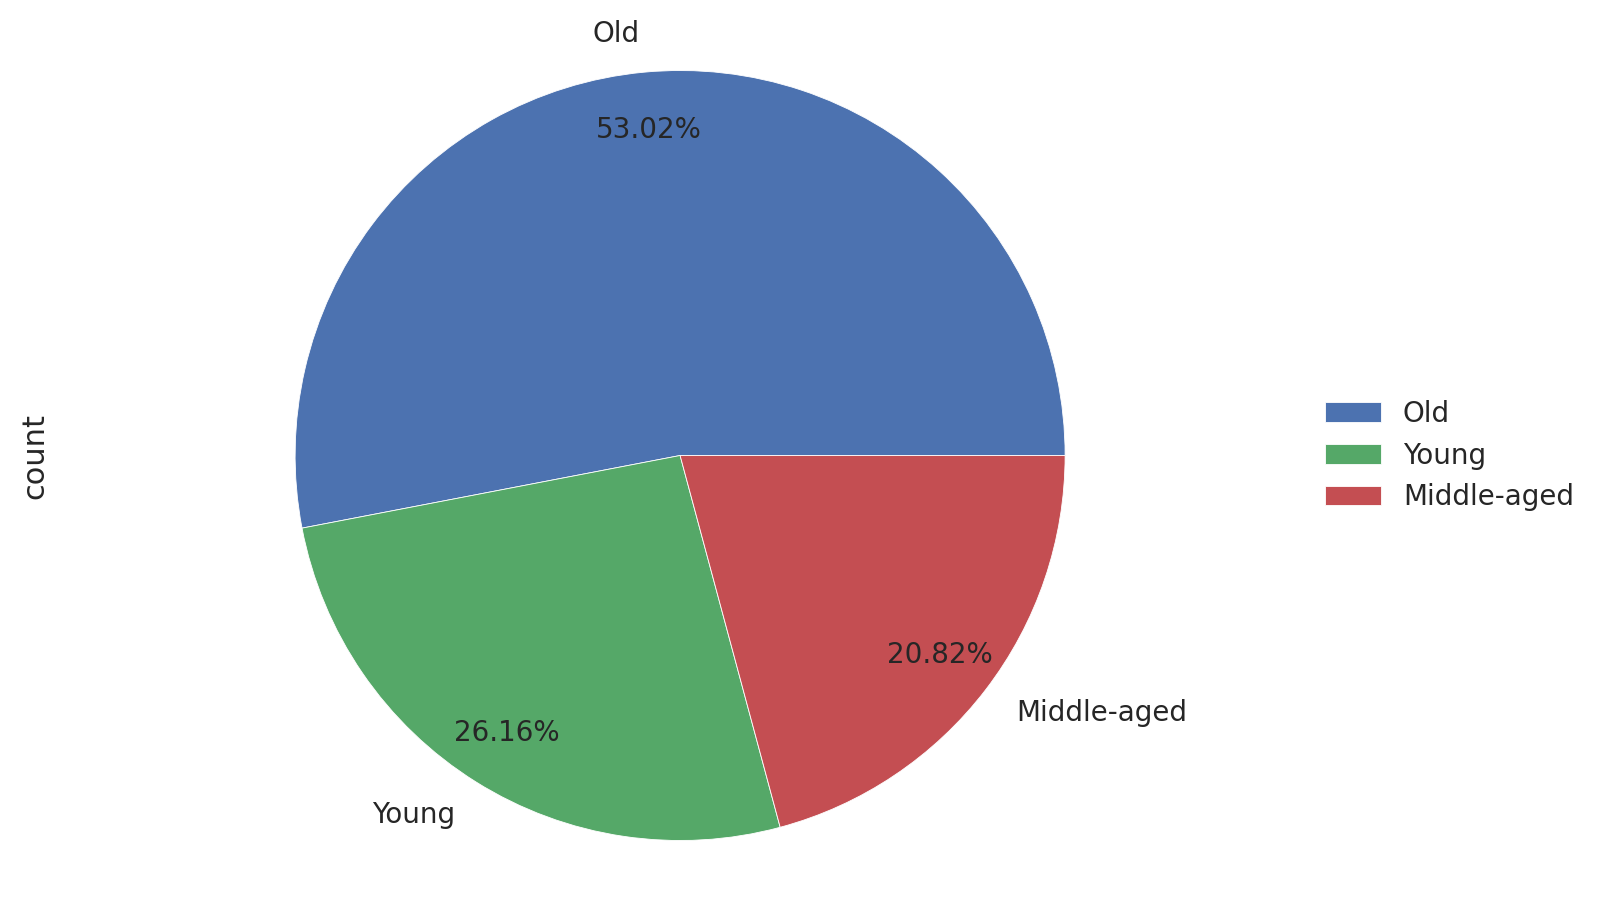

In [20]:
# % distribution of Age Group
df['age_group'].value_counts().plot(kind='pie', autopct="%.2f%%", pctdistance=0.85)
plt.legend(bbox_to_anchor=(1, 0.5), loc="center left")
plt.axis('equal')

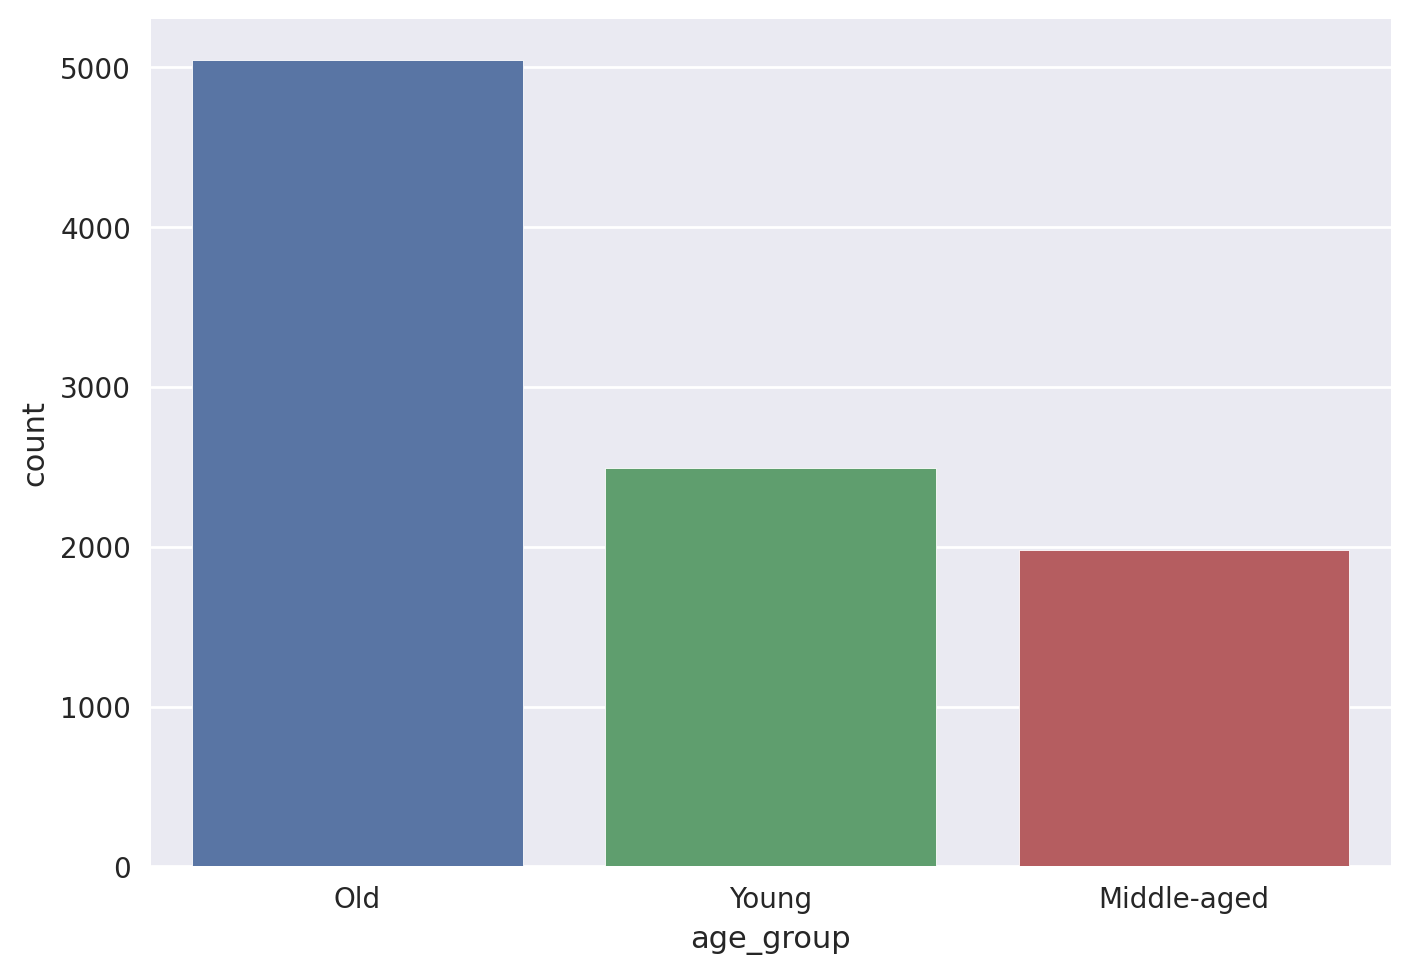

In [21]:
sns.countplot(x = 'age_group', data = df);

In [22]:
# create new feature; days hospitalized

df['date_of_admission']= pd.to_datetime(df['date_of_admission'])
df['discharge_date']= pd.to_datetime(df['discharge_date'])
df['days_hospitalized'] = df['discharge_date'] - df['date_of_admission']
df['days_hospitalized'] = df['days_hospitalized'].astype(int) / 86400000000000 # Converting to number of days

df[['days_hospitalized']].sample(5)

days_hospitalized
190                10.0
5340               25.0
3322               14.0
7481               12.0
9874                3.0

In [23]:
df['days_hospitalized'].describe()

count    10000.000000
mean        15.561800
std          8.612038
min          1.000000
25%          8.000000
50%         16.000000
75%         23.000000
max         30.000000
Name: days_hospitalized, dtype: float64

# 3. EDA: Exploratory Data Analysis

### Quantitative - Quantitative

<Axes: xlabel='days_hospitalized', ylabel='bill'>

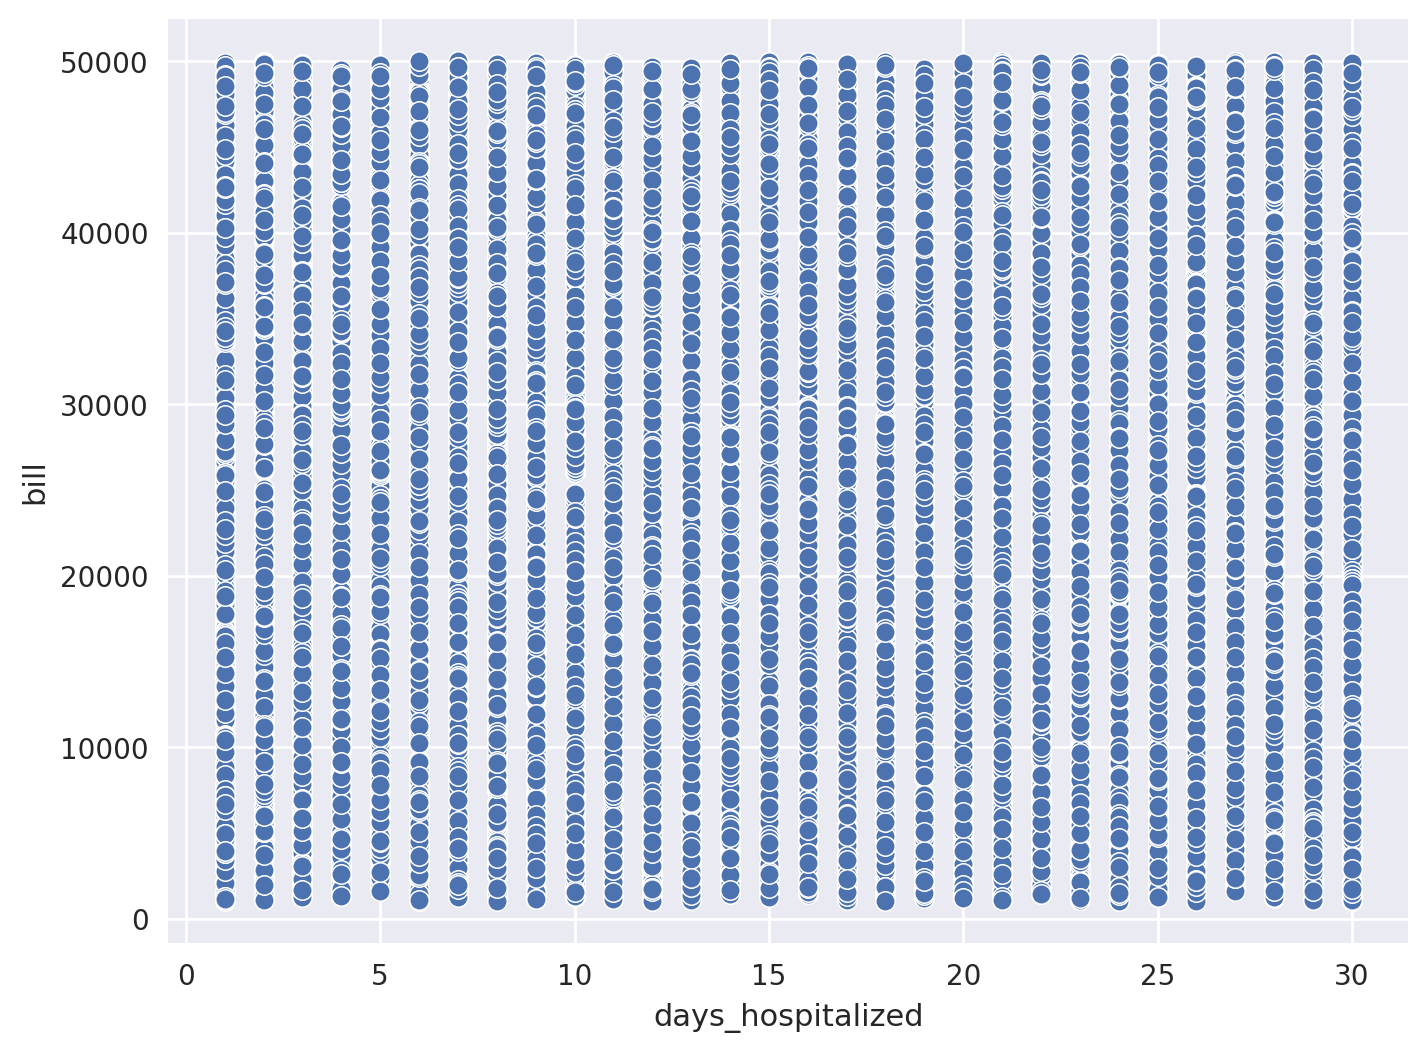

In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='days_hospitalized', y='bill', data=df)

### Quantitative - Categorical

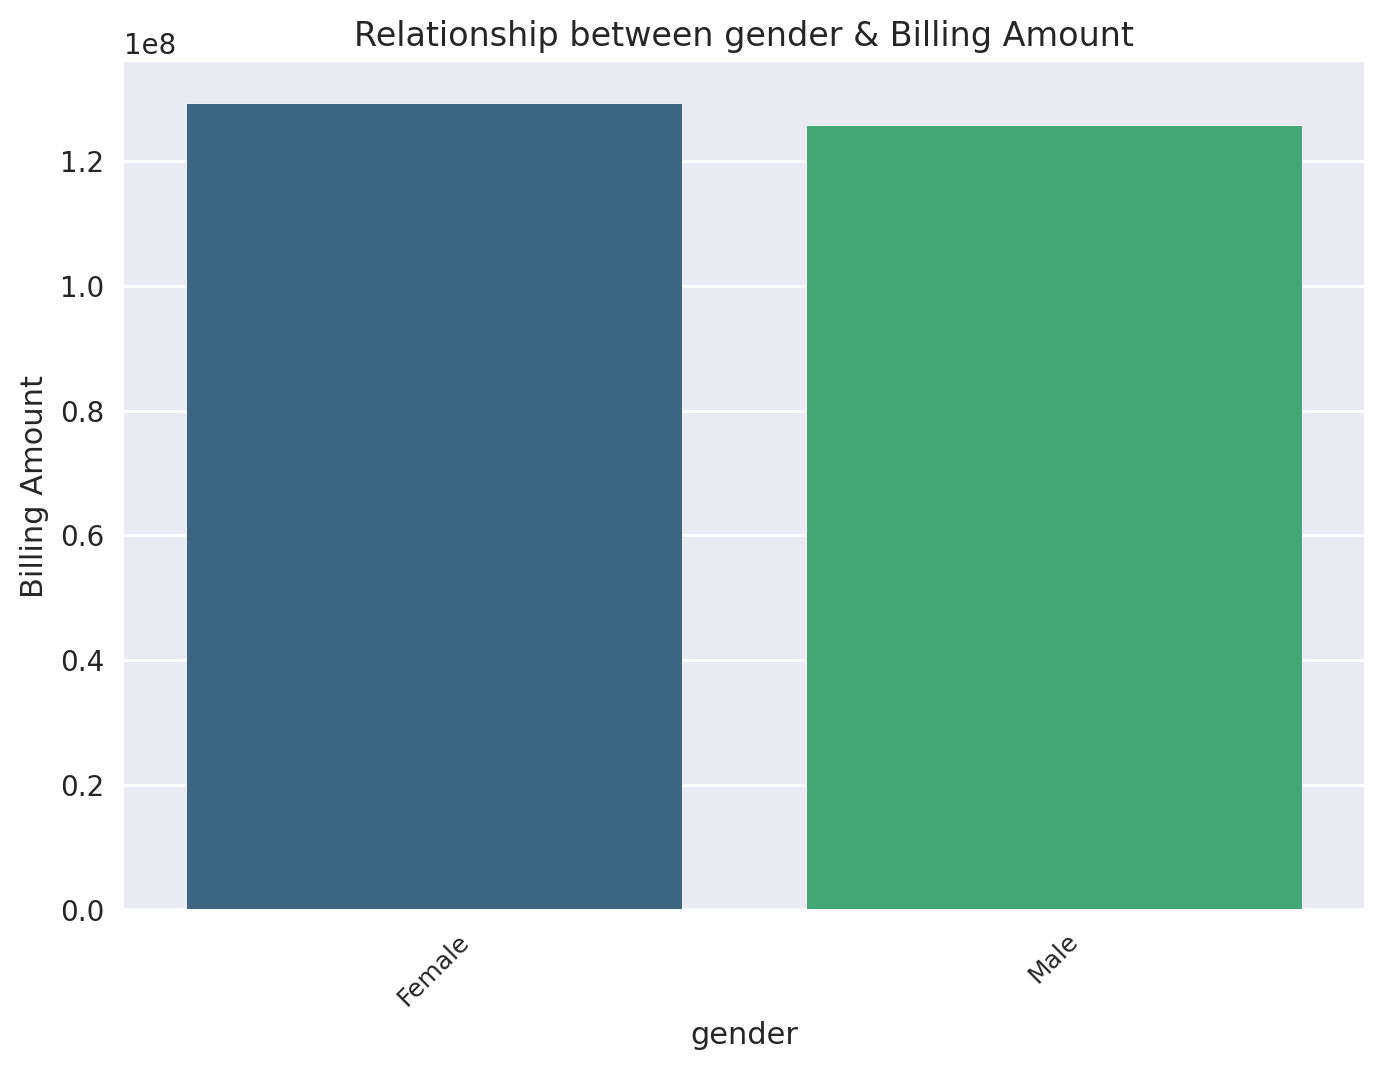

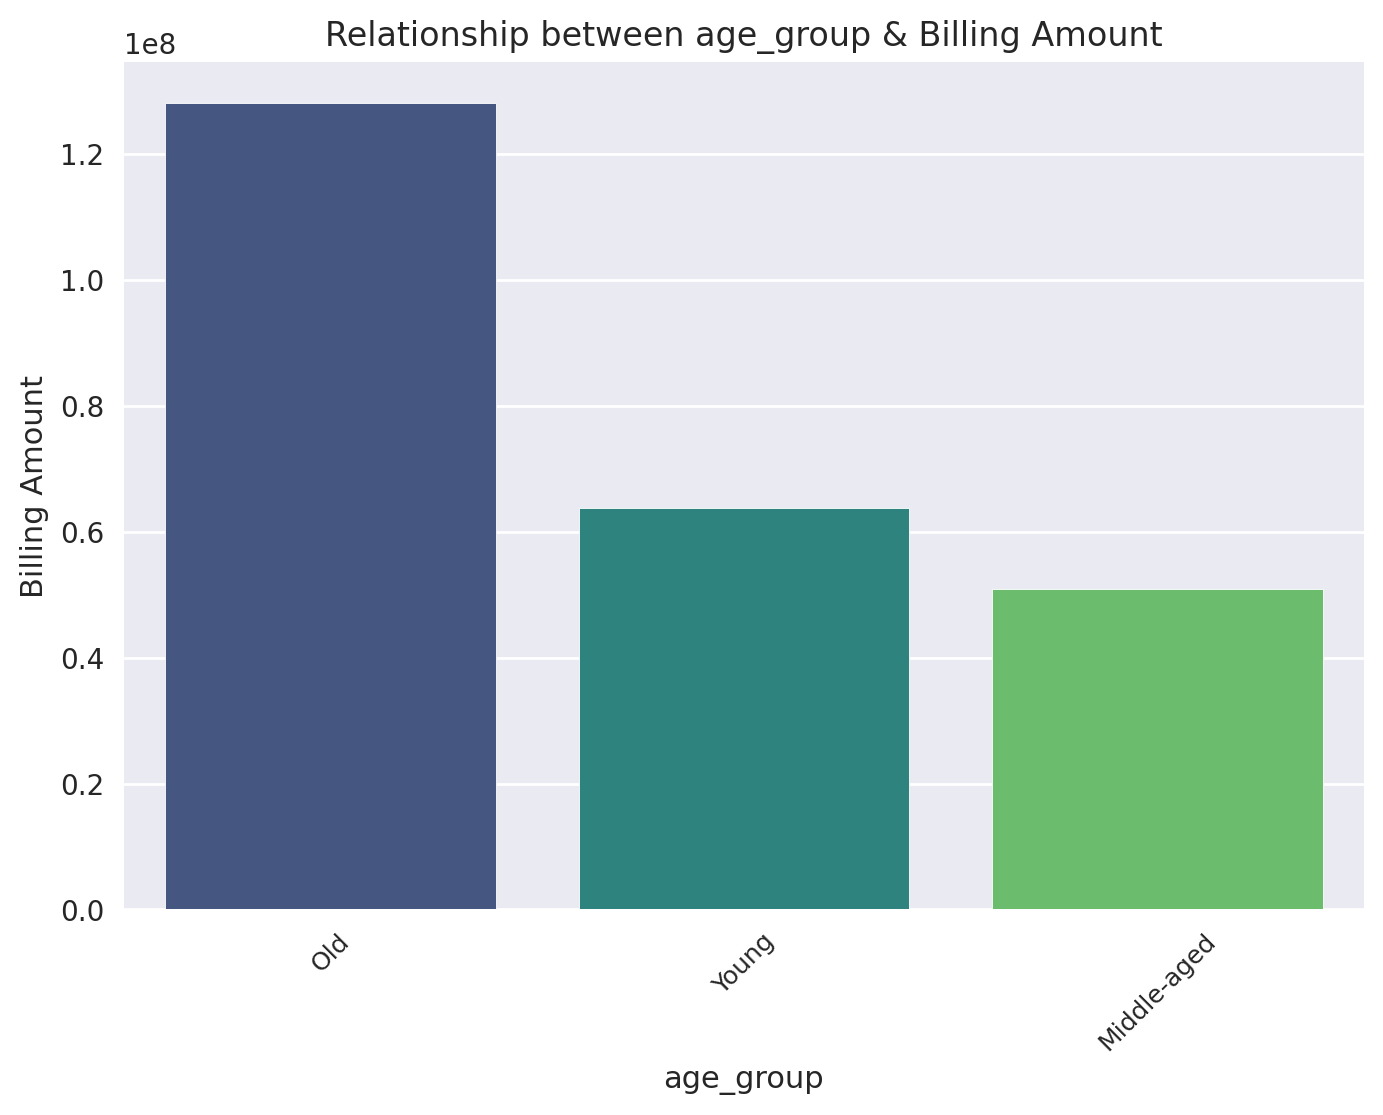

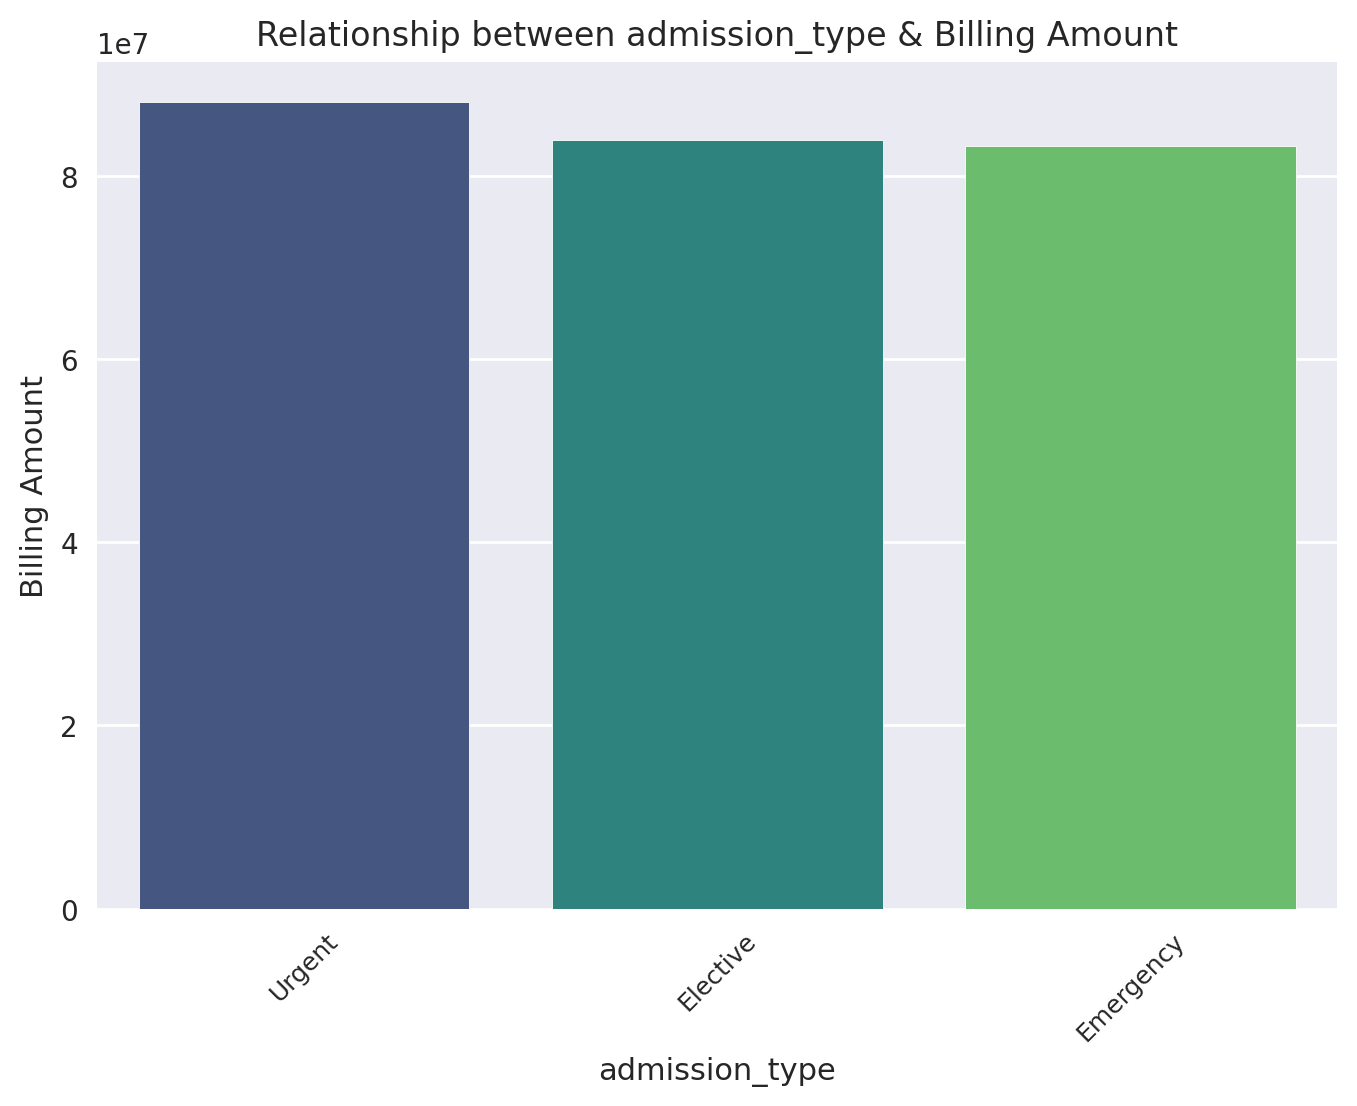

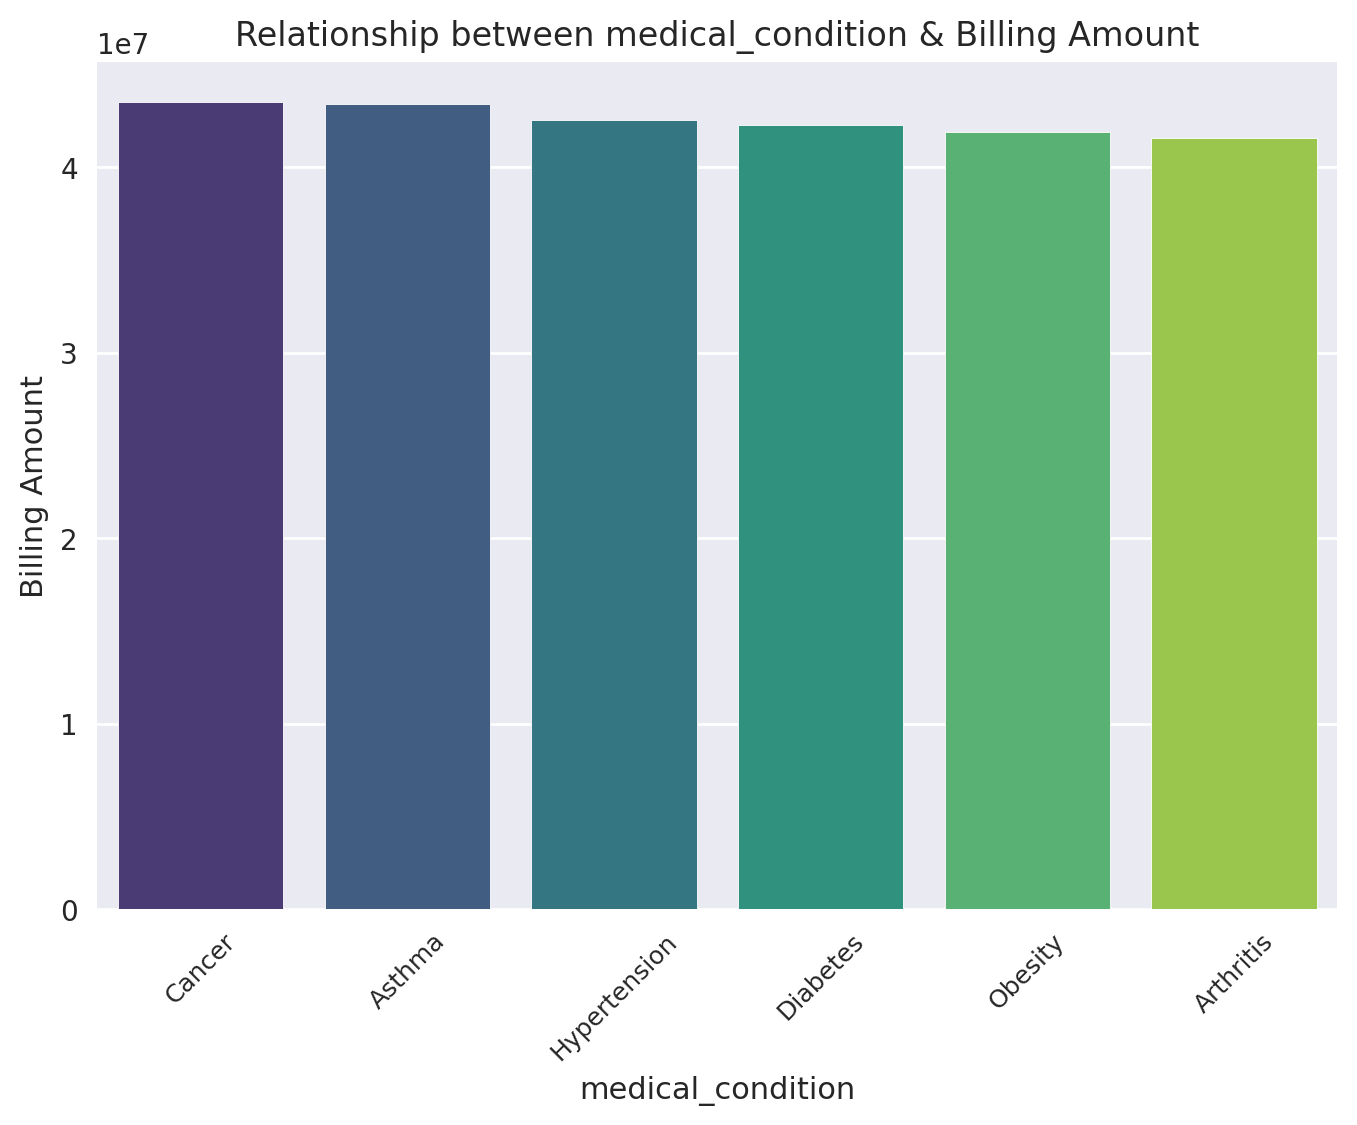

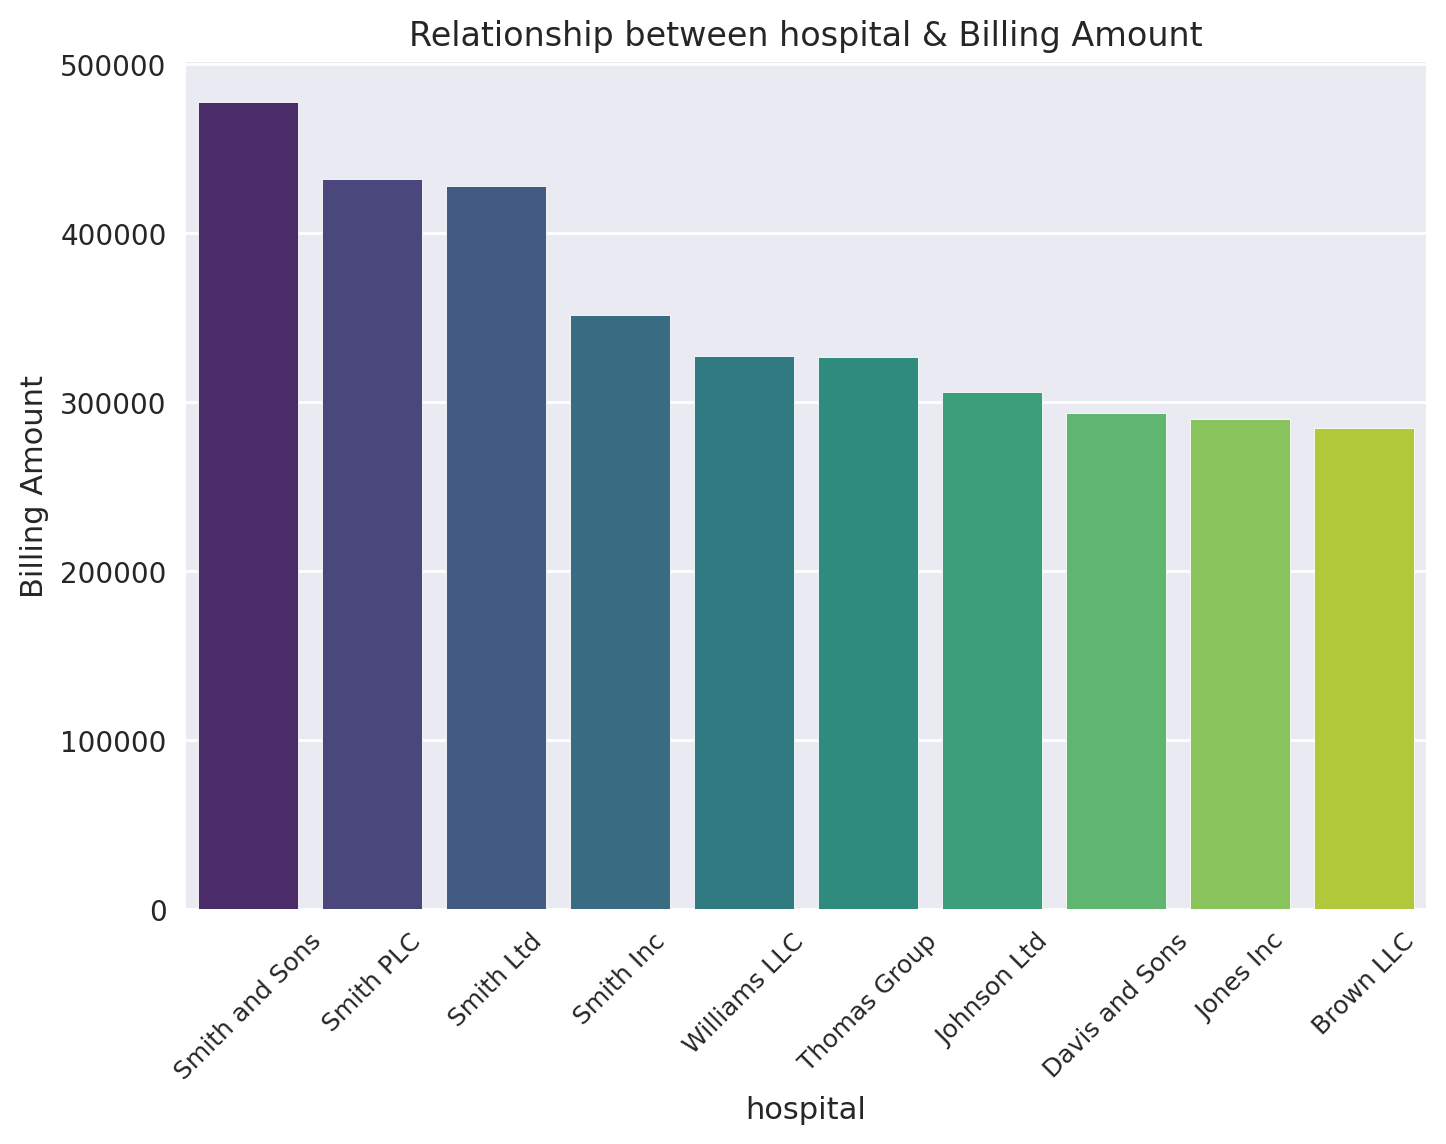

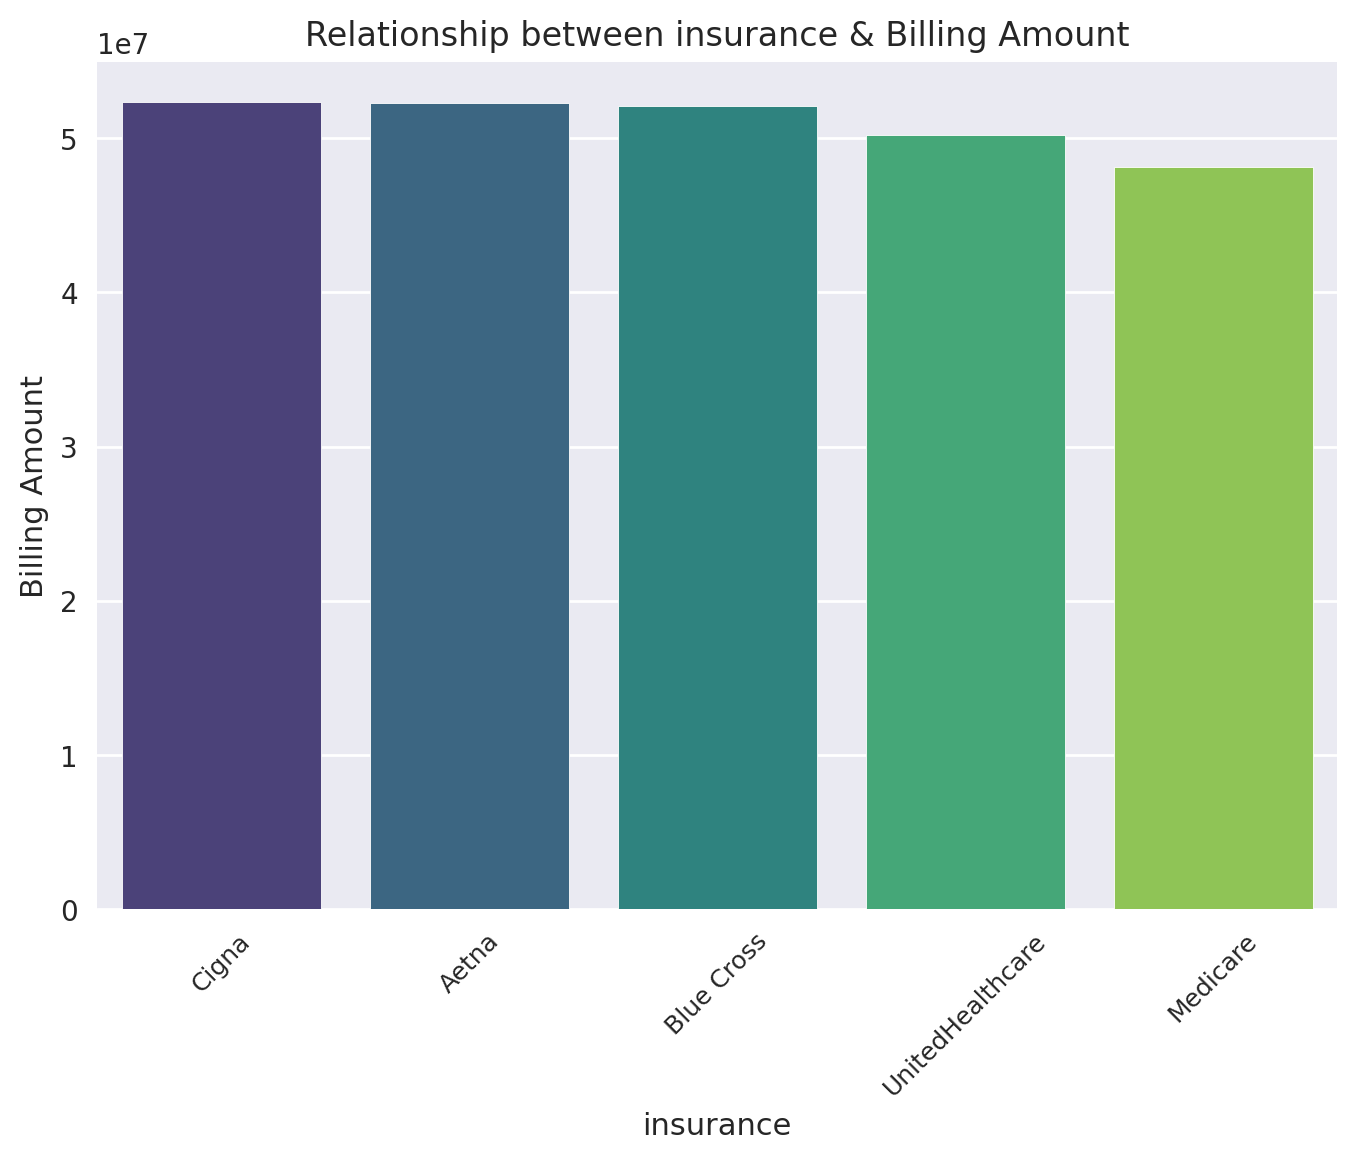

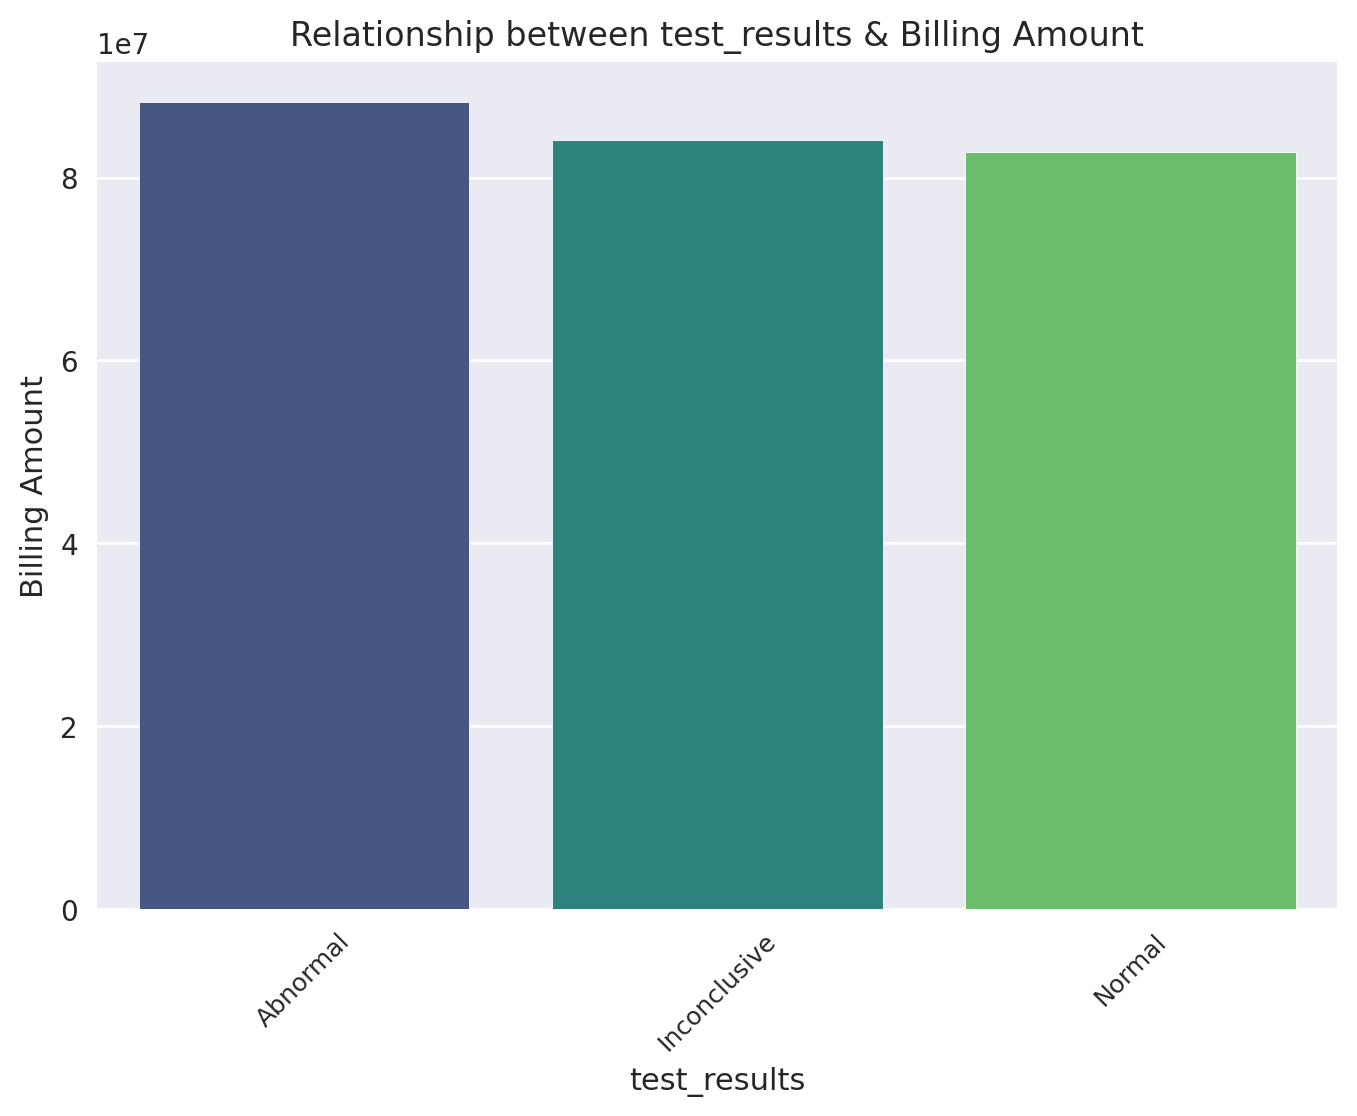

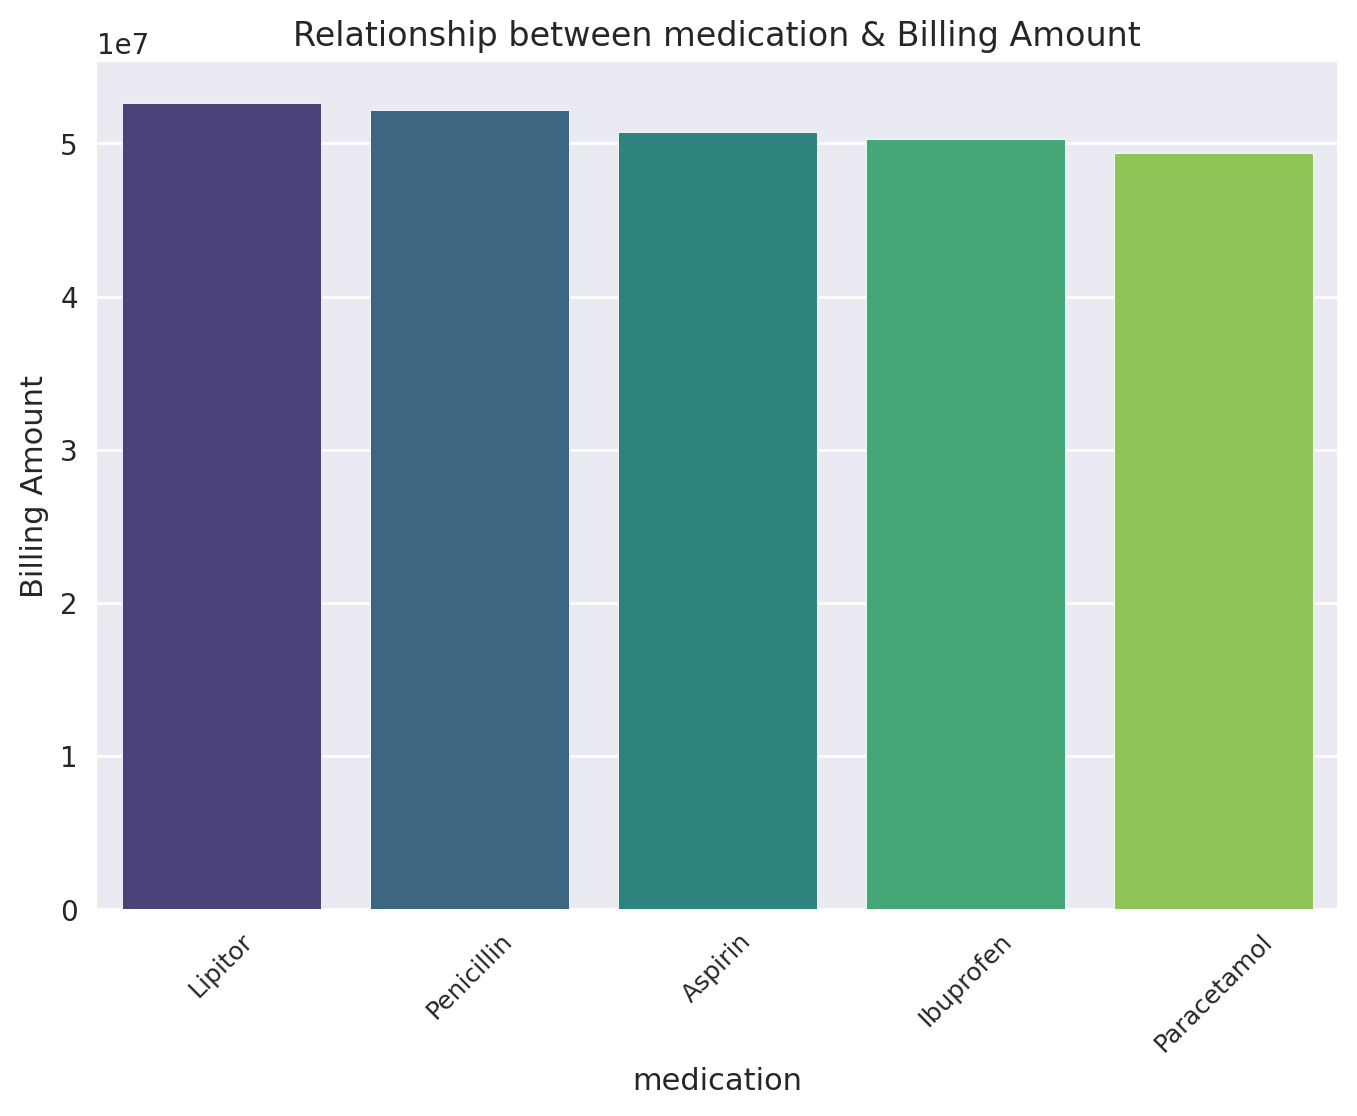

In [25]:
# distribution of categorical features in relation to billing amount

cols = ['gender', 'age_group', 'admission_type', 'medical_condition',
        'hospital', 'insurance', 'test_results', 'medication']  

for i in cols:

    if i == 'gender':
        char_bar = df.groupby('gender')['bill'].sum().reset_index()
        char_bar = char_bar.sort_values(by='bill', ascending=False)
    else:
        char_bar = df.groupby(i)['bill'].sum().reset_index()
        char_bar = char_bar.sort_values(by='bill', ascending=False)

    top = char_bar.head(10)

    sns.barplot(x=i, y='bill', data=top, palette='viridis')
    plt.title(f'Relationship between {i} & Billing Amount')
    plt.xlabel(i)
    plt.ylabel('Billing Amount')
    plt.xticks(rotation=45, fontsize = 9)
    plt.show()

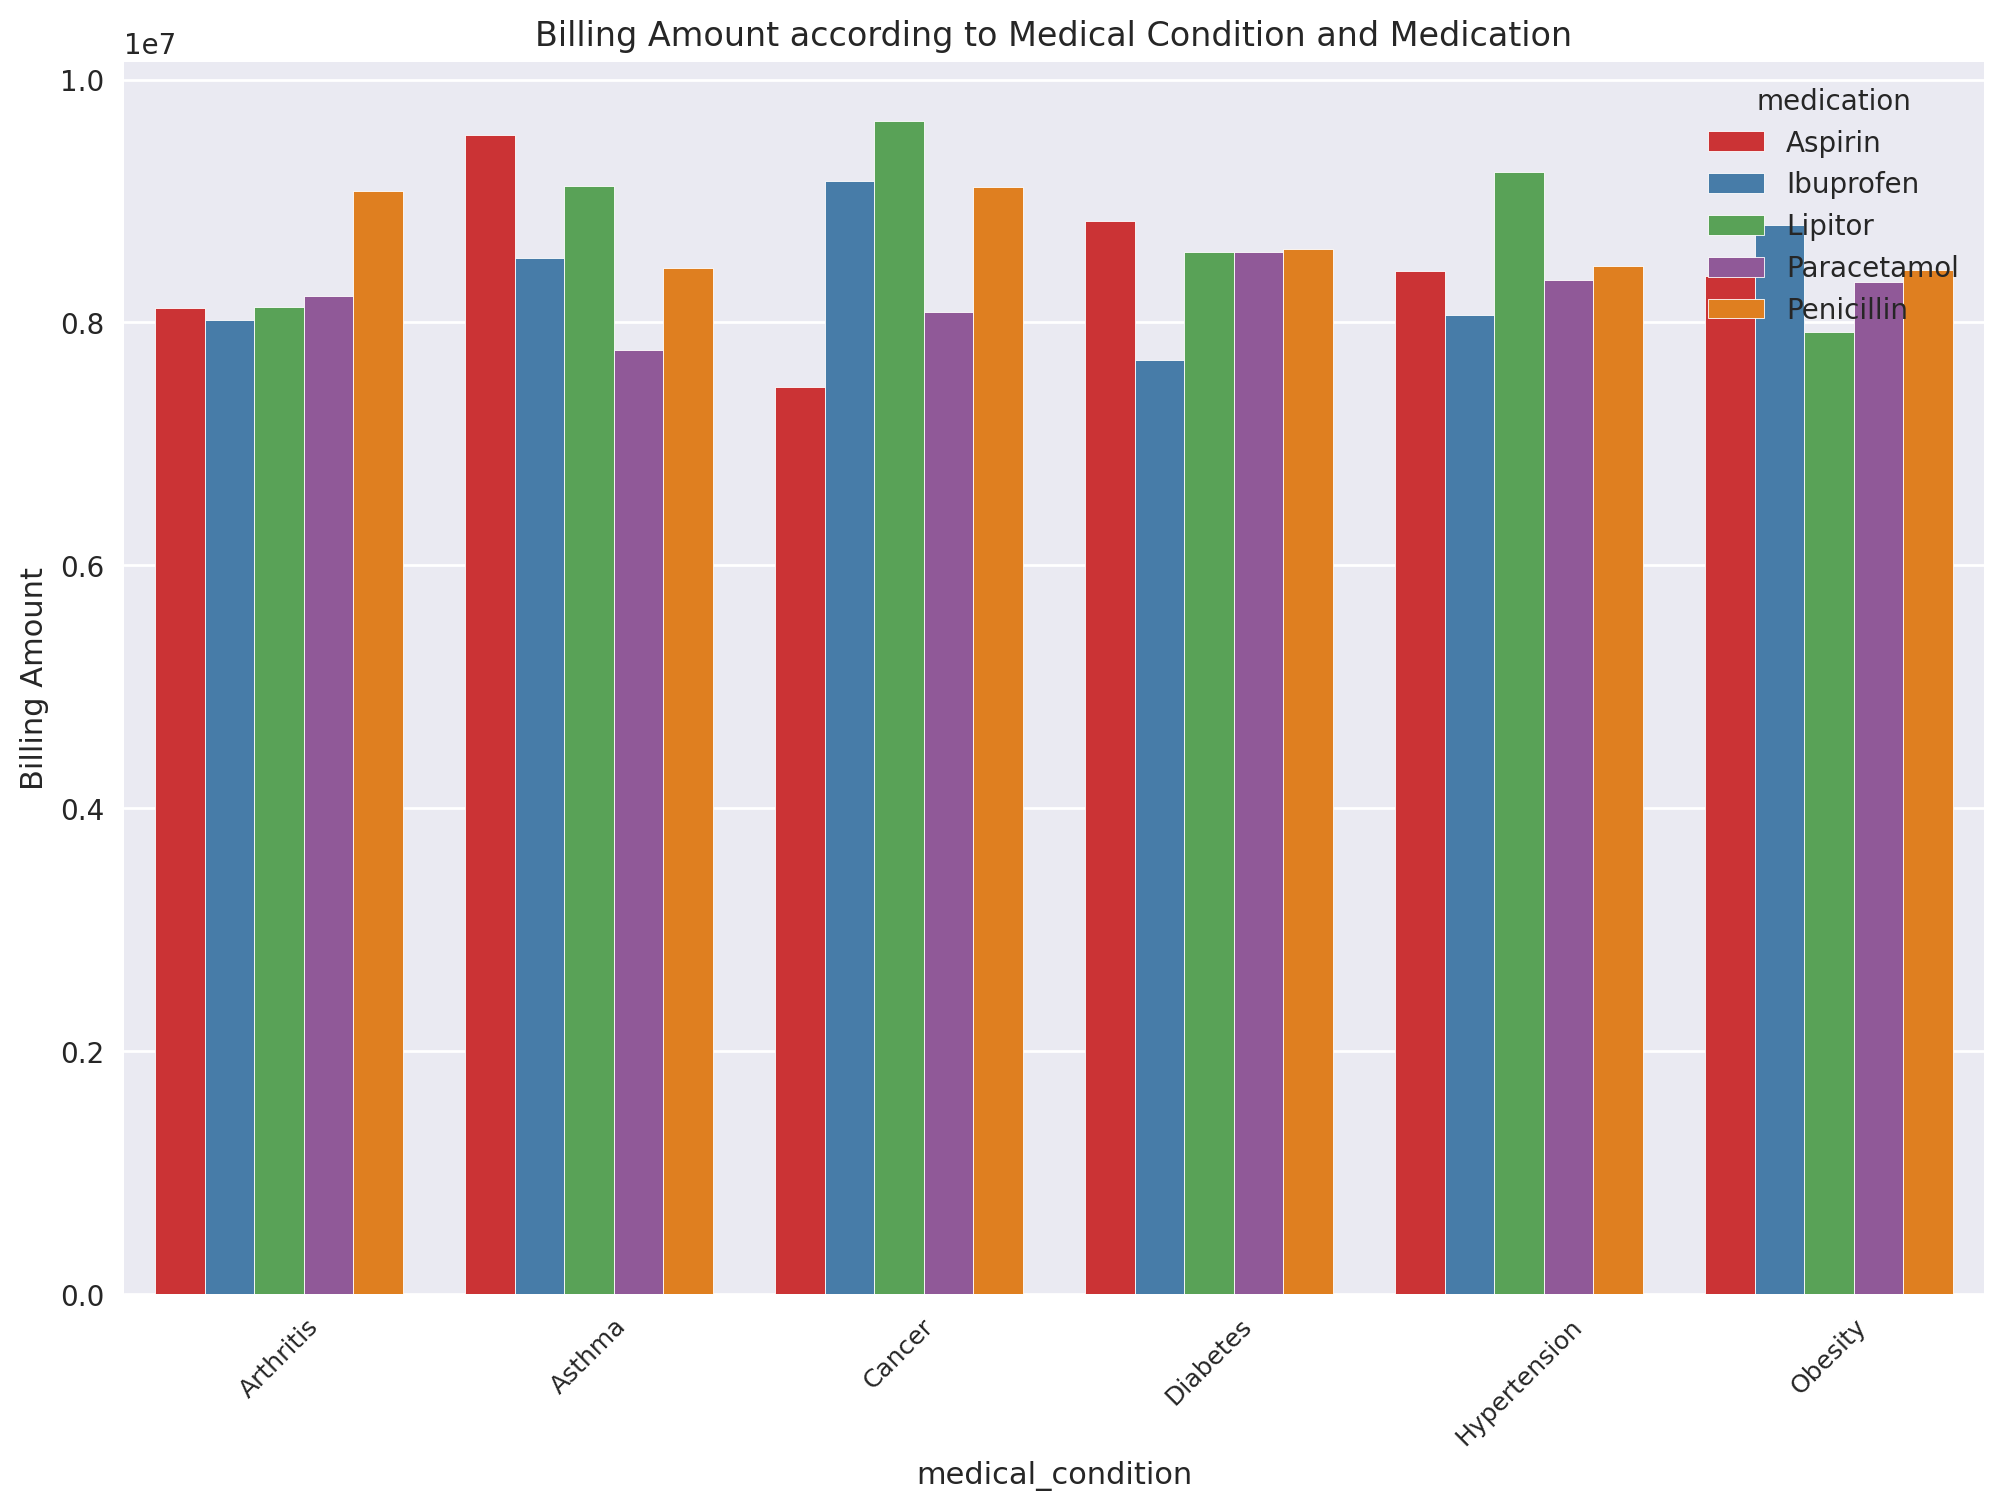

In [26]:
# Billing Amount according to Medical Condition and Medication
df_trans = df.groupby(['medical_condition', 'medication'])[['bill']].sum().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=df_trans['medical_condition'], y=df_trans['bill'], hue=df_trans['medication'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Medication")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

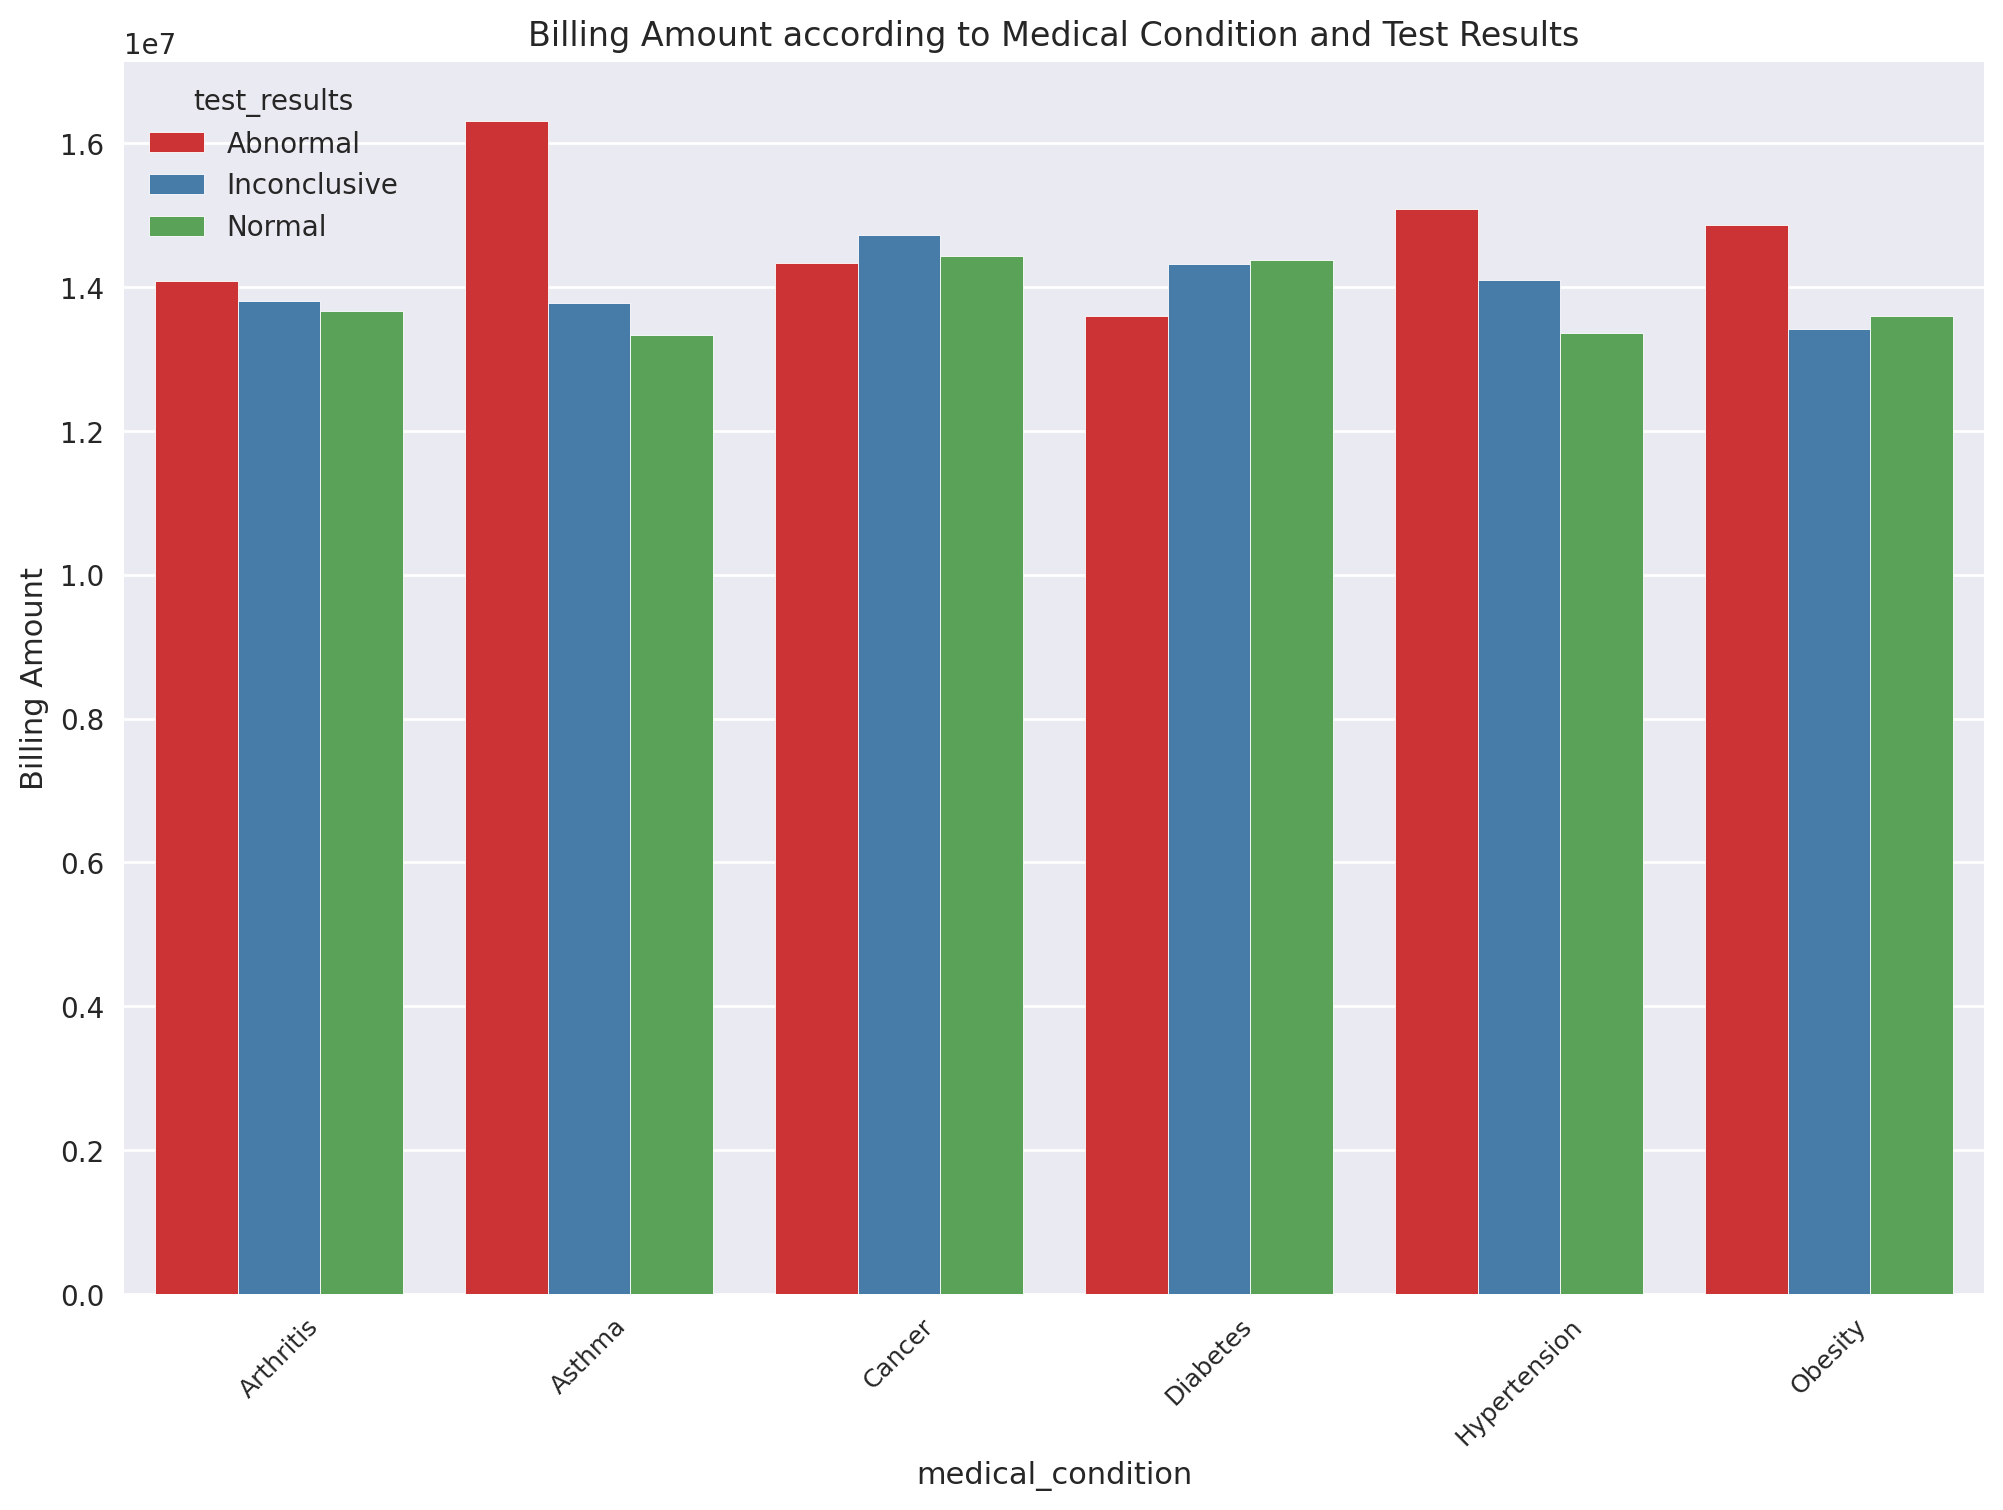

In [27]:
# Billing Amount according to Medical Condition and Test Results
df_trans = df.groupby(['medical_condition', 'test_results'])[['bill']].sum().reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=df_trans['medical_condition'], y=df_trans['bill'], hue=df_trans['test_results'], ci=None, palette="Set1")
plt.title("Billing Amount according to Medical Condition and Test Results")
plt.ylabel("Billing Amount")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

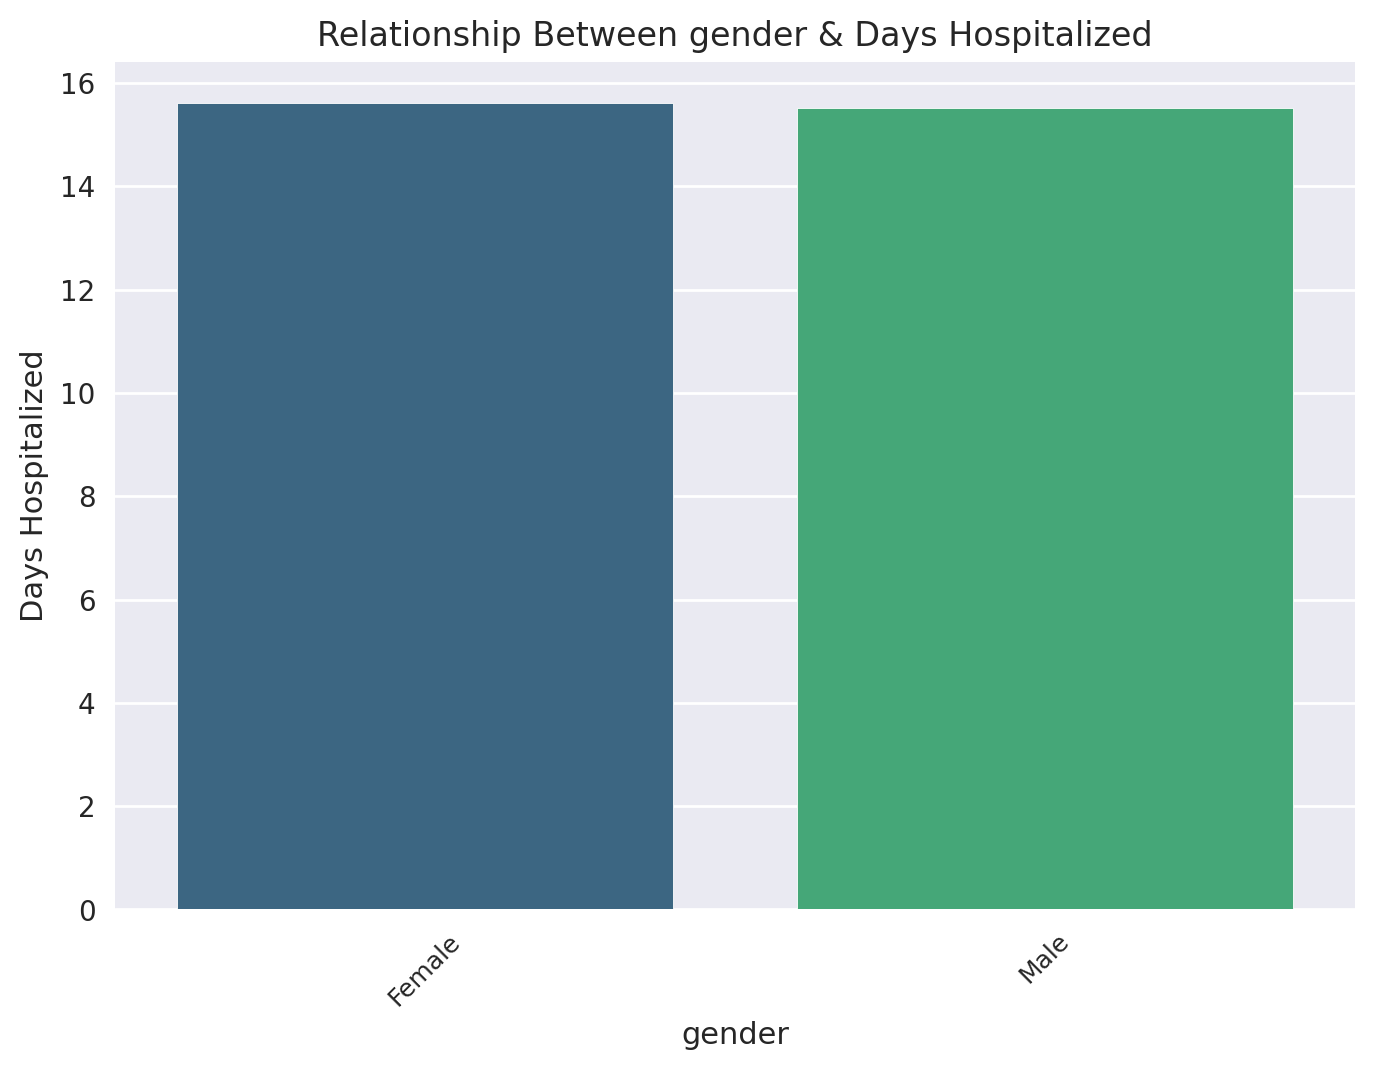

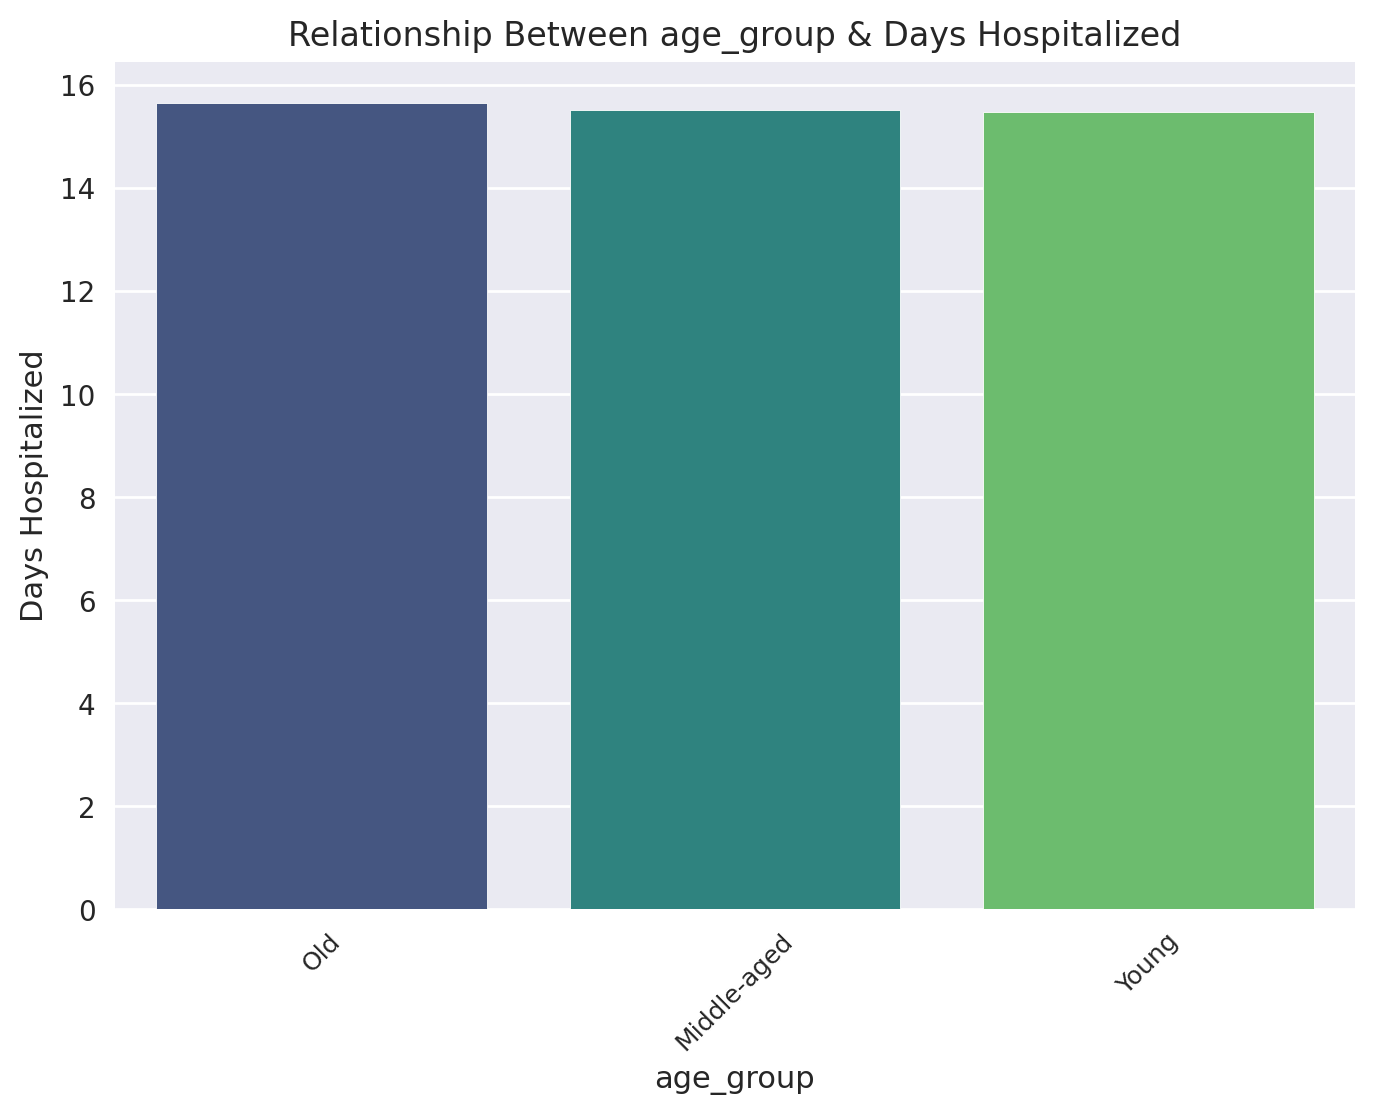

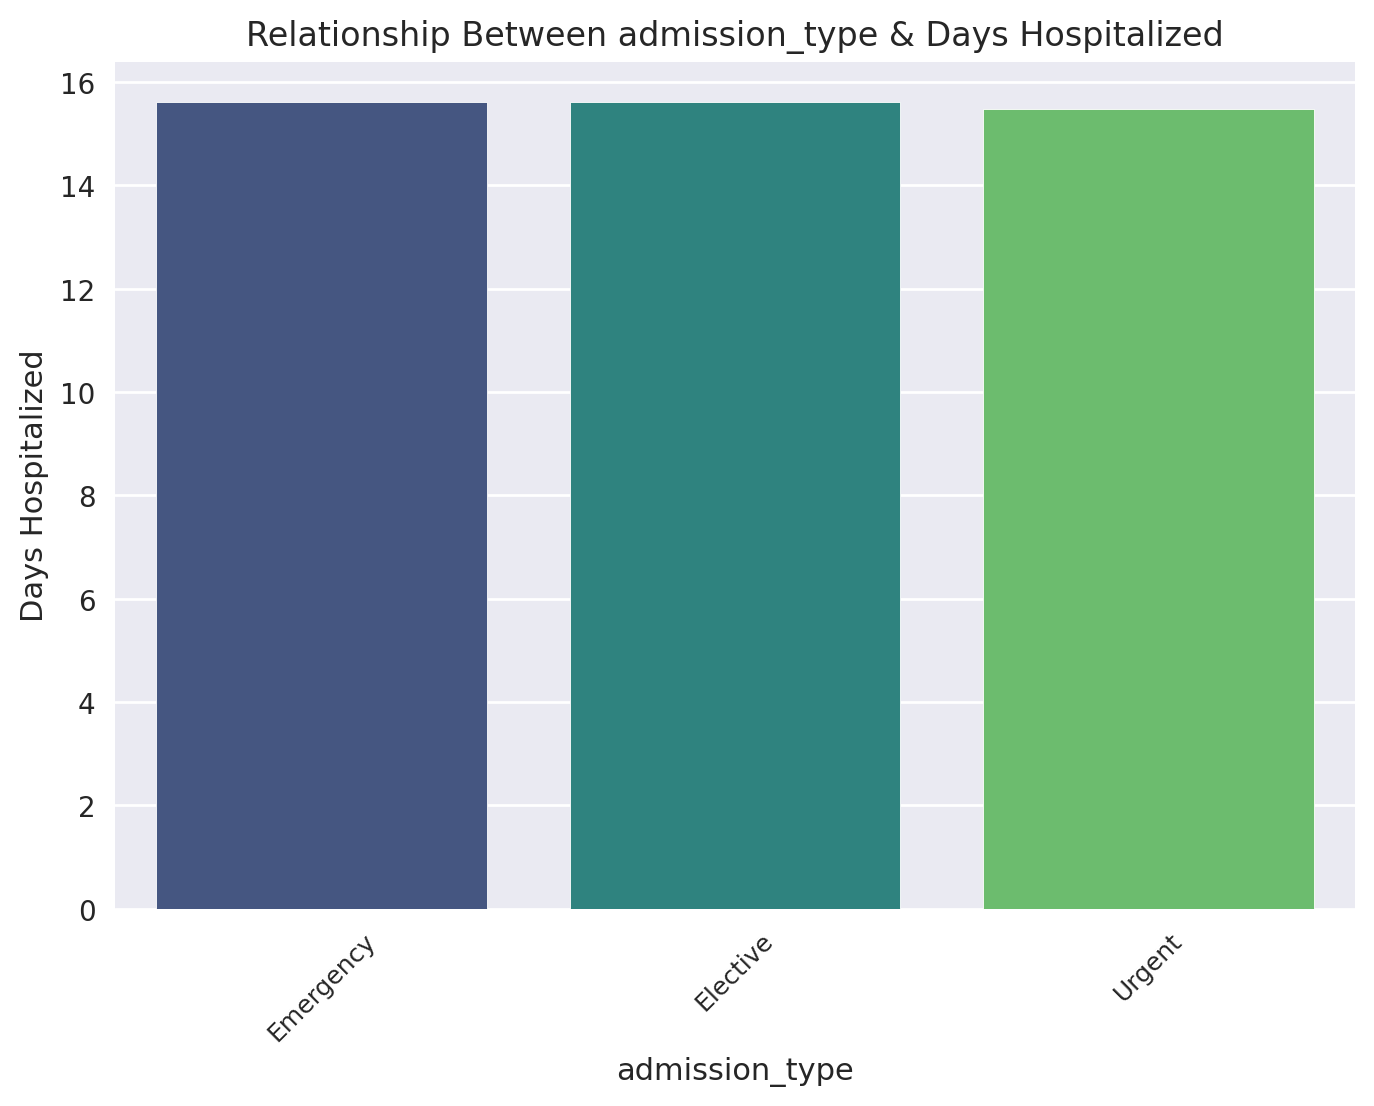

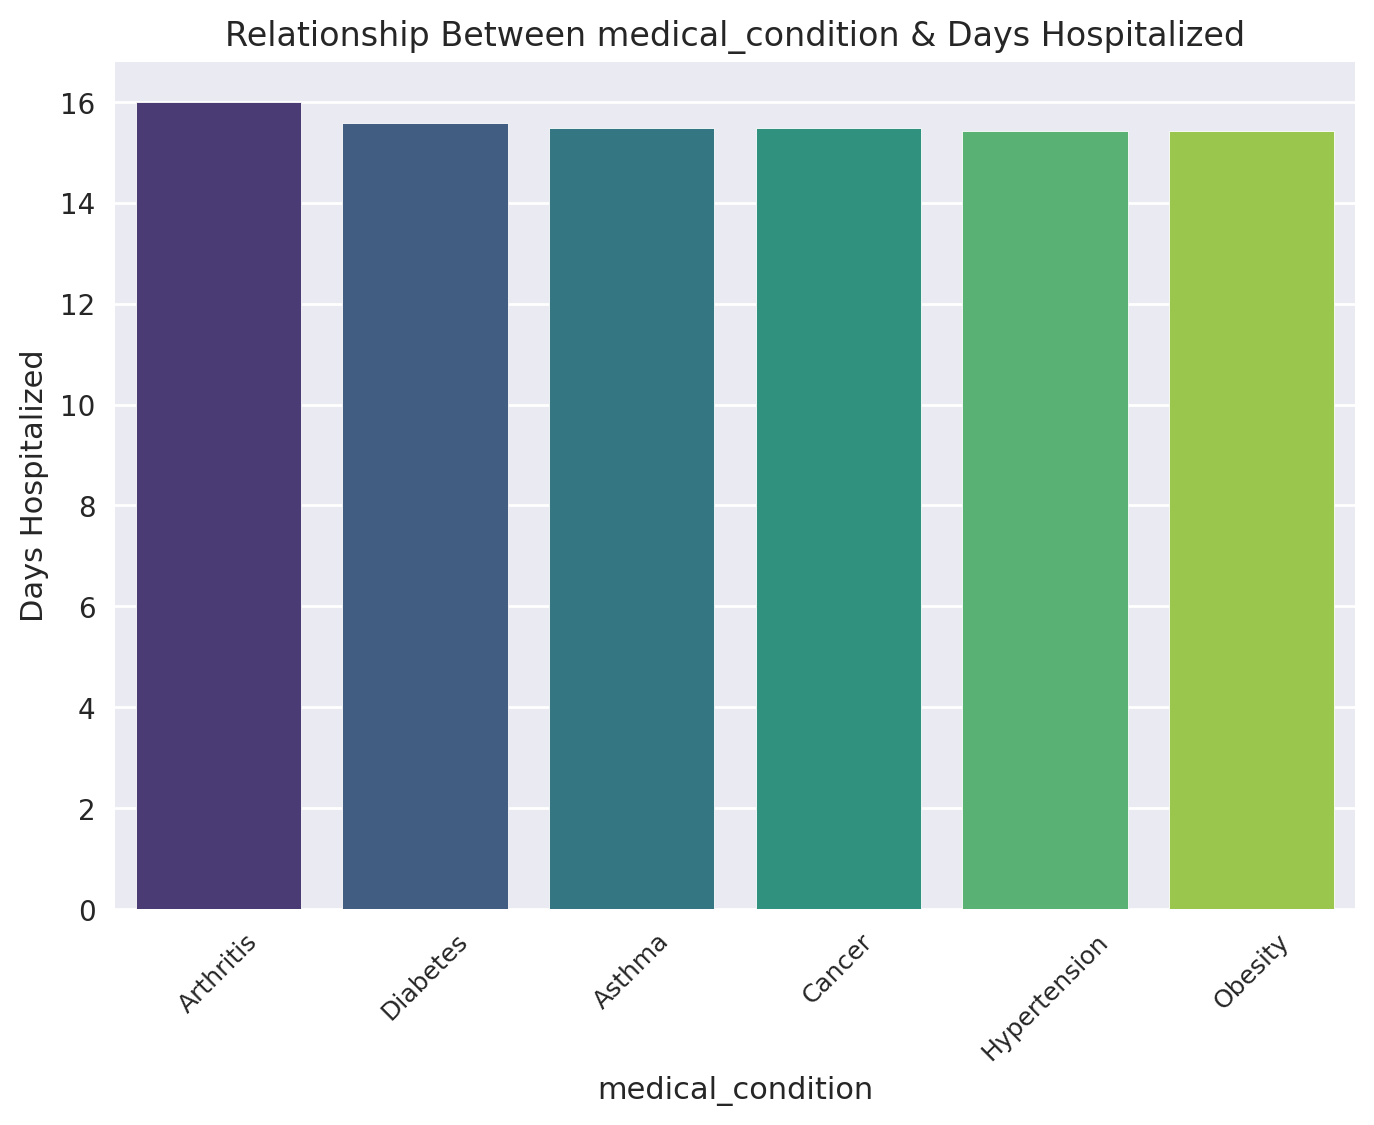

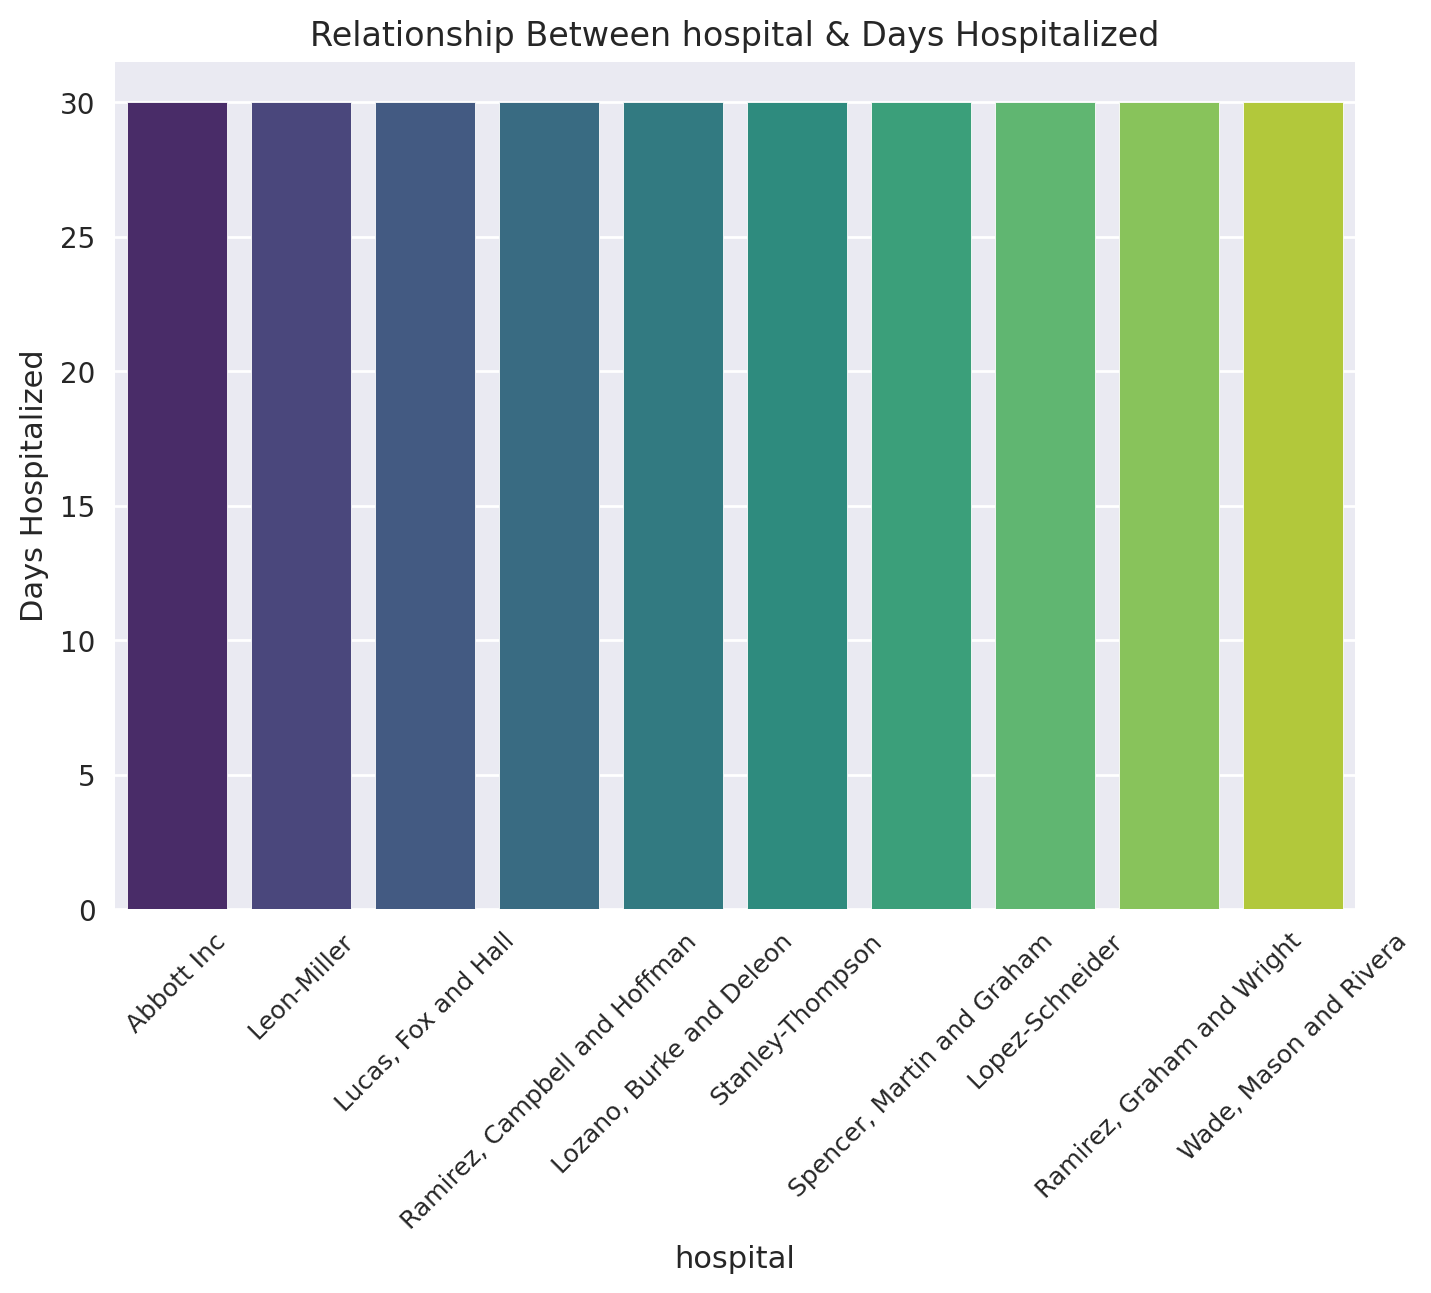

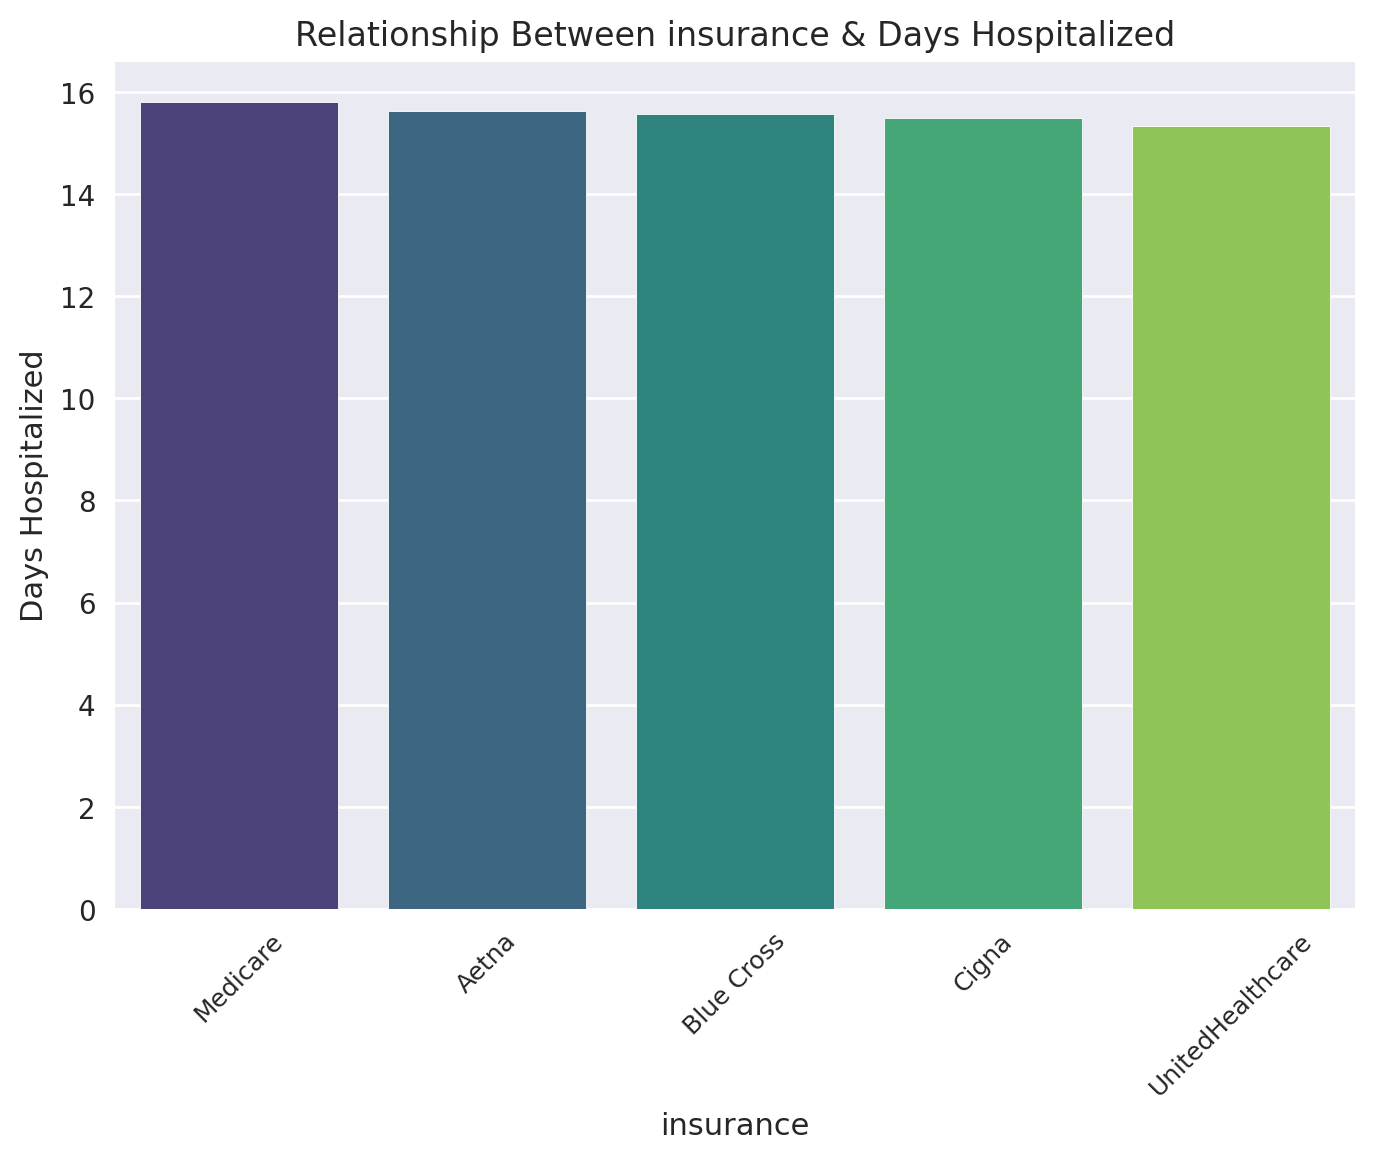

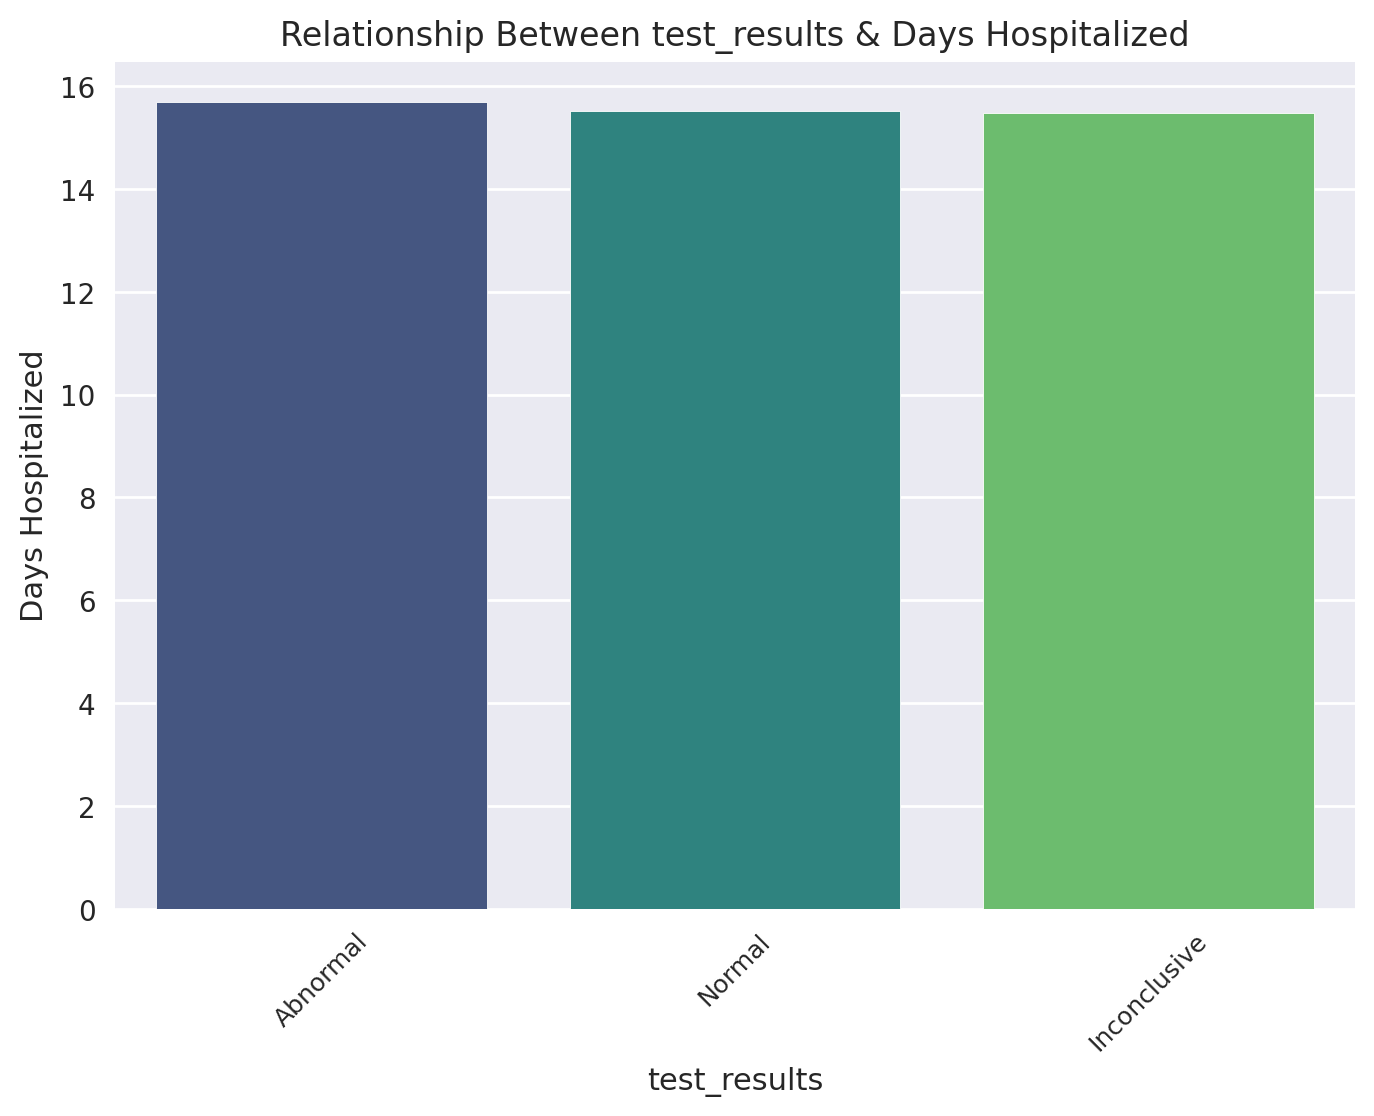

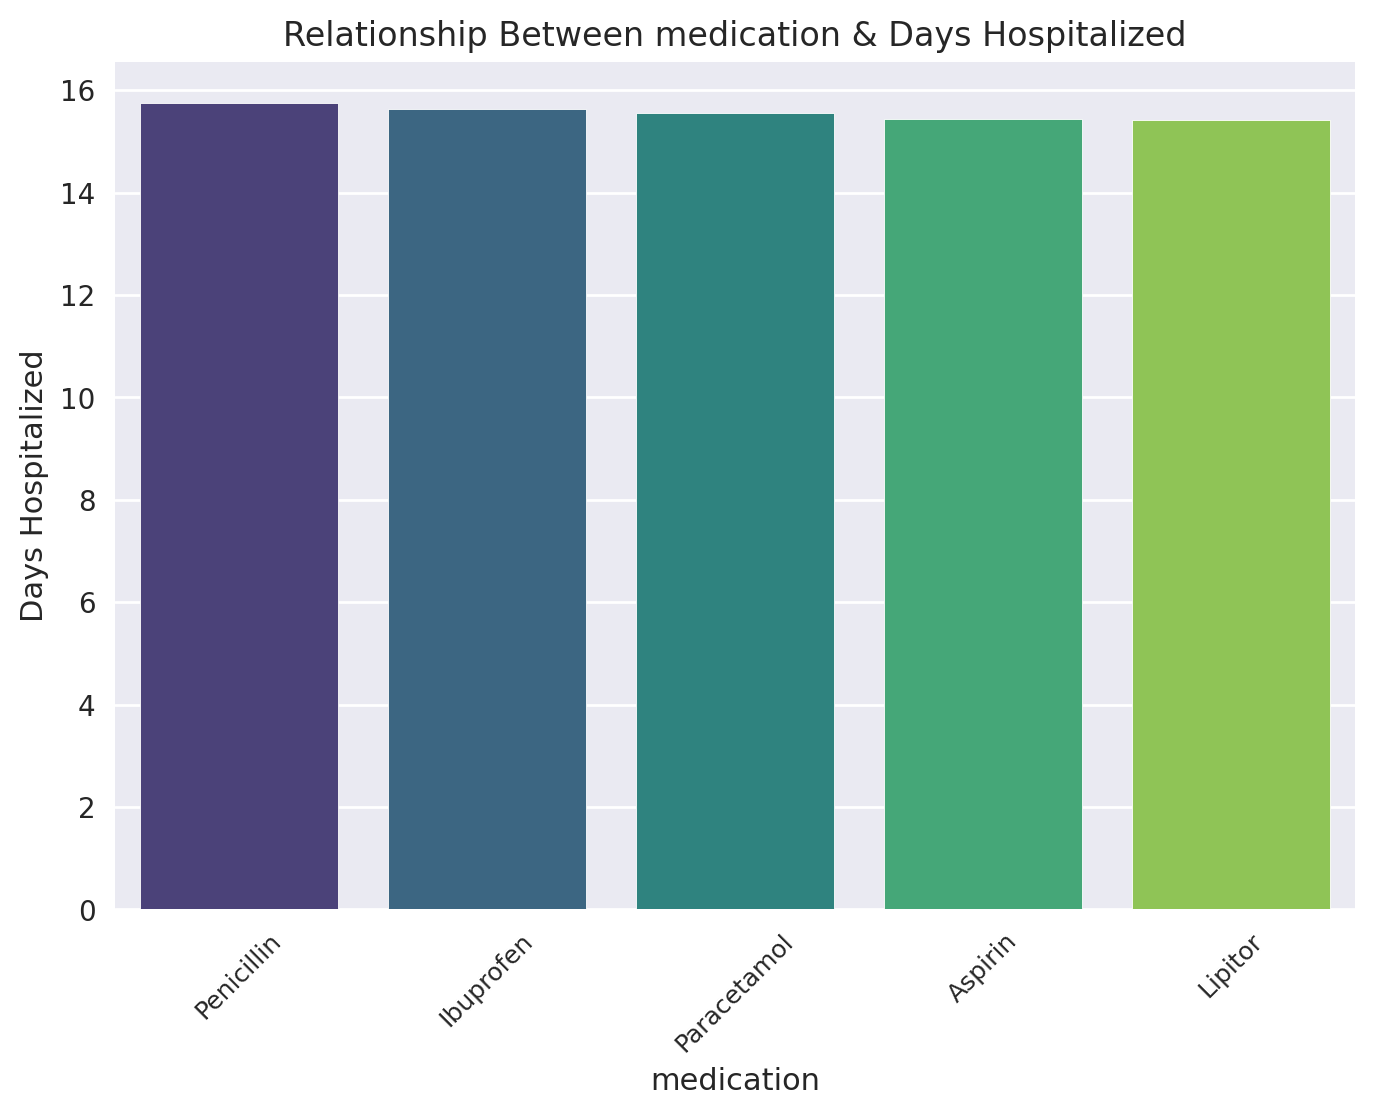

In [28]:
cols = ['gender', 'age_group', 'admission_type', 'medical_condition',
        'hospital', 'insurance', 'test_results', 'medication']  

for i in cols:

    if i == 'gender':
        char_bar = df.groupby('gender')['days_hospitalized'].mean().reset_index()
        char_bar = char_bar.sort_values(by='days_hospitalized', ascending=False)
    else:
        char_bar = df.groupby(i)['days_hospitalized'].mean().reset_index()
        char_bar = char_bar.sort_values(by='days_hospitalized', ascending=False)

    top = char_bar.head(10)

    sns.barplot(x=i, y='days_hospitalized', data=top, palette='viridis')
    plt.title(f'Relationship Between {i} & Days Hospitalized')
    plt.xlabel(i)
    plt.ylabel('Days Hospitalized')
    plt.xticks(rotation=45, fontsize = 9)
    plt.show()

### Categorical - Categorical

Text(0.5, 1.0, 'Relationship between Blood Type & Genders')

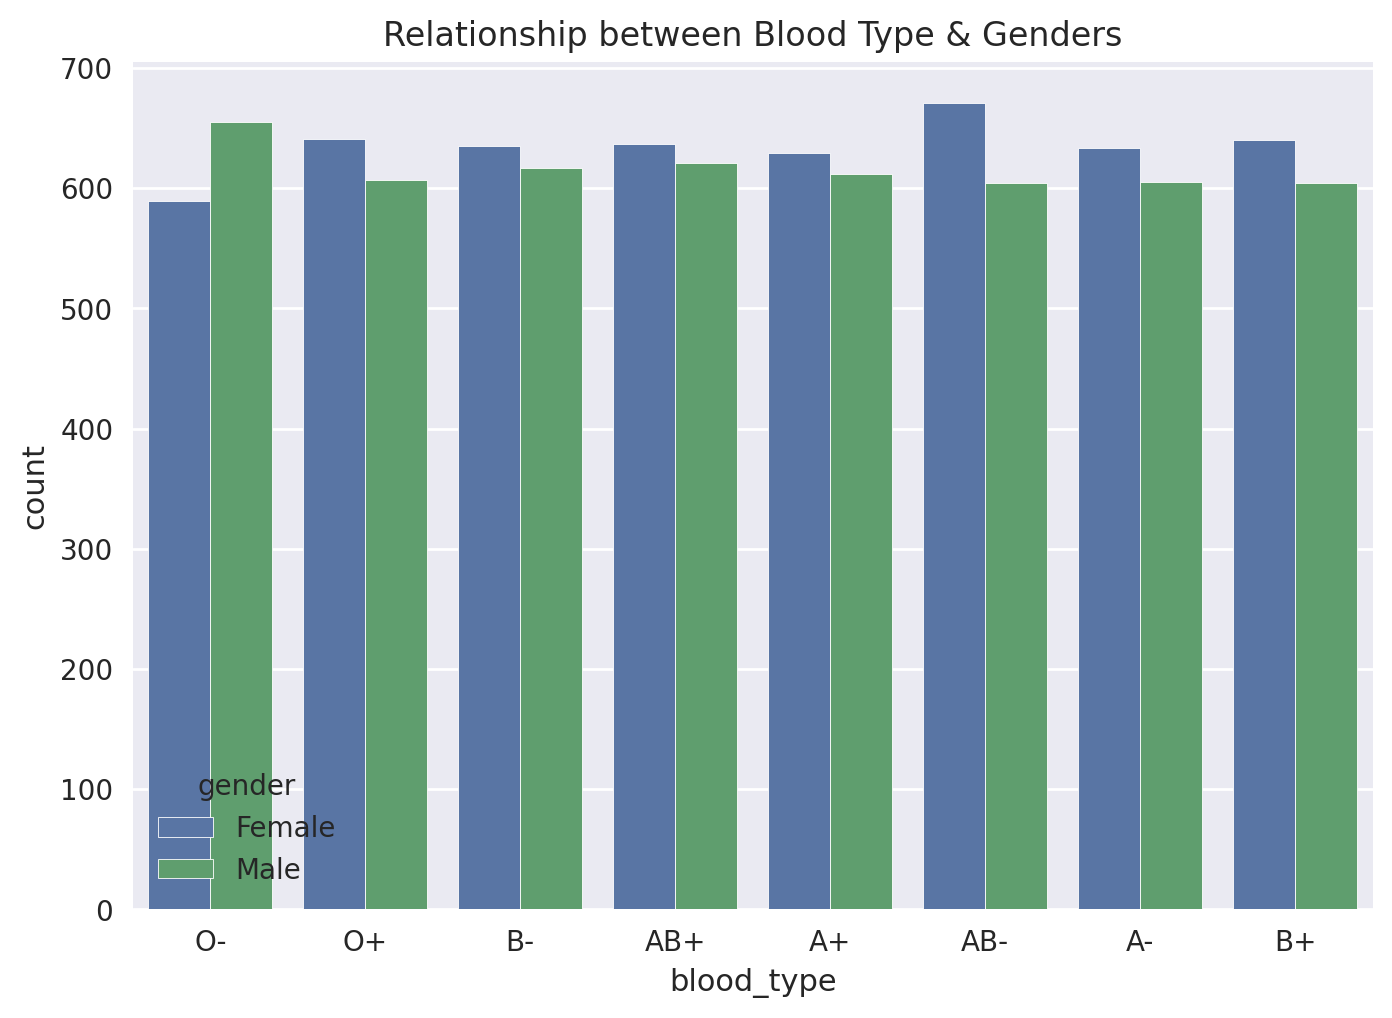

In [29]:
# distribution of blood type accross genders

# Create the 'count' column using groupby
df['count'] = df.groupby(['gender', 'blood_type'])['gender'].transform('count')

# Create the bar chart with Seaborn
sns.barplot(x='blood_type', y='count', hue='gender', data=df)

# Set labels and title
plt.title('Relationship between Blood Type & Genders')

Text(0.5, 1.0, 'Relationship Between Medical Condition & Gender')

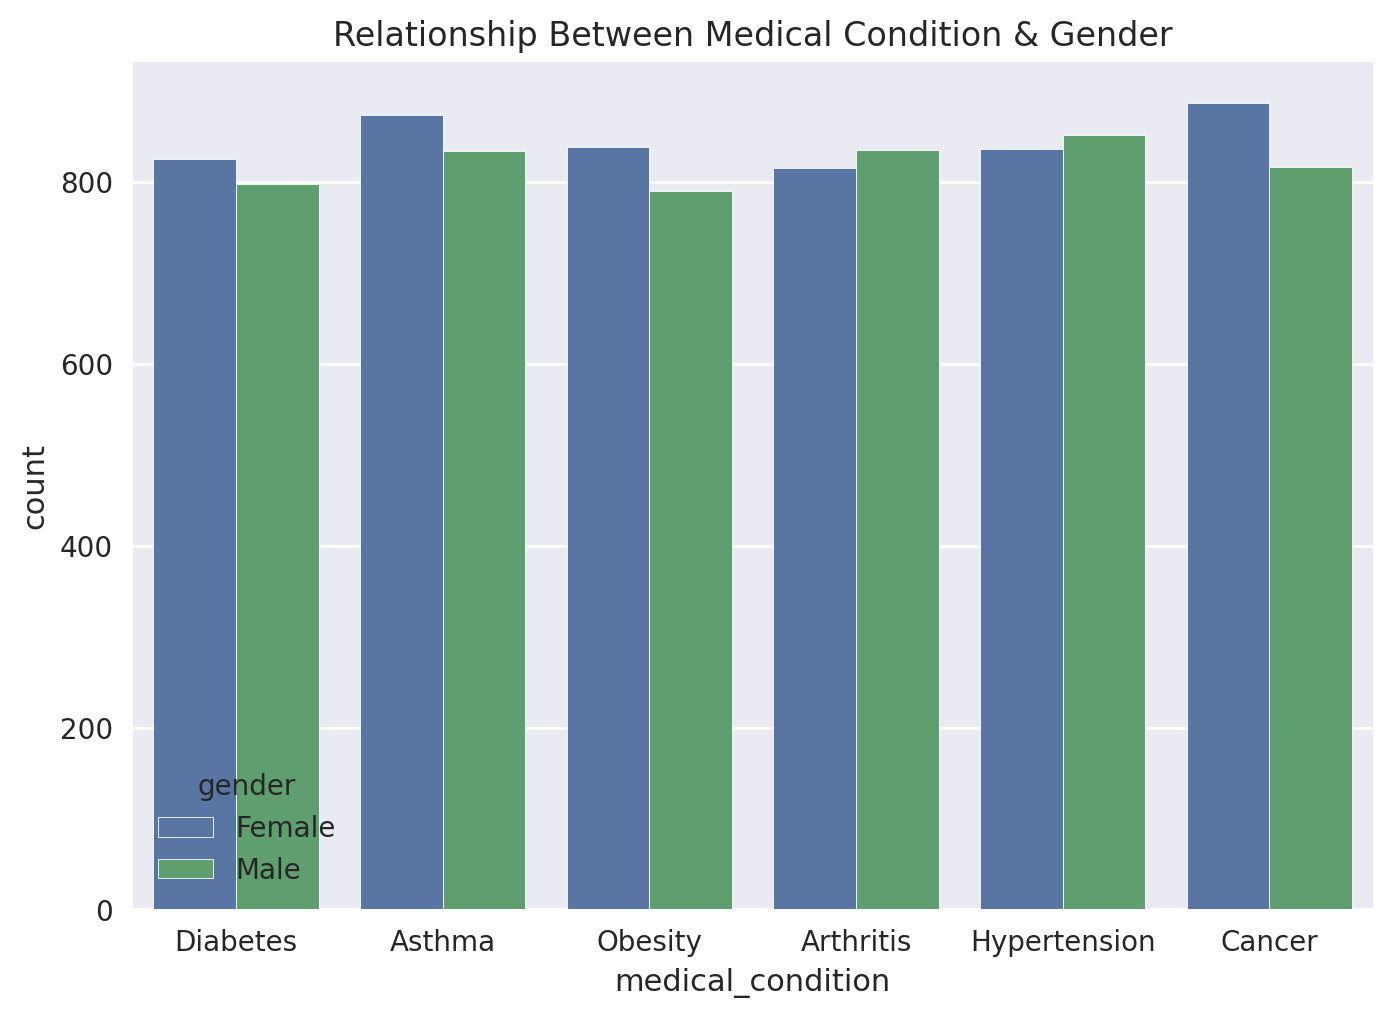

In [30]:
# distribution of medical_condition accross genders

# Create the 'count' column using groupby
df['count'] = df.groupby(['gender', 'medical_condition'])['gender'].transform('count')

# Create the bar chart
sns.barplot(x='medical_condition', y='count', hue='gender', data=df)
plt.title('Relationship Between Medical Condition & Gender')

Text(0.5, 1.0, 'Relationship between Age Groups & Gender')

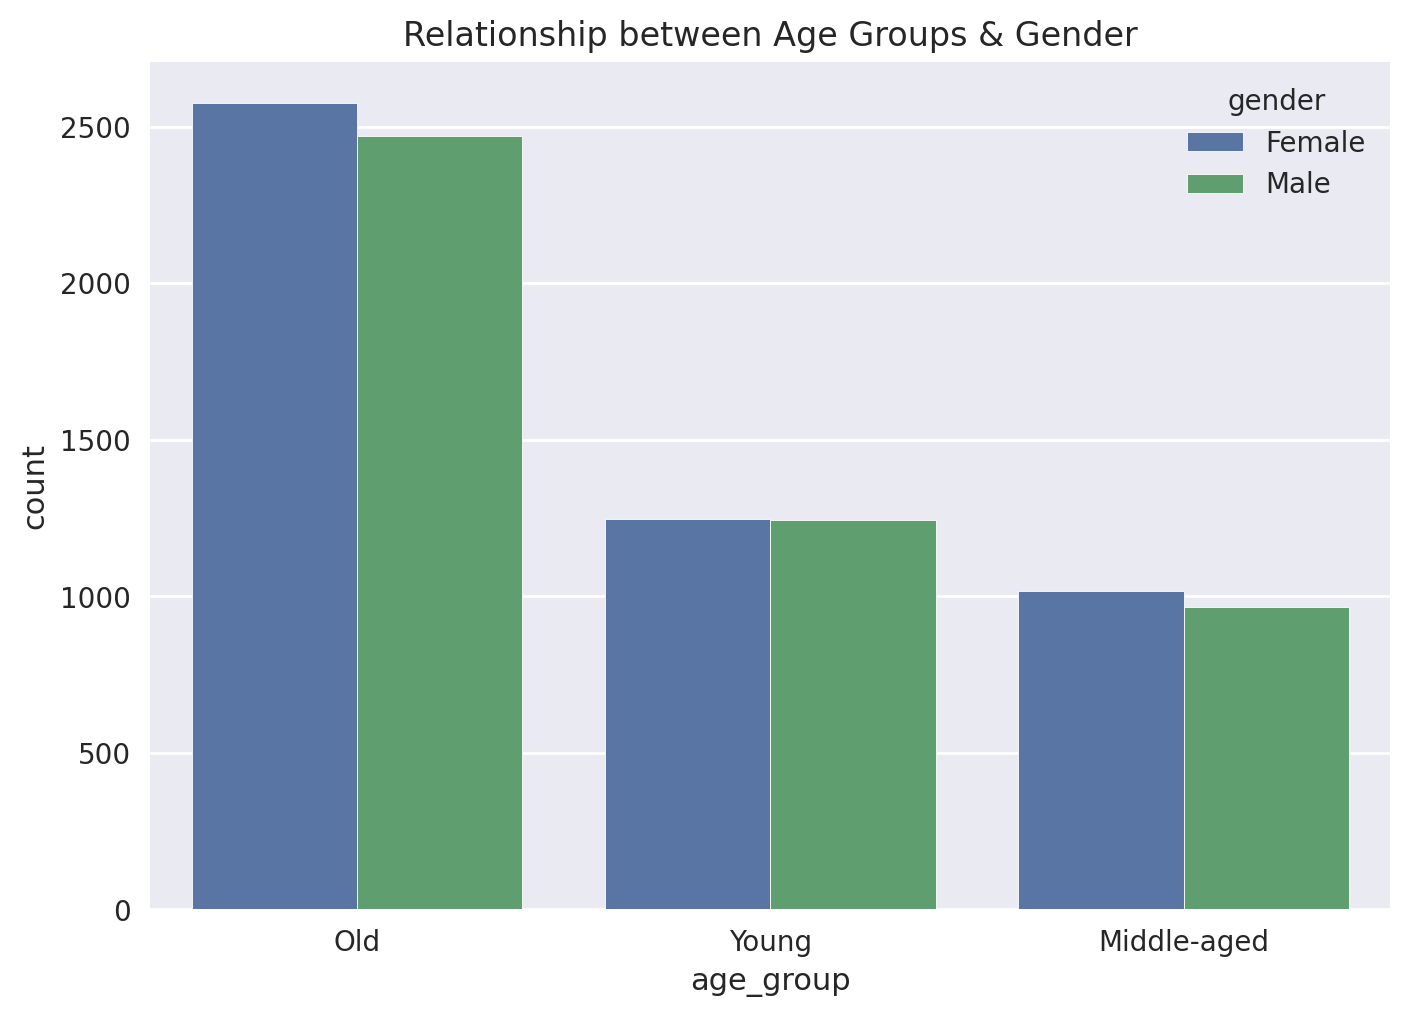

In [31]:
# distribution of age groups accross genders
df['count'] = df.groupby(['gender', 'age_group'])['gender'].transform('count')


sns.barplot(x='age_group', y='count', hue='gender', data=df)
plt.title('Relationship between Age Groups & Gender')

Text(0.5, 1.0, 'Relationship between Age Groups & Insurance')

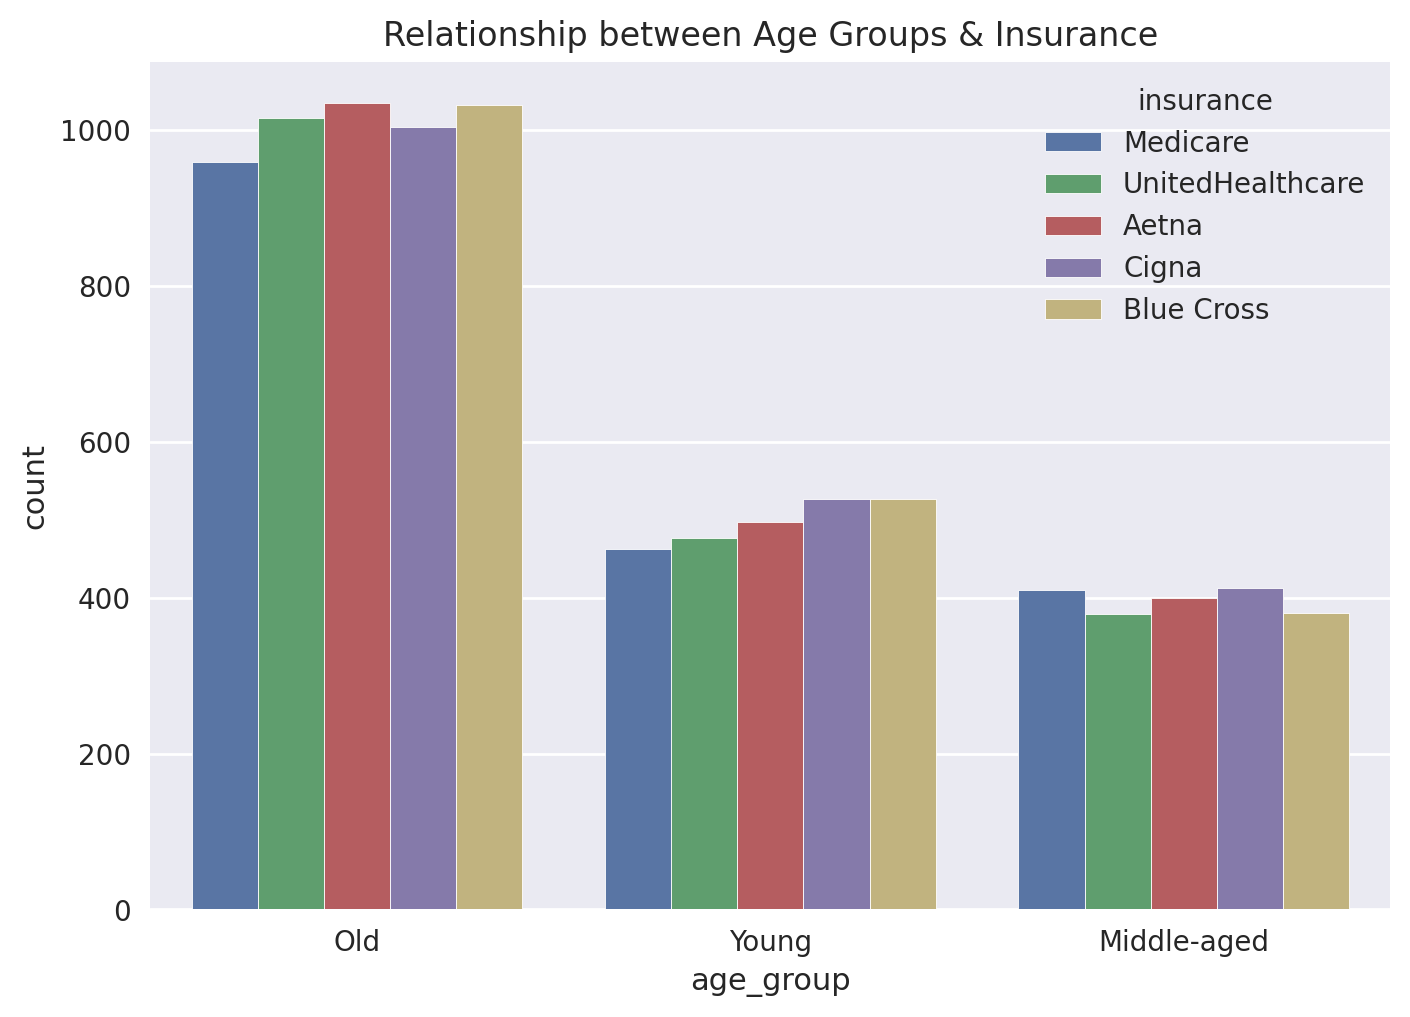

In [32]:
# distribution of age groups accross genders
df['count'] = df.groupby(['insurance', 'age_group'])['gender'].transform('count')


sns.barplot(x='age_group', y='count', hue='insurance', data=df)
plt.title('Relationship between Age Groups & Insurance')

Text(0.5, 1.0, 'Relationship between Age groups & Admission Types')

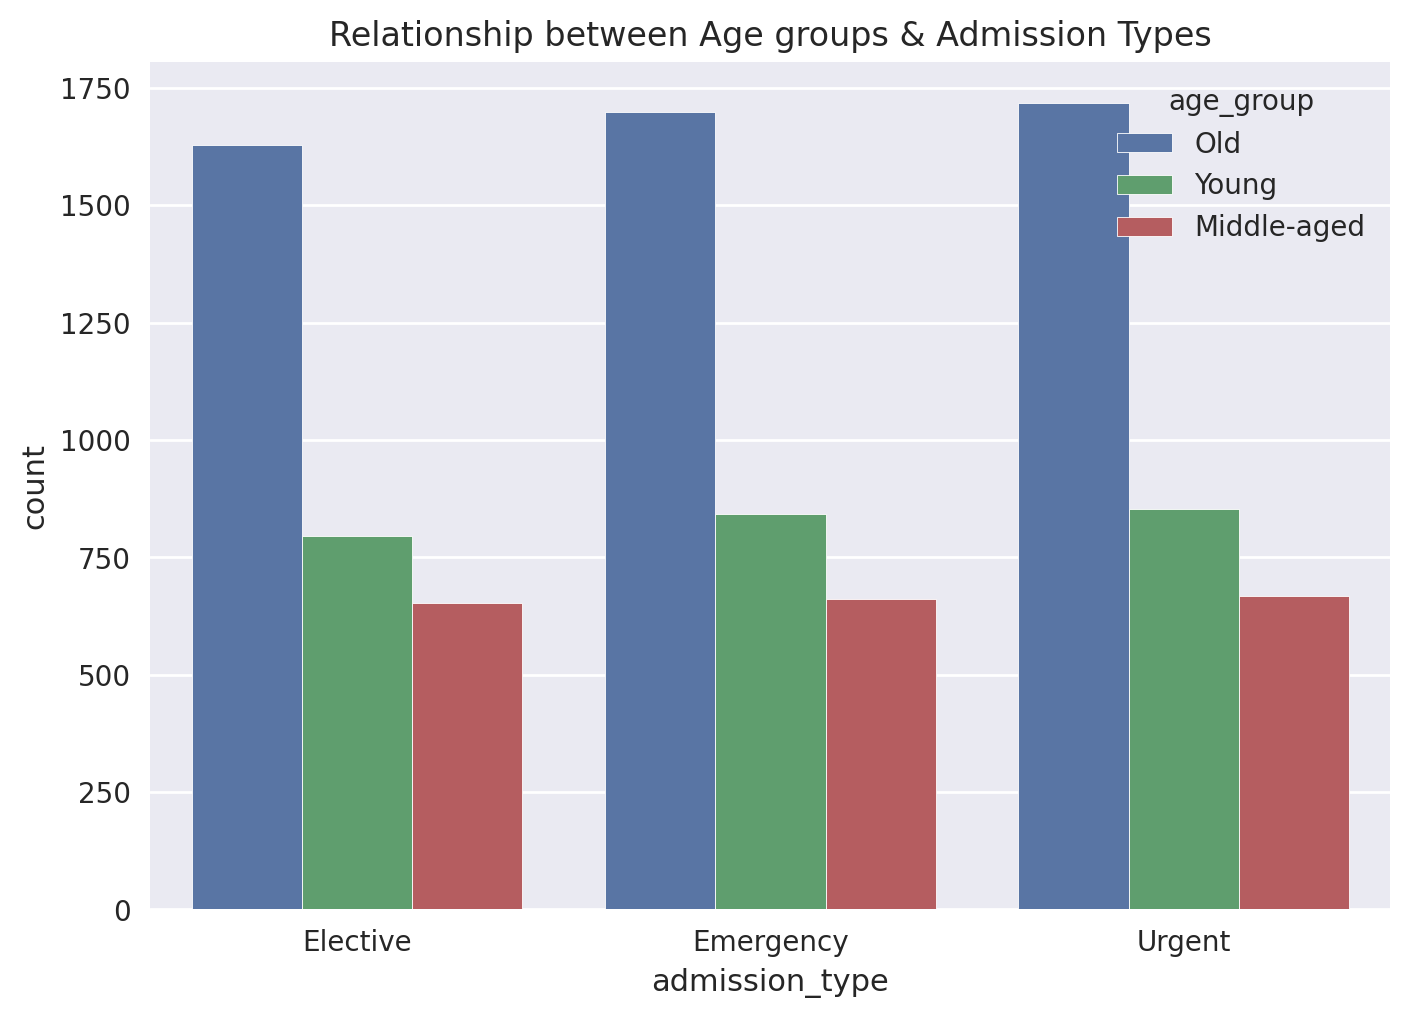

In [33]:
# distribution of admission types across age groups
df['count'] = df.groupby(['age_group', 'admission_type'])['age_group'].transform('count')
sns.barplot(data=df, x='admission_type', y='count', hue='age_group' )
plt.title('Relationship between Age groups & Admission Types')

Text(0.5, 1.0, 'Relationship between Age Groups & Medical Conditions')

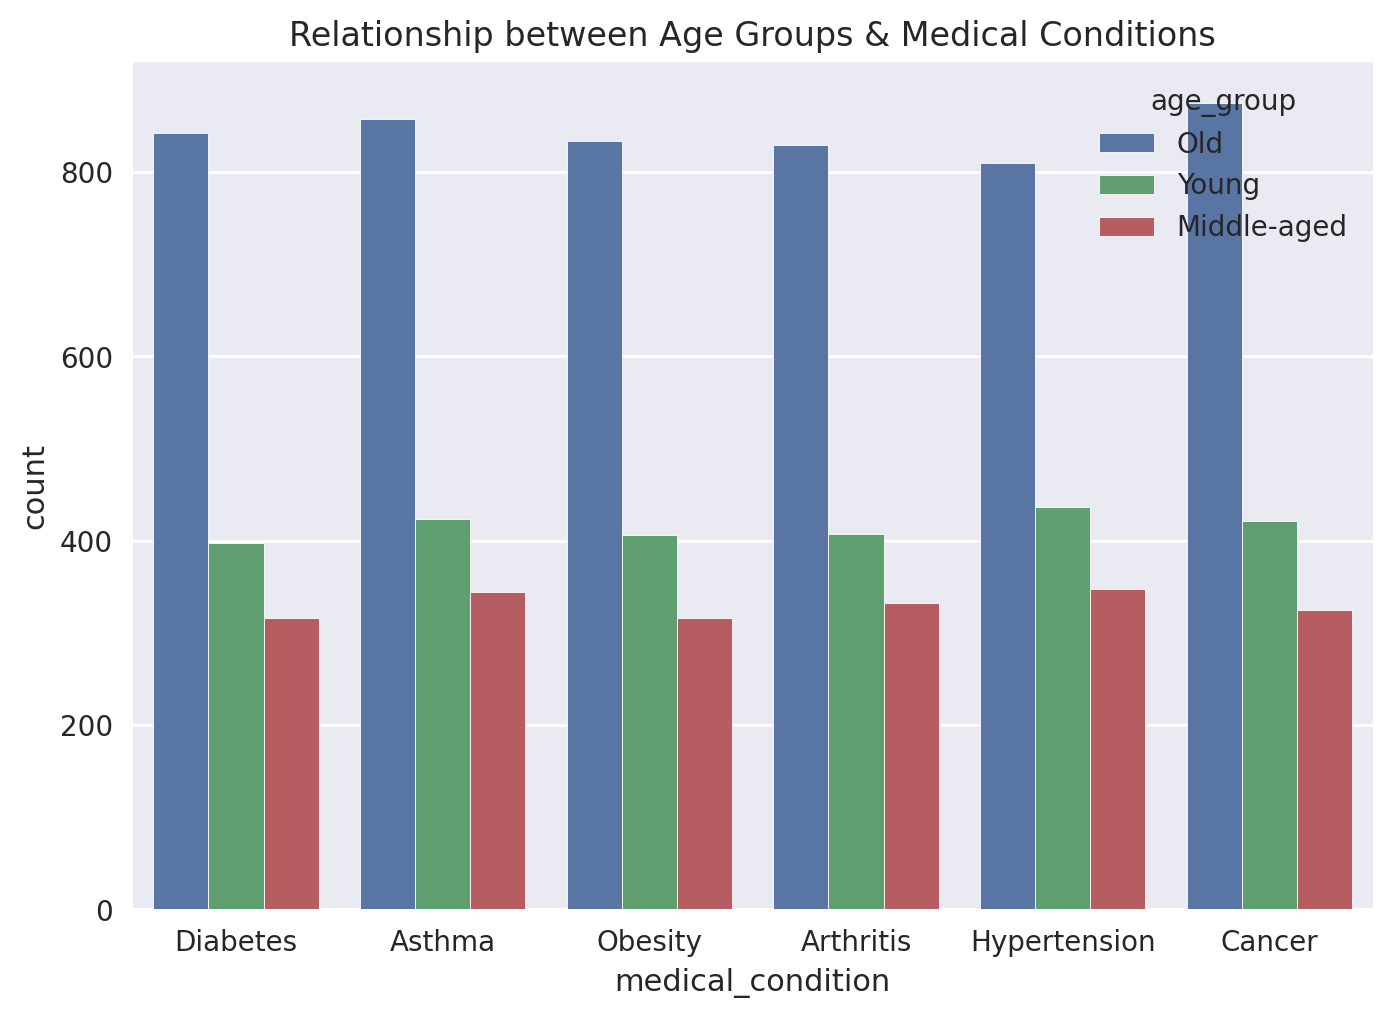

In [34]:
# distribution of Medical Condition across age groups
df['count'] = df.groupby(['age_group', 'medical_condition'])['age_group'].transform('count')
sns.barplot(data=df, x='medical_condition', y='count', hue='age_group' )
plt.title('Relationship between Age Groups & Medical Conditions')

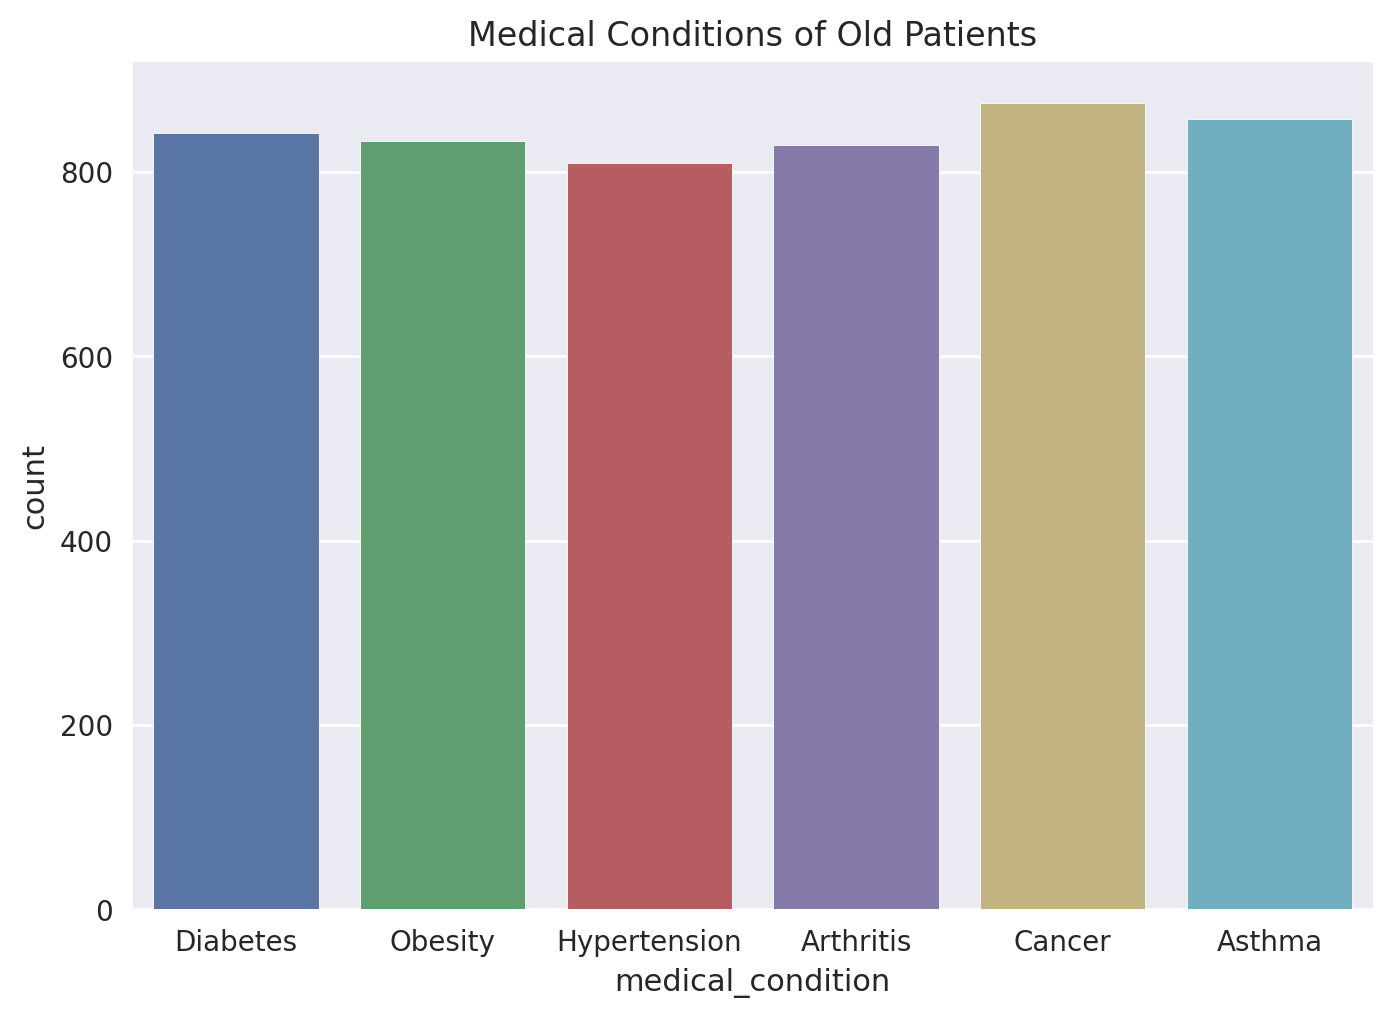

In [35]:
# diseases old patients have
df['count'] = df.groupby(['age_group', 'medical_condition'])['age_group'].transform('count')
sns.barplot(data=df[df['age_group'] == 'Old'], x='medical_condition', y='count')
plt.title('Medical Conditions of Old Patients')
plt.show()

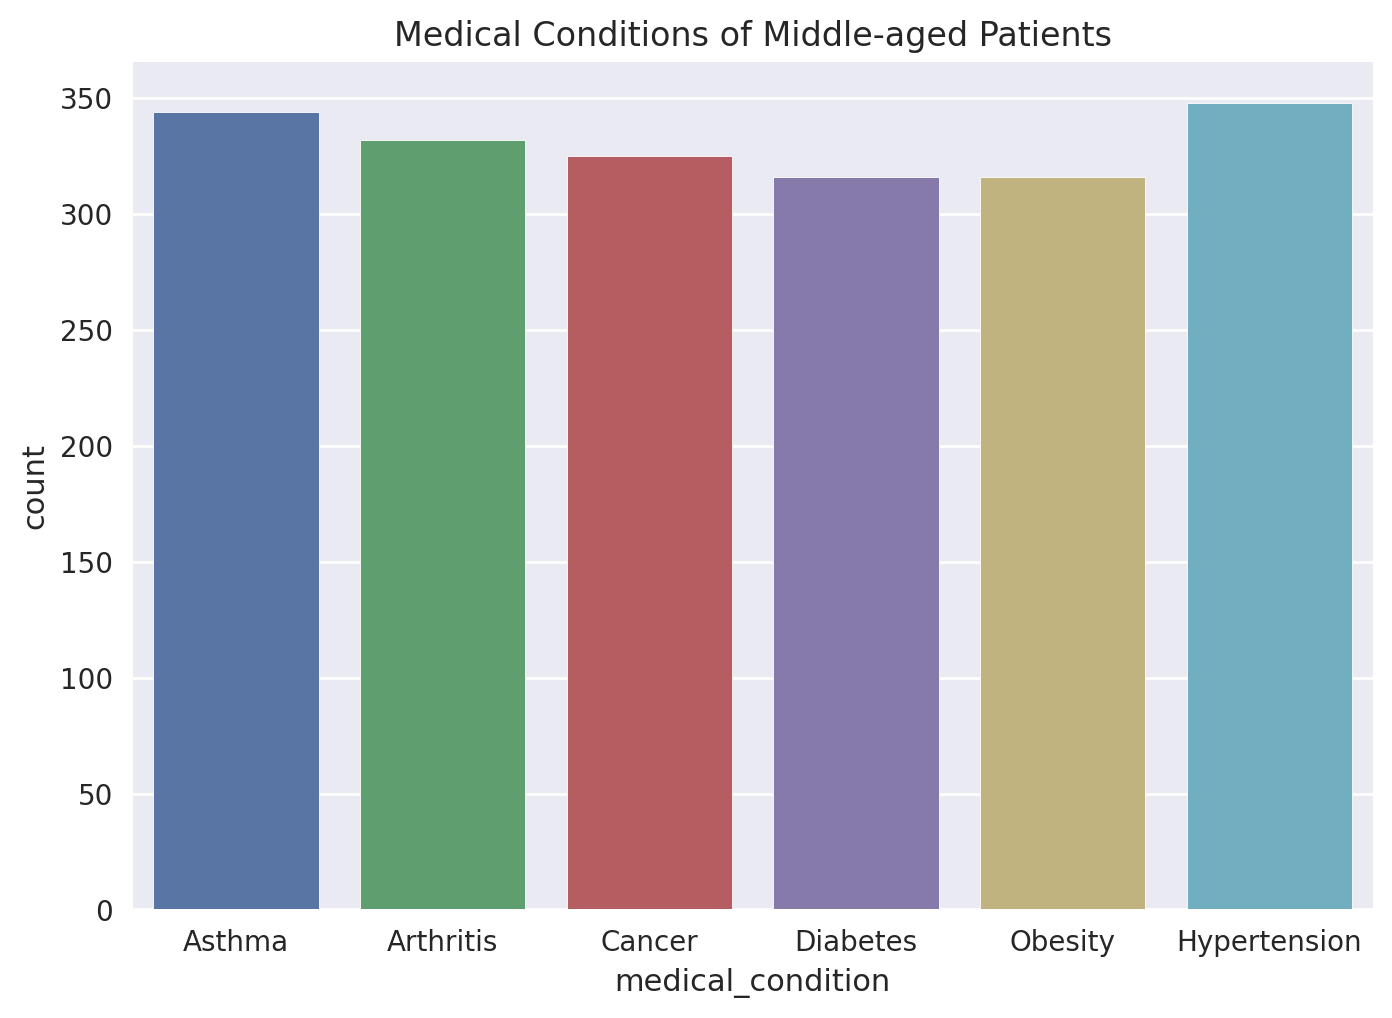

In [36]:
# diseases middel-aged patients have
df['count'] = df.groupby(['age_group', 'medical_condition'])['age_group'].transform('count')
sns.barplot(data=df[df['age_group'] == 'Middle-aged'], x='medical_condition', y='count')
plt.title('Medical Conditions of Middle-aged Patients')
plt.show()

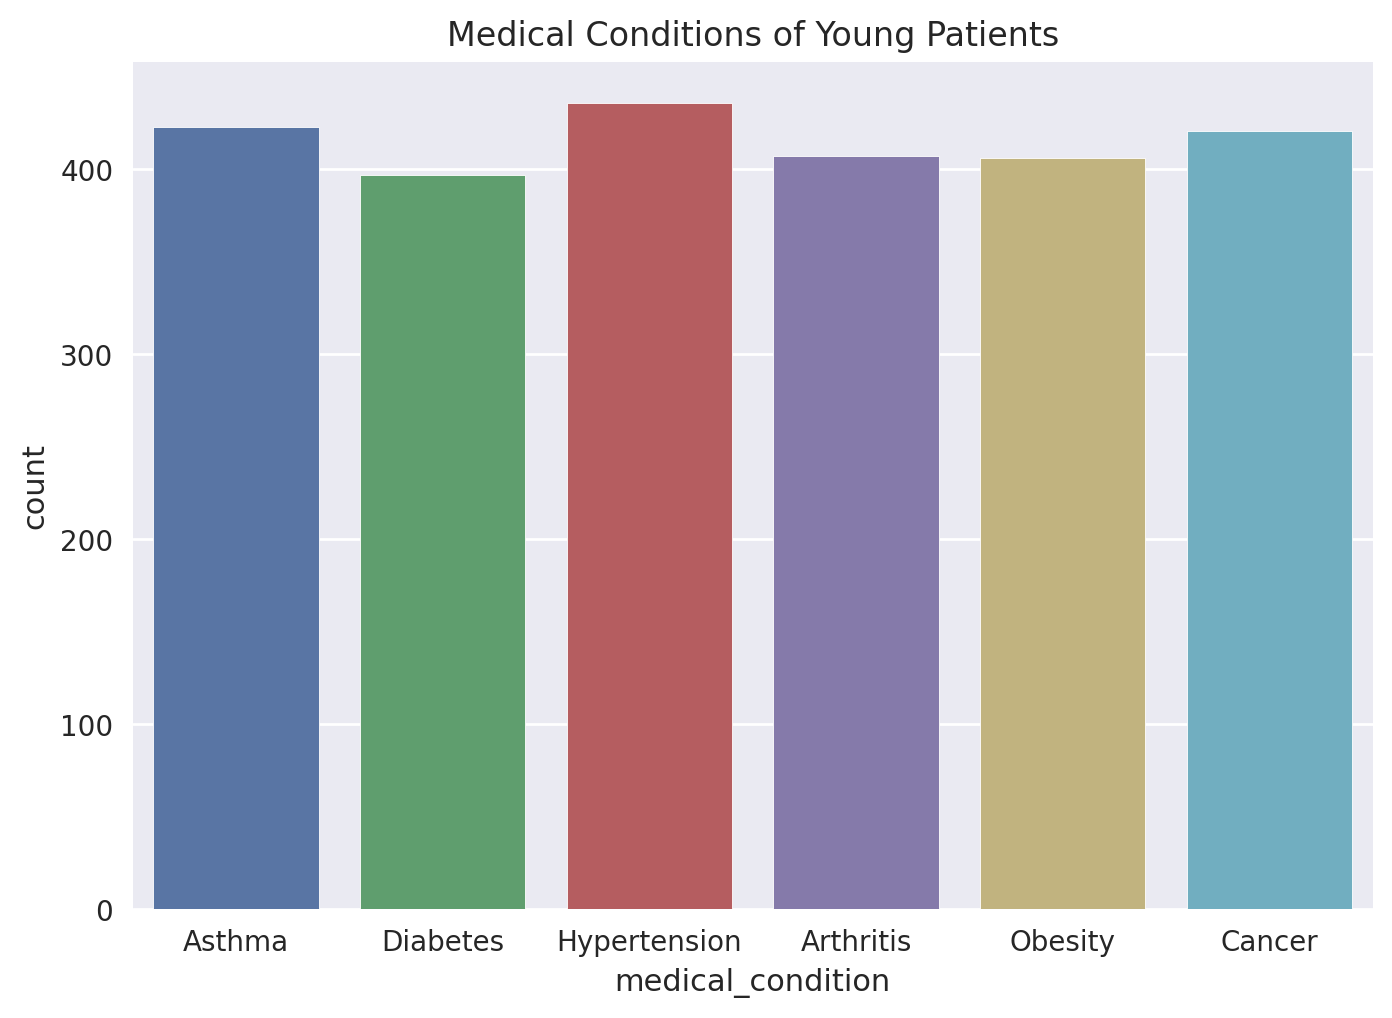

In [37]:
# diseases young patients have
df['count'] = df.groupby(['age_group', 'medical_condition'])['age_group'].transform('count')
sns.barplot(data=df[df['age_group'] == 'Young'], x='medical_condition', y='count')
plt.title('Medical Conditions of Young Patients')
plt.show()

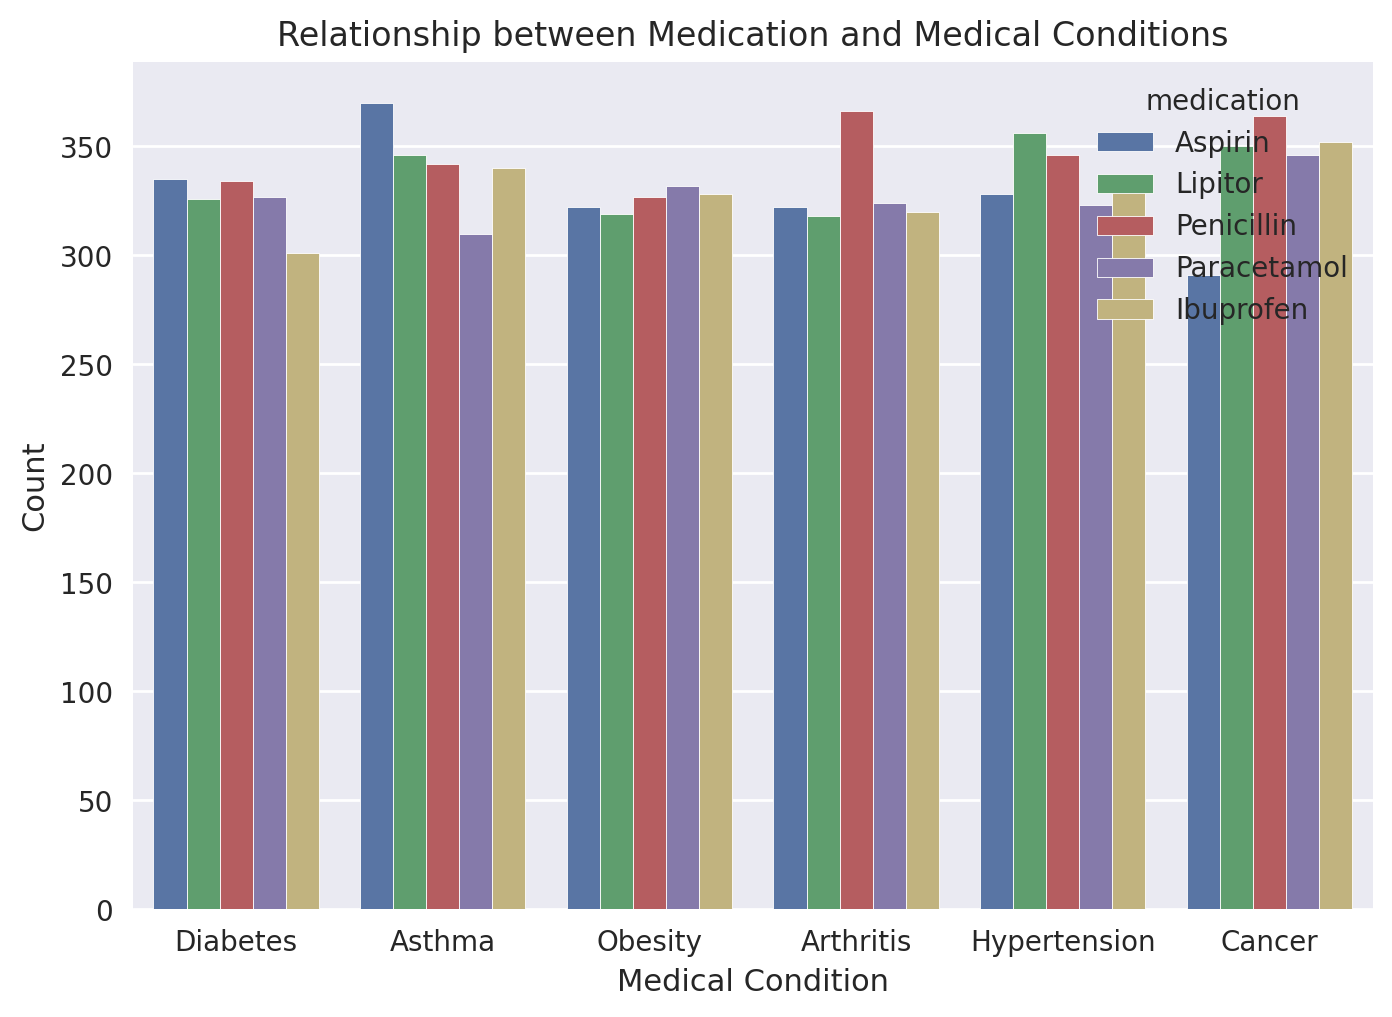

In [38]:
# Relationship between Medication & Medical Condition
sns.countplot(x='medical_condition', hue='medication', data=df)

# Set labels and title
plt.title('Relationship between Medication and Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Count')

# Show the plot
plt.show()